## DNN modeling

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
from torch.utils.data import Dataset

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

class TitaticDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('../dataset/train_preprocessed.csv')
        
        self.data = scaler.fit_transform(df.drop('Survived',axis=1))
        self.labels = df['Survived']

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,idx):
        X = torch.tensor(self.data[idx], dtype=torch.float32)  # 입력값 텐서 변환
        y = torch.tensor(self.labels[idx], dtype=torch.float32)  # 레이블 텐서 변환
        return X,y

In [3]:
trainDataset = TitaticDataset()

In [4]:
train_len = int(len(trainDataset) * 0.8)
valid_len = len(trainDataset) - train_len

# dataset 객체를 유지해줌 / treain_test_split은 dataset 객체에 사용이 안된다.
train_data, valid_data = torch.utils.data.random_split(trainDataset, [train_len, valid_len])

In [5]:
train_dataloader = DataLoader(train_data,batch_size=32,shuffle=True)
valid_dataloader = DataLoader(valid_data,batch_size=32,shuffle=False)

In [6]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.fc_layer = nn.Sequential(
            nn.Linear(22,128),
            nn.Sigmoid(),
            nn.Linear(128,64),
            nn.Sigmoid(),
            nn.Linear(64,32),
            nn.Sigmoid(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.fc_layer(x)

In [18]:
model = NN()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_hist = []
valid_hist = []
acc = []

In [11]:
from tqdm import tqdm
def train_loof(model,loss_fn,optimizer,dataloader):
    model.train()
    tbar = tqdm(dataloader)
    loss = 0
    for X,y in tbar:
        pred = model(X)
        Loss = loss_fn(pred,y.reshape(-1,1))
        Loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss += Loss.item()
        tbar.set_description(f'Loss: {Loss.item()}')
    return loss/len(dataloader) # 배치당 평균 loss

def valid_loof(model,loss_fn,dataloader):
    model.eval()
    loss,correct  = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            Loss = loss_fn(pred,y.reshape(-1,1))
            loss += Loss.item()
            correct += ((pred > 0.5) == y.reshape(-1,1)).type(torch.float).sum().item()

    return loss/len(dataloader), correct/len(dataloader.dataset)

In [20]:
epochs = 500
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loof(model,loss_fn,optimizer,train_dataloader)
    train_hist.append(train_loss)
    valid_loss, accuracy = valid_loof(model,loss_fn,valid_dataloader)
    print(f'valid Loss : {valid_loss:.4f},Accuracy L {accuracy:.4f}')
    valid_hist.append(valid_loss)
    acc.append(accuracy)

Epoch 1
-------------------------------


Loss: 0.7077677249908447: 100%|██████████| 23/23 [00:00<00:00, 249.60it/s]


valid Loss : 0.6516,Accuracy L 0.6592
Epoch 2
-------------------------------


Loss: 0.6529126167297363: 100%|██████████| 23/23 [00:00<00:00, 308.42it/s]


valid Loss : 0.6435,Accuracy L 0.6592
Epoch 3
-------------------------------


Loss: 0.5412559509277344: 100%|██████████| 23/23 [00:00<00:00, 275.71it/s]

valid Loss : 0.6336,Accuracy L 0.6592


Epoch 4
-------------------------------


Loss: 0.7647677659988403: 100%|██████████| 23/23 [00:00<00:00, 296.03it/s]


valid Loss : 0.6154,Accuracy L 0.6592
Epoch 5
-------------------------------


Loss: 0.5453344583511353: 100%|██████████| 23/23 [00:00<00:00, 355.84it/s]


valid Loss : 0.5818,Accuracy L 0.7765
Epoch 6
-------------------------------


Loss: 0.6914165616035461: 100%|██████████| 23/23 [00:00<00:00, 240.16it/s]


valid Loss : 0.5266,Accuracy L 0.8101
Epoch 7
-------------------------------


Loss: 0.6689325571060181: 100%|██████████| 23/23 [00:00<00:00, 352.67it/s]


valid Loss : 0.4718,Accuracy L 0.7821
Epoch 8
-------------------------------


Loss: 0.5249114632606506: 100%|██████████| 23/23 [00:00<00:00, 243.15it/s]


valid Loss : 0.4583,Accuracy L 0.7877
Epoch 9
-------------------------------


Loss: 0.21025535464286804: 100%|██████████| 23/23 [00:00<00:00, 298.53it/s]

valid Loss : 0.4476,Accuracy L 0.7877


Epoch 10
-------------------------------


Loss: 0.4957195222377777: 100%|██████████| 23/23 [00:00<00:00, 285.33it/s]


valid Loss : 0.4395,Accuracy L 0.7933
Epoch 11
-------------------------------


Loss: 0.17538882791996002: 100%|██████████| 23/23 [00:00<00:00, 223.44it/s]


valid Loss : 0.4208,Accuracy L 0.8268
Epoch 12
-------------------------------


Loss: 0.6151271462440491: 100%|██████████| 23/23 [00:00<00:00, 274.54it/s]


valid Loss : 0.4203,Accuracy L 0.8268
Epoch 13
-------------------------------


Loss: 0.6527091264724731: 100%|██████████| 23/23 [00:00<00:00, 319.95it/s]


valid Loss : 0.4147,Accuracy L 0.8324
Epoch 14
-------------------------------


Loss: 0.16781744360923767: 100%|██████████| 23/23 [00:00<00:00, 252.23it/s]

valid Loss : 0.4043,Accuracy L 0.8212


Epoch 15
-------------------------------


Loss: 0.3591694235801697: 100%|██████████| 23/23 [00:00<00:00, 310.60it/s]


valid Loss : 0.4062,Accuracy L 0.8268
Epoch 16
-------------------------------


Loss: 0.21918143332004547: 100%|██████████| 23/23 [00:00<00:00, 274.59it/s]


valid Loss : 0.3909,Accuracy L 0.8380
Epoch 17
-------------------------------


Loss: 0.22340168058872223: 100%|██████████| 23/23 [00:00<00:00, 299.18it/s]


valid Loss : 0.4138,Accuracy L 0.8324
Epoch 18
-------------------------------


Loss: 0.4485219120979309: 100%|██████████| 23/23 [00:00<00:00, 322.85it/s]


valid Loss : 0.3846,Accuracy L 0.8436
Epoch 19
-------------------------------


Loss: 0.5321301221847534: 100%|██████████| 23/23 [00:00<00:00, 342.39it/s]


valid Loss : 0.3925,Accuracy L 0.8380
Epoch 20
-------------------------------


Loss: 0.6199489831924438: 100%|██████████| 23/23 [00:00<00:00, 275.84it/s]


valid Loss : 0.3889,Accuracy L 0.8436
Epoch 21
-------------------------------


Loss: 0.25164854526519775: 100%|██████████| 23/23 [00:00<00:00, 350.04it/s]


valid Loss : 0.3885,Accuracy L 0.8547
Epoch 22
-------------------------------


Loss: 0.09765367954969406: 100%|██████████| 23/23 [00:00<00:00, 271.96it/s]


valid Loss : 0.3843,Accuracy L 0.8547
Epoch 23
-------------------------------


Loss: 0.4010120630264282: 100%|██████████| 23/23 [00:00<00:00, 298.90it/s]


valid Loss : 0.4002,Accuracy L 0.8324
Epoch 24
-------------------------------


Loss: 0.4925764203071594: 100%|██████████| 23/23 [00:00<00:00, 340.68it/s]


valid Loss : 0.3947,Accuracy L 0.8380
Epoch 25
-------------------------------


Loss: 0.247870072722435: 100%|██████████| 23/23 [00:00<00:00, 331.40it/s]


valid Loss : 0.3812,Accuracy L 0.8547
Epoch 26
-------------------------------


Loss: 0.6392072439193726: 100%|██████████| 23/23 [00:00<00:00, 274.14it/s]


valid Loss : 0.3913,Accuracy L 0.8380
Epoch 27
-------------------------------


Loss: 0.22511066496372223: 100%|██████████| 23/23 [00:00<00:00, 367.81it/s]


valid Loss : 0.3886,Accuracy L 0.8436
Epoch 28
-------------------------------


Loss: 0.8178118467330933: 100%|██████████| 23/23 [00:00<00:00, 291.93it/s]


valid Loss : 0.3939,Accuracy L 0.8380
Epoch 29
-------------------------------


Loss: 0.6695036888122559: 100%|██████████| 23/23 [00:00<00:00, 259.96it/s]


valid Loss : 0.3867,Accuracy L 0.8436
Epoch 30
-------------------------------


Loss: 0.7512640953063965: 100%|██████████| 23/23 [00:00<00:00, 312.43it/s]


valid Loss : 0.3729,Accuracy L 0.8603
Epoch 31
-------------------------------


Loss: 0.19572985172271729: 100%|██████████| 23/23 [00:00<00:00, 277.78it/s]


valid Loss : 0.3913,Accuracy L 0.8380
Epoch 32
-------------------------------


Loss: 0.7123547792434692: 100%|██████████| 23/23 [00:00<00:00, 275.52it/s]


valid Loss : 0.3881,Accuracy L 0.8436
Epoch 33
-------------------------------


Loss: 0.6143513321876526: 100%|██████████| 23/23 [00:00<00:00, 434.24it/s]


valid Loss : 0.3889,Accuracy L 0.8380
Epoch 34
-------------------------------


Loss: 0.1442924588918686: 100%|██████████| 23/23 [00:00<00:00, 339.72it/s]


valid Loss : 0.3754,Accuracy L 0.8603
Epoch 35
-------------------------------


Loss: 0.223887637257576: 100%|██████████| 23/23 [00:00<00:00, 269.38it/s]


valid Loss : 0.3932,Accuracy L 0.8380
Epoch 36
-------------------------------


Loss: 0.41533660888671875: 100%|██████████| 23/23 [00:00<00:00, 317.45it/s]


valid Loss : 0.3876,Accuracy L 0.8492
Epoch 37
-------------------------------


Loss: 0.49850475788116455: 100%|██████████| 23/23 [00:00<00:00, 358.23it/s]


valid Loss : 0.3742,Accuracy L 0.8547
Epoch 38
-------------------------------


Loss: 0.16918808221817017: 100%|██████████| 23/23 [00:00<00:00, 237.21it/s]


valid Loss : 0.3905,Accuracy L 0.8436
Epoch 39
-------------------------------


Loss: 0.8556652069091797: 100%|██████████| 23/23 [00:00<00:00, 317.35it/s]


valid Loss : 0.3849,Accuracy L 0.8492
Epoch 40
-------------------------------


Loss: 0.18313463032245636: 100%|██████████| 23/23 [00:00<00:00, 339.82it/s]


valid Loss : 0.3856,Accuracy L 0.8492
Epoch 41
-------------------------------


Loss: 0.6141877174377441: 100%|██████████| 23/23 [00:00<00:00, 271.46it/s]


valid Loss : 0.3798,Accuracy L 0.8547
Epoch 42
-------------------------------


Loss: 0.6178296208381653: 100%|██████████| 23/23 [00:00<00:00, 276.39it/s]


valid Loss : 0.4022,Accuracy L 0.8268
Epoch 43
-------------------------------


Loss: 0.27394941449165344: 100%|██████████| 23/23 [00:00<00:00, 340.91it/s]


valid Loss : 0.3888,Accuracy L 0.8436
Epoch 44
-------------------------------


Loss: 0.3665963113307953: 100%|██████████| 23/23 [00:00<00:00, 228.87it/s]


valid Loss : 0.3807,Accuracy L 0.8492
Epoch 45
-------------------------------


Loss: 0.1379777044057846: 100%|██████████| 23/23 [00:00<00:00, 320.39it/s]


valid Loss : 0.3709,Accuracy L 0.8659
Epoch 46
-------------------------------


Loss: 0.15843455493450165: 100%|██████████| 23/23 [00:00<00:00, 343.15it/s]


valid Loss : 0.3924,Accuracy L 0.8324
Epoch 47
-------------------------------


Loss: 0.18230973184108734: 100%|██████████| 23/23 [00:00<00:00, 277.54it/s]


valid Loss : 0.3800,Accuracy L 0.8547
Epoch 48
-------------------------------


Loss: 0.4072052836418152: 100%|██████████| 23/23 [00:00<00:00, 347.22it/s]


valid Loss : 0.3807,Accuracy L 0.8436
Epoch 49
-------------------------------


Loss: 0.19918705523014069: 100%|██████████| 23/23 [00:00<00:00, 275.19it/s]


valid Loss : 0.3920,Accuracy L 0.8436
Epoch 50
-------------------------------


Loss: 0.5031343698501587: 100%|██████████| 23/23 [00:00<00:00, 230.13it/s]


valid Loss : 0.3849,Accuracy L 0.8492
Epoch 51
-------------------------------


Loss: 0.6293774247169495: 100%|██████████| 23/23 [00:00<00:00, 259.70it/s]


valid Loss : 0.3894,Accuracy L 0.8436
Epoch 52
-------------------------------


Loss: 0.3767803907394409: 100%|██████████| 23/23 [00:00<00:00, 283.01it/s]


valid Loss : 0.3859,Accuracy L 0.8492
Epoch 53
-------------------------------


Loss: 0.3125913739204407: 100%|██████████| 23/23 [00:00<00:00, 257.78it/s]


valid Loss : 0.3835,Accuracy L 0.8492
Epoch 54
-------------------------------


Loss: 0.35783734917640686: 100%|██████████| 23/23 [00:00<00:00, 334.97it/s]


valid Loss : 0.3726,Accuracy L 0.8659
Epoch 55
-------------------------------


Loss: 0.33340567350387573: 100%|██████████| 23/23 [00:00<00:00, 339.84it/s]


valid Loss : 0.3868,Accuracy L 0.8436
Epoch 56
-------------------------------


Loss: 0.09948144108057022: 100%|██████████| 23/23 [00:00<00:00, 243.03it/s]


valid Loss : 0.3769,Accuracy L 0.8547
Epoch 57
-------------------------------


Loss: 0.2279479056596756: 100%|██████████| 23/23 [00:00<00:00, 297.39it/s]


valid Loss : 0.3978,Accuracy L 0.8268
Epoch 58
-------------------------------


Loss: 0.08252059668302536: 100%|██████████| 23/23 [00:00<00:00, 396.79it/s]


valid Loss : 0.3715,Accuracy L 0.8603
Epoch 59
-------------------------------


Loss: 0.25632429122924805: 100%|██████████| 23/23 [00:00<00:00, 243.90it/s]


valid Loss : 0.3941,Accuracy L 0.8380
Epoch 60
-------------------------------


Loss: 0.23825040459632874: 100%|██████████| 23/23 [00:00<00:00, 332.53it/s]


valid Loss : 0.3752,Accuracy L 0.8547
Epoch 61
-------------------------------


Loss: 0.47738876938819885: 100%|██████████| 23/23 [00:00<00:00, 344.93it/s]


valid Loss : 0.3731,Accuracy L 0.8547
Epoch 62
-------------------------------


Loss: 0.5248785018920898: 100%|██████████| 23/23 [00:00<00:00, 281.48it/s]


valid Loss : 0.3812,Accuracy L 0.8436
Epoch 63
-------------------------------


Loss: 0.6460199952125549: 100%|██████████| 23/23 [00:00<00:00, 308.21it/s]


valid Loss : 0.3800,Accuracy L 0.8436
Epoch 64
-------------------------------


Loss: 0.20567211508750916: 100%|██████████| 23/23 [00:00<00:00, 366.62it/s]


valid Loss : 0.3821,Accuracy L 0.8436
Epoch 65
-------------------------------


Loss: 0.1291966289281845: 100%|██████████| 23/23 [00:00<00:00, 229.30it/s]


valid Loss : 0.3720,Accuracy L 0.8659
Epoch 66
-------------------------------


Loss: 0.8083263039588928: 100%|██████████| 23/23 [00:00<00:00, 322.51it/s]


valid Loss : 0.3815,Accuracy L 0.8492
Epoch 67
-------------------------------


Loss: 0.39654961228370667: 100%|██████████| 23/23 [00:00<00:00, 363.69it/s]


valid Loss : 0.3762,Accuracy L 0.8603
Epoch 68
-------------------------------


Loss: 0.30275657773017883: 100%|██████████| 23/23 [00:00<00:00, 341.10it/s]


valid Loss : 0.3921,Accuracy L 0.8380
Epoch 69
-------------------------------


Loss: 0.18112310767173767: 100%|██████████| 23/23 [00:00<00:00, 347.64it/s]


valid Loss : 0.3736,Accuracy L 0.8547
Epoch 70
-------------------------------


Loss: 0.3871647119522095: 100%|██████████| 23/23 [00:00<00:00, 385.29it/s]


valid Loss : 0.3818,Accuracy L 0.8492
Epoch 71
-------------------------------


Loss: 0.43586015701293945: 100%|██████████| 23/23 [00:00<00:00, 340.52it/s]


valid Loss : 0.3778,Accuracy L 0.8603
Epoch 72
-------------------------------


Loss: 0.24827070534229279: 100%|██████████| 23/23 [00:00<00:00, 360.61it/s]

valid Loss : 0.3893,Accuracy L 0.8380


Epoch 73
-------------------------------


Loss: 0.19085848331451416: 100%|██████████| 23/23 [00:00<00:00, 349.55it/s]


valid Loss : 0.3735,Accuracy L 0.8603
Epoch 74
-------------------------------


Loss: 0.5128992795944214: 100%|██████████| 23/23 [00:00<00:00, 295.07it/s]


valid Loss : 0.3862,Accuracy L 0.8436
Epoch 75
-------------------------------


Loss: 0.6916016340255737: 100%|██████████| 23/23 [00:00<00:00, 342.73it/s]


valid Loss : 0.3701,Accuracy L 0.8715
Epoch 76
-------------------------------


Loss: 0.8522146940231323: 100%|██████████| 23/23 [00:00<00:00, 290.07it/s]


valid Loss : 0.3931,Accuracy L 0.8380
Epoch 77
-------------------------------


Loss: 0.4449218511581421: 100%|██████████| 23/23 [00:00<00:00, 239.35it/s]


valid Loss : 0.3807,Accuracy L 0.8492
Epoch 78
-------------------------------


Loss: 0.189655140042305: 100%|██████████| 23/23 [00:00<00:00, 345.77it/s]


valid Loss : 0.3814,Accuracy L 0.8436
Epoch 79
-------------------------------


Loss: 0.4874142110347748: 100%|██████████| 23/23 [00:00<00:00, 350.46it/s]


valid Loss : 0.3884,Accuracy L 0.8436
Epoch 80
-------------------------------


Loss: 0.22332027554512024: 100%|██████████| 23/23 [00:00<00:00, 252.88it/s]


valid Loss : 0.3825,Accuracy L 0.8436
Epoch 81
-------------------------------


Loss: 0.15135754644870758: 100%|██████████| 23/23 [00:00<00:00, 346.88it/s]


valid Loss : 0.3788,Accuracy L 0.8603
Epoch 82
-------------------------------


Loss: 0.719965398311615: 100%|██████████| 23/23 [00:00<00:00, 341.72it/s]


valid Loss : 0.3885,Accuracy L 0.8436
Epoch 83
-------------------------------


Loss: 0.24330957233905792: 100%|██████████| 23/23 [00:00<00:00, 272.40it/s]


valid Loss : 0.3729,Accuracy L 0.8659
Epoch 84
-------------------------------


Loss: 0.4042268693447113: 100%|██████████| 23/23 [00:00<00:00, 287.91it/s]


valid Loss : 0.3814,Accuracy L 0.8547
Epoch 85
-------------------------------


Loss: 1.0376819372177124: 100%|██████████| 23/23 [00:00<00:00, 309.97it/s]


valid Loss : 0.3958,Accuracy L 0.8324
Epoch 86
-------------------------------


Loss: 0.9084681272506714: 100%|██████████| 23/23 [00:00<00:00, 275.67it/s]


valid Loss : 0.3692,Accuracy L 0.8715
Epoch 87
-------------------------------


Loss: 0.3944719135761261: 100%|██████████| 23/23 [00:00<00:00, 329.15it/s]


valid Loss : 0.3864,Accuracy L 0.8380
Epoch 88
-------------------------------


Loss: 0.31876108050346375: 100%|██████████| 23/23 [00:00<00:00, 287.05it/s]


valid Loss : 0.3790,Accuracy L 0.8547
Epoch 89
-------------------------------


Loss: 0.11080265045166016: 100%|██████████| 23/23 [00:00<00:00, 273.70it/s]

valid Loss : 0.3876,Accuracy L 0.8380


Epoch 90
-------------------------------


Loss: 0.7366461753845215: 100%|██████████| 23/23 [00:00<00:00, 303.34it/s]


valid Loss : 0.3612,Accuracy L 0.8715
Epoch 91
-------------------------------


Loss: 0.7711847424507141: 100%|██████████| 23/23 [00:00<00:00, 284.49it/s]


valid Loss : 0.3885,Accuracy L 0.8436
Epoch 92
-------------------------------


Loss: 0.18627211451530457: 100%|██████████| 23/23 [00:00<00:00, 244.54it/s]


valid Loss : 0.3748,Accuracy L 0.8603
Epoch 93
-------------------------------


Loss: 0.1273699253797531: 100%|██████████| 23/23 [00:00<00:00, 282.12it/s]


valid Loss : 0.3802,Accuracy L 0.8547
Epoch 94
-------------------------------


Loss: 0.4300535023212433: 100%|██████████| 23/23 [00:00<00:00, 289.90it/s]


valid Loss : 0.3897,Accuracy L 0.8380
Epoch 95
-------------------------------


Loss: 0.18763765692710876: 100%|██████████| 23/23 [00:00<00:00, 281.08it/s]


valid Loss : 0.3797,Accuracy L 0.8492
Epoch 96
-------------------------------


Loss: 0.42243483662605286: 100%|██████████| 23/23 [00:00<00:00, 356.73it/s]


valid Loss : 0.3852,Accuracy L 0.8492
Epoch 97
-------------------------------


Loss: 0.40512382984161377: 100%|██████████| 23/23 [00:00<00:00, 340.27it/s]


valid Loss : 0.3894,Accuracy L 0.8436
Epoch 98
-------------------------------


Loss: 0.2793755531311035: 100%|██████████| 23/23 [00:00<00:00, 275.32it/s]


valid Loss : 0.3898,Accuracy L 0.8380
Epoch 99
-------------------------------


Loss: 0.2567094564437866: 100%|██████████| 23/23 [00:00<00:00, 370.73it/s]


valid Loss : 0.3790,Accuracy L 0.8547
Epoch 100
-------------------------------


Loss: 0.3623484969139099: 100%|██████████| 23/23 [00:00<00:00, 292.04it/s]


valid Loss : 0.3887,Accuracy L 0.8380
Epoch 101
-------------------------------


Loss: 0.2965308725833893: 100%|██████████| 23/23 [00:00<00:00, 279.41it/s]


valid Loss : 0.3697,Accuracy L 0.8659
Epoch 102
-------------------------------


Loss: 0.23716695606708527: 100%|██████████| 23/23 [00:00<00:00, 360.89it/s]


valid Loss : 0.3736,Accuracy L 0.8603
Epoch 103
-------------------------------


Loss: 0.14737080037593842: 100%|██████████| 23/23 [00:00<00:00, 342.13it/s]


valid Loss : 0.3829,Accuracy L 0.8436
Epoch 104
-------------------------------


Loss: 0.6457313299179077: 100%|██████████| 23/23 [00:00<00:00, 279.73it/s]


valid Loss : 0.3904,Accuracy L 0.8380
Epoch 105
-------------------------------


Loss: 0.5260781645774841: 100%|██████████| 23/23 [00:00<00:00, 320.70it/s]


valid Loss : 0.3674,Accuracy L 0.8659
Epoch 106
-------------------------------


Loss: 0.2266581803560257: 100%|██████████| 23/23 [00:00<00:00, 334.47it/s]


valid Loss : 0.3761,Accuracy L 0.8603
Epoch 107
-------------------------------


Loss: 0.5266456604003906: 100%|██████████| 23/23 [00:00<00:00, 281.76it/s]


valid Loss : 0.3780,Accuracy L 0.8603
Epoch 108
-------------------------------


Loss: 0.24836286902427673: 100%|██████████| 23/23 [00:00<00:00, 345.53it/s]


valid Loss : 0.3804,Accuracy L 0.8492
Epoch 109
-------------------------------


Loss: 0.5346177220344543: 100%|██████████| 23/23 [00:00<00:00, 347.83it/s]


valid Loss : 0.3704,Accuracy L 0.8603
Epoch 110
-------------------------------


Loss: 0.12342061847448349: 100%|██████████| 23/23 [00:00<00:00, 239.69it/s]


valid Loss : 0.3806,Accuracy L 0.8547
Epoch 111
-------------------------------


Loss: 0.1077294647693634: 100%|██████████| 23/23 [00:00<00:00, 308.27it/s]


valid Loss : 0.3652,Accuracy L 0.8715
Epoch 112
-------------------------------


Loss: 0.7362368106842041: 100%|██████████| 23/23 [00:00<00:00, 335.50it/s]


valid Loss : 0.3951,Accuracy L 0.8268
Epoch 113
-------------------------------


Loss: 0.20744526386260986: 100%|██████████| 23/23 [00:00<00:00, 272.61it/s]


valid Loss : 0.3811,Accuracy L 0.8547
Epoch 114
-------------------------------


Loss: 0.7390880584716797: 100%|██████████| 23/23 [00:00<00:00, 283.35it/s]


valid Loss : 0.3795,Accuracy L 0.8603
Epoch 115
-------------------------------


Loss: 0.4046500623226166: 100%|██████████| 23/23 [00:00<00:00, 284.86it/s]


valid Loss : 0.3809,Accuracy L 0.8436
Epoch 116
-------------------------------


Loss: 0.13625483214855194: 100%|██████████| 23/23 [00:00<00:00, 241.99it/s]


valid Loss : 0.3675,Accuracy L 0.8715
Epoch 117
-------------------------------


Loss: 0.12303303182125092: 100%|██████████| 23/23 [00:00<00:00, 419.51it/s]


valid Loss : 0.3831,Accuracy L 0.8547
Epoch 118
-------------------------------


Loss: 0.3989415168762207: 100%|██████████| 23/23 [00:00<00:00, 340.68it/s]


valid Loss : 0.3821,Accuracy L 0.8547
Epoch 119
-------------------------------


Loss: 0.41452187299728394: 100%|██████████| 23/23 [00:00<00:00, 280.90it/s]


valid Loss : 0.3967,Accuracy L 0.8324
Epoch 120
-------------------------------


Loss: 0.14862798154354095: 100%|██████████| 23/23 [00:00<00:00, 339.77it/s]


valid Loss : 0.3730,Accuracy L 0.8715
Epoch 121
-------------------------------


Loss: 0.10771561414003372: 100%|██████████| 23/23 [00:00<00:00, 340.91it/s]


valid Loss : 0.3822,Accuracy L 0.8492
Epoch 122
-------------------------------


Loss: 0.17593371868133545: 100%|██████████| 23/23 [00:00<00:00, 276.68it/s]


valid Loss : 0.3692,Accuracy L 0.8659
Epoch 123
-------------------------------


Loss: 0.3025360703468323: 100%|██████████| 23/23 [00:00<00:00, 339.07it/s]


valid Loss : 0.3787,Accuracy L 0.8603
Epoch 124
-------------------------------


Loss: 0.2851245105266571: 100%|██████████| 23/23 [00:00<00:00, 345.97it/s]


valid Loss : 0.3779,Accuracy L 0.8603
Epoch 125
-------------------------------


Loss: 0.068157859146595: 100%|██████████| 23/23 [00:00<00:00, 249.82it/s]


valid Loss : 0.3730,Accuracy L 0.8547
Epoch 126
-------------------------------


Loss: 0.1048363670706749: 100%|██████████| 23/23 [00:00<00:00, 257.03it/s]


valid Loss : 0.3771,Accuracy L 0.8547
Epoch 127
-------------------------------


Loss: 0.3585376739501953: 100%|██████████| 23/23 [00:00<00:00, 334.34it/s]


valid Loss : 0.3716,Accuracy L 0.8659
Epoch 128
-------------------------------


Loss: 0.5356698632240295: 100%|██████████| 23/23 [00:00<00:00, 335.34it/s]


valid Loss : 0.3862,Accuracy L 0.8380
Epoch 129
-------------------------------


Loss: 0.7052441239356995: 100%|██████████| 23/23 [00:00<00:00, 320.83it/s]


valid Loss : 0.3668,Accuracy L 0.8715
Epoch 130
-------------------------------


Loss: 0.5269457697868347: 100%|██████████| 23/23 [00:00<00:00, 292.59it/s]


valid Loss : 0.3685,Accuracy L 0.8715
Epoch 131
-------------------------------


Loss: 0.3631751835346222: 100%|██████████| 23/23 [00:00<00:00, 291.71it/s]


valid Loss : 0.3659,Accuracy L 0.8715
Epoch 132
-------------------------------


Loss: 0.7911517024040222: 100%|██████████| 23/23 [00:00<00:00, 278.82it/s]


valid Loss : 0.3660,Accuracy L 0.8715
Epoch 133
-------------------------------


Loss: 0.18565571308135986: 100%|██████████| 23/23 [00:00<00:00, 297.12it/s]


valid Loss : 0.4013,Accuracy L 0.8268
Epoch 134
-------------------------------


Loss: 0.23906169831752777: 100%|██████████| 23/23 [00:00<00:00, 268.26it/s]


valid Loss : 0.3696,Accuracy L 0.8715
Epoch 135
-------------------------------


Loss: 0.1879713237285614: 100%|██████████| 23/23 [00:00<00:00, 282.43it/s]


valid Loss : 0.3789,Accuracy L 0.8547
Epoch 136
-------------------------------


Loss: 0.6501020193099976: 100%|██████████| 23/23 [00:00<00:00, 338.99it/s]


valid Loss : 0.3896,Accuracy L 0.8268
Epoch 137
-------------------------------


Loss: 0.4829900562763214: 100%|██████████| 23/23 [00:00<00:00, 266.20it/s]


valid Loss : 0.3714,Accuracy L 0.8715
Epoch 138
-------------------------------


Loss: 0.355427086353302: 100%|██████████| 23/23 [00:00<00:00, 286.60it/s]


valid Loss : 0.3883,Accuracy L 0.8380
Epoch 139
-------------------------------


Loss: 0.10286454111337662: 100%|██████████| 23/23 [00:00<00:00, 342.21it/s]


valid Loss : 0.3648,Accuracy L 0.8715
Epoch 140
-------------------------------


Loss: 0.6394779086112976: 100%|██████████| 23/23 [00:00<00:00, 280.03it/s]


valid Loss : 0.3726,Accuracy L 0.8659
Epoch 141
-------------------------------


Loss: 0.22425462305545807: 100%|██████████| 23/23 [00:00<00:00, 334.81it/s]


valid Loss : 0.3625,Accuracy L 0.8715
Epoch 142
-------------------------------


Loss: 0.3645780086517334: 100%|██████████| 23/23 [00:00<00:00, 334.95it/s]


valid Loss : 0.3652,Accuracy L 0.8715
Epoch 143
-------------------------------


Loss: 0.1595740169286728: 100%|██████████| 23/23 [00:00<00:00, 270.78it/s]


valid Loss : 0.3809,Accuracy L 0.8492
Epoch 144
-------------------------------


Loss: 0.1819188892841339: 100%|██████████| 23/23 [00:00<00:00, 337.59it/s]


valid Loss : 0.3852,Accuracy L 0.8436
Epoch 145
-------------------------------


Loss: 0.3820917308330536: 100%|██████████| 23/23 [00:00<00:00, 288.32it/s]


valid Loss : 0.3689,Accuracy L 0.8715
Epoch 146
-------------------------------


Loss: 0.6391354203224182: 100%|██████████| 23/23 [00:00<00:00, 274.18it/s]


valid Loss : 0.3870,Accuracy L 0.8436
Epoch 147
-------------------------------


Loss: 0.5763258934020996: 100%|██████████| 23/23 [00:00<00:00, 268.40it/s]


valid Loss : 0.3717,Accuracy L 0.8771
Epoch 148
-------------------------------


Loss: 0.6763713359832764: 100%|██████████| 23/23 [00:00<00:00, 334.57it/s]


valid Loss : 0.3970,Accuracy L 0.8324
Epoch 149
-------------------------------


Loss: 0.5137292146682739: 100%|██████████| 23/23 [00:00<00:00, 237.31it/s]


valid Loss : 0.3719,Accuracy L 0.8715
Epoch 150
-------------------------------


Loss: 0.33784282207489014: 100%|██████████| 23/23 [00:00<00:00, 345.90it/s]

valid Loss : 0.3898,Accuracy L 0.8380


Epoch 151
-------------------------------


Loss: 0.5604504942893982: 100%|██████████| 23/23 [00:00<00:00, 284.89it/s]


valid Loss : 0.3756,Accuracy L 0.8603
Epoch 152
-------------------------------


Loss: 0.10531022399663925: 100%|██████████| 23/23 [00:00<00:00, 293.95it/s]


valid Loss : 0.3807,Accuracy L 0.8436
Epoch 153
-------------------------------


Loss: 0.16364967823028564: 100%|██████████| 23/23 [00:00<00:00, 322.91it/s]


valid Loss : 0.3814,Accuracy L 0.8436
Epoch 154
-------------------------------


Loss: 0.2989955544471741: 100%|██████████| 23/23 [00:00<00:00, 275.96it/s]


valid Loss : 0.3783,Accuracy L 0.8603
Epoch 155
-------------------------------


Loss: 0.5317831039428711: 100%|██████████| 23/23 [00:00<00:00, 347.06it/s]


valid Loss : 0.3961,Accuracy L 0.8380
Epoch 156
-------------------------------


Loss: 0.1934555023908615: 100%|██████████| 23/23 [00:00<00:00, 284.21it/s]


valid Loss : 0.3643,Accuracy L 0.8715
Epoch 157
-------------------------------


Loss: 0.4346103370189667: 100%|██████████| 23/23 [00:00<00:00, 274.39it/s]


valid Loss : 0.3896,Accuracy L 0.8380
Epoch 158
-------------------------------


Loss: 0.4262853264808655: 100%|██████████| 23/23 [00:00<00:00, 347.44it/s]


valid Loss : 0.3768,Accuracy L 0.8603
Epoch 159
-------------------------------


Loss: 0.623037576675415: 100%|██████████| 23/23 [00:00<00:00, 350.85it/s]


valid Loss : 0.3764,Accuracy L 0.8715
Epoch 160
-------------------------------


Loss: 0.391559362411499: 100%|██████████| 23/23 [00:00<00:00, 262.03it/s]


valid Loss : 0.3811,Accuracy L 0.8492
Epoch 161
-------------------------------


Loss: 0.16908703744411469: 100%|██████████| 23/23 [00:00<00:00, 283.88it/s]


valid Loss : 0.3882,Accuracy L 0.8436
Epoch 162
-------------------------------


Loss: 0.16028118133544922: 100%|██████████| 23/23 [00:00<00:00, 290.34it/s]


valid Loss : 0.3772,Accuracy L 0.8547
Epoch 163
-------------------------------


Loss: 0.5177938938140869: 100%|██████████| 23/23 [00:00<00:00, 284.69it/s]


valid Loss : 0.3675,Accuracy L 0.8715
Epoch 164
-------------------------------


Loss: 0.6721549034118652: 100%|██████████| 23/23 [00:00<00:00, 301.67it/s]


valid Loss : 0.3819,Accuracy L 0.8547
Epoch 165
-------------------------------


Loss: 0.39937105774879456: 100%|██████████| 23/23 [00:00<00:00, 321.65it/s]


valid Loss : 0.3618,Accuracy L 0.8715
Epoch 166
-------------------------------


Loss: 1.0240232944488525: 100%|██████████| 23/23 [00:00<00:00, 240.92it/s]


valid Loss : 0.3792,Accuracy L 0.8492
Epoch 167
-------------------------------


Loss: 0.34339433908462524: 100%|██████████| 23/23 [00:00<00:00, 286.88it/s]


valid Loss : 0.3719,Accuracy L 0.8659
Epoch 168
-------------------------------


Loss: 0.44226330518722534: 100%|██████████| 23/23 [00:00<00:00, 317.49it/s]


valid Loss : 0.3761,Accuracy L 0.8603
Epoch 169
-------------------------------


Loss: 0.4422703981399536: 100%|██████████| 23/23 [00:00<00:00, 248.06it/s]


valid Loss : 0.3661,Accuracy L 0.8715
Epoch 170
-------------------------------


Loss: 0.1165829598903656: 100%|██████████| 23/23 [00:00<00:00, 287.87it/s]


valid Loss : 0.3866,Accuracy L 0.8436
Epoch 171
-------------------------------


Loss: 0.1540682166814804: 100%|██████████| 23/23 [00:00<00:00, 279.45it/s]


valid Loss : 0.3682,Accuracy L 0.8715
Epoch 172
-------------------------------


Loss: 0.14010335505008698: 100%|██████████| 23/23 [00:00<00:00, 231.29it/s]


valid Loss : 0.3775,Accuracy L 0.8603
Epoch 173
-------------------------------


Loss: 0.18432918190956116: 100%|██████████| 23/23 [00:00<00:00, 325.88it/s]


valid Loss : 0.3630,Accuracy L 0.8715
Epoch 174
-------------------------------


Loss: 0.5145834684371948: 100%|██████████| 23/23 [00:00<00:00, 338.13it/s]


valid Loss : 0.3823,Accuracy L 0.8492
Epoch 175
-------------------------------


Loss: 0.4004855155944824: 100%|██████████| 23/23 [00:00<00:00, 264.38it/s]

valid Loss : 0.3702,Accuracy L 0.8715


Epoch 176
-------------------------------


Loss: 0.26602649688720703: 100%|██████████| 23/23 [00:00<00:00, 415.20it/s]


valid Loss : 0.3862,Accuracy L 0.8436
Epoch 177
-------------------------------


Loss: 0.2818703055381775: 100%|██████████| 23/23 [00:00<00:00, 306.59it/s]


valid Loss : 0.3866,Accuracy L 0.8436
Epoch 178
-------------------------------


Loss: 0.8300925493240356: 100%|██████████| 23/23 [00:00<00:00, 259.35it/s]


valid Loss : 0.3909,Accuracy L 0.8324
Epoch 179
-------------------------------


Loss: 0.07697239518165588: 100%|██████████| 23/23 [00:00<00:00, 362.08it/s]


valid Loss : 0.3826,Accuracy L 0.8436
Epoch 180
-------------------------------


Loss: 0.7188194990158081: 100%|██████████| 23/23 [00:00<00:00, 289.51it/s]


valid Loss : 0.3775,Accuracy L 0.8547
Epoch 181
-------------------------------


Loss: 0.4066874086856842: 100%|██████████| 23/23 [00:00<00:00, 261.60it/s]


valid Loss : 0.3672,Accuracy L 0.8715
Epoch 182
-------------------------------


Loss: 0.42582350969314575: 100%|██████████| 23/23 [00:00<00:00, 375.54it/s]


valid Loss : 0.3814,Accuracy L 0.8436
Epoch 183
-------------------------------


Loss: 0.6236006021499634: 100%|██████████| 23/23 [00:00<00:00, 277.37it/s]


valid Loss : 0.3812,Accuracy L 0.8436
Epoch 184
-------------------------------


Loss: 0.12346366047859192: 100%|██████████| 23/23 [00:00<00:00, 286.37it/s]


valid Loss : 0.3741,Accuracy L 0.8603
Epoch 185
-------------------------------


Loss: 1.037622094154358: 100%|██████████| 23/23 [00:00<00:00, 246.80it/s]


valid Loss : 0.3844,Accuracy L 0.8380
Epoch 186
-------------------------------


Loss: 0.5449601411819458: 100%|██████████| 23/23 [00:00<00:00, 278.15it/s]


valid Loss : 0.3646,Accuracy L 0.8715
Epoch 187
-------------------------------


Loss: 0.5473304390907288: 100%|██████████| 23/23 [00:00<00:00, 286.43it/s]


valid Loss : 0.3810,Accuracy L 0.8380
Epoch 188
-------------------------------


Loss: 0.11605523526668549: 100%|██████████| 23/23 [00:00<00:00, 321.75it/s]


valid Loss : 0.3835,Accuracy L 0.8380
Epoch 189
-------------------------------


Loss: 0.10303501784801483: 100%|██████████| 23/23 [00:00<00:00, 263.67it/s]


valid Loss : 0.3756,Accuracy L 0.8603
Epoch 190
-------------------------------


Loss: 0.29007965326309204: 100%|██████████| 23/23 [00:00<00:00, 279.27it/s]


valid Loss : 0.3715,Accuracy L 0.8715
Epoch 191
-------------------------------


Loss: 0.5791773200035095: 100%|██████████| 23/23 [00:00<00:00, 280.66it/s]


valid Loss : 0.3863,Accuracy L 0.8380
Epoch 192
-------------------------------


Loss: 0.729153037071228: 100%|██████████| 23/23 [00:00<00:00, 216.34it/s]  


valid Loss : 0.3652,Accuracy L 0.8771
Epoch 193
-------------------------------


Loss: 0.1536761373281479: 100%|██████████| 23/23 [00:00<00:00, 325.78it/s]


valid Loss : 0.3824,Accuracy L 0.8380
Epoch 194
-------------------------------


Loss: 0.25970959663391113: 100%|██████████| 23/23 [00:00<00:00, 361.07it/s]


valid Loss : 0.3688,Accuracy L 0.8715
Epoch 195
-------------------------------


Loss: 0.10171559453010559: 100%|██████████| 23/23 [00:00<00:00, 253.98it/s]


valid Loss : 0.3789,Accuracy L 0.8492
Epoch 196
-------------------------------


Loss: 0.24879039824008942: 100%|██████████| 23/23 [00:00<00:00, 296.32it/s]


valid Loss : 0.3846,Accuracy L 0.8380
Epoch 197
-------------------------------


Loss: 0.18664537370204926: 100%|██████████| 23/23 [00:00<00:00, 274.08it/s]


valid Loss : 0.3790,Accuracy L 0.8436
Epoch 198
-------------------------------


Loss: 0.09454723447561264: 100%|██████████| 23/23 [00:00<00:00, 335.57it/s]


valid Loss : 0.3685,Accuracy L 0.8659
Epoch 199
-------------------------------


Loss: 0.1754215657711029: 100%|██████████| 23/23 [00:00<00:00, 250.52it/s]


valid Loss : 0.3879,Accuracy L 0.8324
Epoch 200
-------------------------------


Loss: 0.7992287278175354: 100%|██████████| 23/23 [00:00<00:00, 210.48it/s] 


valid Loss : 0.3745,Accuracy L 0.8603
Epoch 201
-------------------------------


Loss: 0.39659231901168823: 100%|██████████| 23/23 [00:00<00:00, 281.22it/s]


valid Loss : 0.3725,Accuracy L 0.8603
Epoch 202
-------------------------------


Loss: 0.37532174587249756: 100%|██████████| 23/23 [00:00<00:00, 290.13it/s]


valid Loss : 0.3954,Accuracy L 0.8324
Epoch 203
-------------------------------


Loss: 0.46800824999809265: 100%|██████████| 23/23 [00:00<00:00, 309.21it/s]


valid Loss : 0.3775,Accuracy L 0.8547
Epoch 204
-------------------------------


Loss: 0.5784639716148376: 100%|██████████| 23/23 [00:00<00:00, 269.55it/s]


valid Loss : 0.3848,Accuracy L 0.8380
Epoch 205
-------------------------------


Loss: 0.4271768629550934: 100%|██████████| 23/23 [00:00<00:00, 316.76it/s]


valid Loss : 0.3741,Accuracy L 0.8547
Epoch 206
-------------------------------


Loss: 0.11923282593488693: 100%|██████████| 23/23 [00:00<00:00, 320.40it/s]


valid Loss : 0.3911,Accuracy L 0.8268
Epoch 207
-------------------------------


Loss: 0.1864408254623413: 100%|██████████| 23/23 [00:00<00:00, 231.82it/s]


valid Loss : 0.3880,Accuracy L 0.8268
Epoch 208
-------------------------------


Loss: 0.404605895280838: 100%|██████████| 23/23 [00:00<00:00, 266.34it/s]


valid Loss : 0.3771,Accuracy L 0.8547
Epoch 209
-------------------------------


Loss: 0.32429927587509155: 100%|██████████| 23/23 [00:00<00:00, 276.62it/s]


valid Loss : 0.3841,Accuracy L 0.8380
Epoch 210
-------------------------------


Loss: 0.20640255510807037: 100%|██████████| 23/23 [00:00<00:00, 220.00it/s]


valid Loss : 0.3740,Accuracy L 0.8659
Epoch 211
-------------------------------


Loss: 0.1213654950261116: 100%|██████████| 23/23 [00:00<00:00, 266.85it/s]


valid Loss : 0.3902,Accuracy L 0.8324
Epoch 212
-------------------------------


Loss: 0.3426992893218994: 100%|██████████| 23/23 [00:00<00:00, 256.40it/s]


valid Loss : 0.3705,Accuracy L 0.8659
Epoch 213
-------------------------------


Loss: 0.2763044536113739: 100%|██████████| 23/23 [00:00<00:00, 276.18it/s]


valid Loss : 0.3883,Accuracy L 0.8324
Epoch 214
-------------------------------


Loss: 0.3857956826686859: 100%|██████████| 23/23 [00:00<00:00, 306.12it/s]


valid Loss : 0.3800,Accuracy L 0.8492
Epoch 215
-------------------------------


Loss: 0.2609224021434784: 100%|██████████| 23/23 [00:00<00:00, 318.09it/s]


valid Loss : 0.3847,Accuracy L 0.8380
Epoch 216
-------------------------------


Loss: 0.2328028380870819: 100%|██████████| 23/23 [00:00<00:00, 287.26it/s]


valid Loss : 0.3714,Accuracy L 0.8603
Epoch 217
-------------------------------


Loss: 0.1249350905418396: 100%|██████████| 23/23 [00:00<00:00, 241.32it/s]


valid Loss : 0.3639,Accuracy L 0.8603
Epoch 218
-------------------------------


Loss: 0.18573492765426636: 100%|██████████| 23/23 [00:00<00:00, 276.70it/s]

valid Loss : 0.3975,Accuracy L 0.8324


Epoch 219
-------------------------------


Loss: 0.1933750957250595: 100%|██████████| 23/23 [00:00<00:00, 247.83it/s]


valid Loss : 0.3745,Accuracy L 0.8603
Epoch 220
-------------------------------


Loss: 0.6826555728912354: 100%|██████████| 23/23 [00:00<00:00, 277.48it/s]


valid Loss : 0.3713,Accuracy L 0.8603
Epoch 221
-------------------------------


Loss: 0.8138596415519714: 100%|██████████| 23/23 [00:00<00:00, 320.78it/s]


valid Loss : 0.3734,Accuracy L 0.8547
Epoch 222
-------------------------------


Loss: 0.47160324454307556: 100%|██████████| 23/23 [00:00<00:00, 240.92it/s]


valid Loss : 0.3919,Accuracy L 0.8324
Epoch 223
-------------------------------


Loss: 0.46687135100364685: 100%|██████████| 23/23 [00:00<00:00, 293.18it/s]


valid Loss : 0.3797,Accuracy L 0.8492
Epoch 224
-------------------------------


Loss: 0.29441627860069275: 100%|██████████| 23/23 [00:00<00:00, 349.37it/s]


valid Loss : 0.3829,Accuracy L 0.8380
Epoch 225
-------------------------------


Loss: 0.11061271280050278: 100%|██████████| 23/23 [00:00<00:00, 313.45it/s]


valid Loss : 0.3789,Accuracy L 0.8436
Epoch 226
-------------------------------


Loss: 0.07602579146623611: 100%|██████████| 23/23 [00:00<00:00, 276.46it/s]


valid Loss : 0.3773,Accuracy L 0.8492
Epoch 227
-------------------------------


Loss: 0.48782849311828613: 100%|██████████| 23/23 [00:00<00:00, 238.34it/s]

valid Loss : 0.3746,Accuracy L 0.8492


Epoch 228
-------------------------------


Loss: 0.5373589992523193: 100%|██████████| 23/23 [00:00<00:00, 291.81it/s]


valid Loss : 0.3798,Accuracy L 0.8380
Epoch 229
-------------------------------


Loss: 0.3183426558971405: 100%|██████████| 23/23 [00:00<00:00, 282.83it/s]


valid Loss : 0.3782,Accuracy L 0.8380
Epoch 230
-------------------------------


Loss: 0.14931413531303406: 100%|██████████| 23/23 [00:00<00:00, 256.88it/s]


valid Loss : 0.3900,Accuracy L 0.8268
Epoch 231
-------------------------------


Loss: 0.5168164372444153: 100%|██████████| 23/23 [00:00<00:00, 275.75it/s]


valid Loss : 0.3646,Accuracy L 0.8659
Epoch 232
-------------------------------


Loss: 0.4819466471672058: 100%|██████████| 23/23 [00:00<00:00, 226.17it/s]


valid Loss : 0.3803,Accuracy L 0.8324
Epoch 233
-------------------------------


Loss: 0.29674649238586426: 100%|██████████| 23/23 [00:00<00:00, 343.72it/s]


valid Loss : 0.3823,Accuracy L 0.8324
Epoch 234
-------------------------------


Loss: 0.6965777277946472: 100%|██████████| 23/23 [00:00<00:00, 275.14it/s]


valid Loss : 0.3766,Accuracy L 0.8436
Epoch 235
-------------------------------


Loss: 0.12755638360977173: 100%|██████████| 23/23 [00:00<00:00, 233.47it/s]


valid Loss : 0.3836,Accuracy L 0.8324
Epoch 236
-------------------------------


Loss: 0.5834821462631226: 100%|██████████| 23/23 [00:00<00:00, 282.72it/s]


valid Loss : 0.3732,Accuracy L 0.8547
Epoch 237
-------------------------------


Loss: 0.2067887932062149: 100%|██████████| 23/23 [00:00<00:00, 297.29it/s]


valid Loss : 0.3749,Accuracy L 0.8492
Epoch 238
-------------------------------


Loss: 0.43312057852745056: 100%|██████████| 23/23 [00:00<00:00, 286.42it/s]


valid Loss : 0.3822,Accuracy L 0.8324
Epoch 239
-------------------------------


Loss: 0.36132216453552246: 100%|██████████| 23/23 [00:00<00:00, 231.96it/s]


valid Loss : 0.3744,Accuracy L 0.8547
Epoch 240
-------------------------------


Loss: 0.4881795048713684: 100%|██████████| 23/23 [00:00<00:00, 300.20it/s]


valid Loss : 0.3892,Accuracy L 0.8212
Epoch 241
-------------------------------


Loss: 0.5958271622657776: 100%|██████████| 23/23 [00:00<00:00, 282.36it/s]


valid Loss : 0.3725,Accuracy L 0.8659
Epoch 242
-------------------------------


Loss: 0.08409830182790756: 100%|██████████| 23/23 [00:00<00:00, 197.28it/s]


valid Loss : 0.3962,Accuracy L 0.8268
Epoch 243
-------------------------------


Loss: 0.33546024560928345: 100%|██████████| 23/23 [00:00<00:00, 297.03it/s]


valid Loss : 0.3742,Accuracy L 0.8603
Epoch 244
-------------------------------


Loss: 0.26183173060417175: 100%|██████████| 23/23 [00:00<00:00, 342.17it/s]


valid Loss : 0.3810,Accuracy L 0.8324
Epoch 245
-------------------------------


Loss: 0.17366483807563782: 100%|██████████| 23/23 [00:00<00:00, 308.73it/s]


valid Loss : 0.3833,Accuracy L 0.8268
Epoch 246
-------------------------------


Loss: 0.6499174237251282: 100%|██████████| 23/23 [00:00<00:00, 335.60it/s]


valid Loss : 0.3658,Accuracy L 0.8659
Epoch 247
-------------------------------


Loss: 0.5017021894454956: 100%|██████████| 23/23 [00:00<00:00, 249.63it/s]


valid Loss : 0.3823,Accuracy L 0.8212
Epoch 248
-------------------------------


Loss: 0.37765803933143616: 100%|██████████| 23/23 [00:00<00:00, 239.99it/s]


valid Loss : 0.3803,Accuracy L 0.8380
Epoch 249
-------------------------------


Loss: 0.9256551265716553: 100%|██████████| 23/23 [00:00<00:00, 332.23it/s]

valid Loss : 0.3845,Accuracy L 0.8268


Epoch 250
-------------------------------


Loss: 0.15626387298107147: 100%|██████████| 23/23 [00:00<00:00, 320.64it/s]


valid Loss : 0.3894,Accuracy L 0.8268
Epoch 251
-------------------------------


Loss: 0.13469138741493225: 100%|██████████| 23/23 [00:00<00:00, 344.44it/s]


valid Loss : 0.3809,Accuracy L 0.8436
Epoch 252
-------------------------------


Loss: 0.08834483474493027: 100%|██████████| 23/23 [00:00<00:00, 476.27it/s]


valid Loss : 0.3890,Accuracy L 0.8268
Epoch 253
-------------------------------


Loss: 0.374514639377594: 100%|██████████| 23/23 [00:00<00:00, 335.40it/s]


valid Loss : 0.3788,Accuracy L 0.8436
Epoch 254
-------------------------------


Loss: 0.4247059226036072: 100%|██████████| 23/23 [00:00<00:00, 357.46it/s]


valid Loss : 0.3927,Accuracy L 0.8324
Epoch 255
-------------------------------


Loss: 0.49396270513534546: 100%|██████████| 23/23 [00:00<00:00, 346.53it/s]


valid Loss : 0.3813,Accuracy L 0.8436
Epoch 256
-------------------------------


Loss: 0.6526607275009155: 100%|██████████| 23/23 [00:00<00:00, 274.90it/s]


valid Loss : 0.3762,Accuracy L 0.8492
Epoch 257
-------------------------------


Loss: 0.13397330045700073: 100%|██████████| 23/23 [00:00<00:00, 304.86it/s]


valid Loss : 0.3817,Accuracy L 0.8268
Epoch 258
-------------------------------


Loss: 0.11313100159168243: 100%|██████████| 23/23 [00:00<00:00, 439.19it/s]


valid Loss : 0.3807,Accuracy L 0.8380
Epoch 259
-------------------------------


Loss: 0.49702388048171997: 100%|██████████| 23/23 [00:00<00:00, 352.22it/s]


valid Loss : 0.3802,Accuracy L 0.8324
Epoch 260
-------------------------------


Loss: 0.5908775329589844: 100%|██████████| 23/23 [00:00<00:00, 395.12it/s]


valid Loss : 0.3885,Accuracy L 0.8268
Epoch 261
-------------------------------


Loss: 0.22775959968566895: 100%|██████████| 23/23 [00:00<00:00, 302.55it/s]


valid Loss : 0.3852,Accuracy L 0.8436
Epoch 262
-------------------------------


Loss: 0.4034964442253113: 100%|██████████| 23/23 [00:00<00:00, 322.29it/s]


valid Loss : 0.3879,Accuracy L 0.8268
Epoch 263
-------------------------------


Loss: 0.4763147532939911: 100%|██████████| 23/23 [00:00<00:00, 353.59it/s]


valid Loss : 0.3768,Accuracy L 0.8547
Epoch 264
-------------------------------


Loss: 0.1438906043767929: 100%|██████████| 23/23 [00:00<00:00, 341.36it/s]


valid Loss : 0.3820,Accuracy L 0.8547
Epoch 265
-------------------------------


Loss: 0.3968752920627594: 100%|██████████| 23/23 [00:00<00:00, 355.53it/s]


valid Loss : 0.3812,Accuracy L 0.8547
Epoch 266
-------------------------------


Loss: 0.3071235120296478: 100%|██████████| 23/23 [00:00<00:00, 389.56it/s]


valid Loss : 0.3657,Accuracy L 0.8715
Epoch 267
-------------------------------


Loss: 0.6603195071220398: 100%|██████████| 23/23 [00:00<00:00, 277.21it/s]


valid Loss : 0.3863,Accuracy L 0.8268
Epoch 268
-------------------------------


Loss: 0.4749711751937866: 100%|██████████| 23/23 [00:00<00:00, 299.53it/s]


valid Loss : 0.3980,Accuracy L 0.8268
Epoch 269
-------------------------------


Loss: 0.25987401604652405: 100%|██████████| 23/23 [00:00<00:00, 355.39it/s]


valid Loss : 0.3754,Accuracy L 0.8547
Epoch 270
-------------------------------


Loss: 0.34262558817863464: 100%|██████████| 23/23 [00:00<00:00, 282.95it/s]


valid Loss : 0.3836,Accuracy L 0.8380
Epoch 271
-------------------------------


Loss: 0.10168163478374481: 100%|██████████| 23/23 [00:00<00:00, 343.99it/s]


valid Loss : 0.3878,Accuracy L 0.8268
Epoch 272
-------------------------------


Loss: 0.10397015511989594: 100%|██████████| 23/23 [00:00<00:00, 343.76it/s]


valid Loss : 0.3784,Accuracy L 0.8547
Epoch 273
-------------------------------


Loss: 0.4342423379421234: 100%|██████████| 23/23 [00:00<00:00, 264.89it/s]


valid Loss : 0.3852,Accuracy L 0.8380
Epoch 274
-------------------------------


Loss: 0.2902359366416931: 100%|██████████| 23/23 [00:00<00:00, 286.37it/s]


valid Loss : 0.3917,Accuracy L 0.8324
Epoch 275
-------------------------------


Loss: 0.2086901217699051: 100%|██████████| 23/23 [00:00<00:00, 280.30it/s]


valid Loss : 0.4146,Accuracy L 0.8156
Epoch 276
-------------------------------


Loss: 0.08749029785394669: 100%|██████████| 23/23 [00:00<00:00, 292.63it/s]


valid Loss : 0.3785,Accuracy L 0.8659
Epoch 277
-------------------------------


Loss: 0.09904427081346512: 100%|██████████| 23/23 [00:00<00:00, 348.24it/s]


valid Loss : 0.3872,Accuracy L 0.8212
Epoch 278
-------------------------------


Loss: 0.17634816467761993: 100%|██████████| 23/23 [00:00<00:00, 347.26it/s]


valid Loss : 0.3797,Accuracy L 0.8547
Epoch 279
-------------------------------


Loss: 0.21733559668064117: 100%|██████████| 23/23 [00:00<00:00, 334.10it/s]


valid Loss : 0.3945,Accuracy L 0.8380
Epoch 280
-------------------------------


Loss: 0.4174600839614868: 100%|██████████| 23/23 [00:00<00:00, 272.80it/s]


valid Loss : 0.3990,Accuracy L 0.8156
Epoch 281
-------------------------------


Loss: 0.4182778298854828: 100%|██████████| 23/23 [00:00<00:00, 328.07it/s]


valid Loss : 0.3812,Accuracy L 0.8547
Epoch 282
-------------------------------


Loss: 0.6595859527587891: 100%|██████████| 23/23 [00:00<00:00, 344.79it/s]


valid Loss : 0.3918,Accuracy L 0.8380
Epoch 283
-------------------------------


Loss: 0.3144749104976654: 100%|██████████| 23/23 [00:00<00:00, 296.24it/s]


valid Loss : 0.3832,Accuracy L 0.8436
Epoch 284
-------------------------------


Loss: 0.33622241020202637: 100%|██████████| 23/23 [00:00<00:00, 303.21it/s]


valid Loss : 0.3878,Accuracy L 0.8380
Epoch 285
-------------------------------


Loss: 0.1976403445005417: 100%|██████████| 23/23 [00:00<00:00, 346.98it/s]


valid Loss : 0.3821,Accuracy L 0.8547
Epoch 286
-------------------------------


Loss: 0.16780148446559906: 100%|██████████| 23/23 [00:00<00:00, 274.29it/s]


valid Loss : 0.3903,Accuracy L 0.8268
Epoch 287
-------------------------------


Loss: 0.8178308606147766: 100%|██████████| 23/23 [00:00<00:00, 338.04it/s]


valid Loss : 0.3754,Accuracy L 0.8603
Epoch 288
-------------------------------


Loss: 0.1233942061662674: 100%|██████████| 23/23 [00:00<00:00, 234.24it/s]


valid Loss : 0.3834,Accuracy L 0.8492
Epoch 289
-------------------------------


Loss: 0.18529507517814636: 100%|██████████| 23/23 [00:00<00:00, 242.45it/s]


valid Loss : 0.3944,Accuracy L 0.8212
Epoch 290
-------------------------------


Loss: 0.22941353917121887: 100%|██████████| 23/23 [00:00<00:00, 192.46it/s]


valid Loss : 0.3733,Accuracy L 0.8659
Epoch 291
-------------------------------


Loss: 0.3195474147796631: 100%|██████████| 23/23 [00:00<00:00, 246.70it/s]


valid Loss : 0.3952,Accuracy L 0.8268
Epoch 292
-------------------------------


Loss: 0.5250474810600281: 100%|██████████| 23/23 [00:00<00:00, 302.70it/s]


valid Loss : 0.3921,Accuracy L 0.8324
Epoch 293
-------------------------------


Loss: 0.21049363911151886: 100%|██████████| 23/23 [00:00<00:00, 244.41it/s]


valid Loss : 0.3820,Accuracy L 0.8603
Epoch 294
-------------------------------


Loss: 0.5148229002952576: 100%|██████████| 23/23 [00:00<00:00, 250.20it/s]


valid Loss : 0.3842,Accuracy L 0.8603
Epoch 295
-------------------------------


Loss: 0.12799936532974243: 100%|██████████| 23/23 [00:00<00:00, 346.60it/s]


valid Loss : 0.3762,Accuracy L 0.8603
Epoch 296
-------------------------------


Loss: 0.13621073961257935: 100%|██████████| 23/23 [00:00<00:00, 275.59it/s]


valid Loss : 0.3932,Accuracy L 0.8212
Epoch 297
-------------------------------


Loss: 0.47576645016670227: 100%|██████████| 23/23 [00:00<00:00, 346.04it/s]


valid Loss : 0.3936,Accuracy L 0.8324
Epoch 298
-------------------------------


Loss: 0.4231390357017517: 100%|██████████| 23/23 [00:00<00:00, 331.81it/s]


valid Loss : 0.3780,Accuracy L 0.8659
Epoch 299
-------------------------------


Loss: 0.5440381169319153: 100%|██████████| 23/23 [00:00<00:00, 310.41it/s]


valid Loss : 0.3915,Accuracy L 0.8380
Epoch 300
-------------------------------


Loss: 0.7801546454429626: 100%|██████████| 23/23 [00:00<00:00, 348.41it/s]


valid Loss : 0.3842,Accuracy L 0.8603
Epoch 301
-------------------------------


Loss: 0.2714935541152954: 100%|██████████| 23/23 [00:00<00:00, 276.57it/s]


valid Loss : 0.3901,Accuracy L 0.8380
Epoch 302
-------------------------------


Loss: 0.4227827787399292: 100%|██████████| 23/23 [00:00<00:00, 294.77it/s]


valid Loss : 0.3884,Accuracy L 0.8492
Epoch 303
-------------------------------


Loss: 0.45670822262763977: 100%|██████████| 23/23 [00:00<00:00, 362.20it/s]


valid Loss : 0.3806,Accuracy L 0.8603
Epoch 304
-------------------------------


Loss: 0.3889419734477997: 100%|██████████| 23/23 [00:00<00:00, 343.17it/s]


valid Loss : 0.4052,Accuracy L 0.8156
Epoch 305
-------------------------------


Loss: 0.709882378578186: 100%|██████████| 23/23 [00:00<00:00, 276.11it/s]


valid Loss : 0.3890,Accuracy L 0.8380
Epoch 306
-------------------------------


Loss: 0.10270370543003082: 100%|██████████| 23/23 [00:00<00:00, 333.27it/s]


valid Loss : 0.3729,Accuracy L 0.8659
Epoch 307
-------------------------------


Loss: 0.4032396376132965: 100%|██████████| 23/23 [00:00<00:00, 359.19it/s]


valid Loss : 0.3853,Accuracy L 0.8603
Epoch 308
-------------------------------


Loss: 0.43889501690864563: 100%|██████████| 23/23 [00:00<00:00, 274.72it/s]


valid Loss : 0.4144,Accuracy L 0.8156
Epoch 309
-------------------------------


Loss: 0.4916432499885559: 100%|██████████| 23/23 [00:00<00:00, 460.36it/s]


valid Loss : 0.3770,Accuracy L 0.8715
Epoch 310
-------------------------------


Loss: 0.07853436470031738: 100%|██████████| 23/23 [00:00<00:00, 355.86it/s]


valid Loss : 0.4044,Accuracy L 0.8324
Epoch 311
-------------------------------


Loss: 0.22403812408447266: 100%|██████████| 23/23 [00:00<00:00, 305.42it/s]


valid Loss : 0.3762,Accuracy L 0.8603
Epoch 312
-------------------------------


Loss: 0.3484792113304138: 100%|██████████| 23/23 [00:00<00:00, 355.51it/s]


valid Loss : 0.4022,Accuracy L 0.8212
Epoch 313
-------------------------------


Loss: 0.5006550550460815: 100%|██████████| 23/23 [00:00<00:00, 308.39it/s]


valid Loss : 0.3856,Accuracy L 0.8603
Epoch 314
-------------------------------


Loss: 0.35485953092575073: 100%|██████████| 23/23 [00:00<00:00, 336.40it/s]


valid Loss : 0.3816,Accuracy L 0.8603
Epoch 315
-------------------------------


Loss: 0.19202080368995667: 100%|██████████| 23/23 [00:00<00:00, 226.49it/s]


valid Loss : 0.3862,Accuracy L 0.8492
Epoch 316
-------------------------------


Loss: 0.3815579414367676: 100%|██████████| 23/23 [00:00<00:00, 337.82it/s]


valid Loss : 0.3904,Accuracy L 0.8492
Epoch 317
-------------------------------


Loss: 0.17967727780342102: 100%|██████████| 23/23 [00:00<00:00, 365.55it/s]


valid Loss : 0.3858,Accuracy L 0.8492
Epoch 318
-------------------------------


Loss: 0.0897405743598938: 100%|██████████| 23/23 [00:00<00:00, 267.93it/s]


valid Loss : 0.3867,Accuracy L 0.8492
Epoch 319
-------------------------------


Loss: 0.5188468098640442: 100%|██████████| 23/23 [00:00<00:00, 359.34it/s]


valid Loss : 0.3921,Accuracy L 0.8324
Epoch 320
-------------------------------


Loss: 0.2950182557106018: 100%|██████████| 23/23 [00:00<00:00, 356.02it/s]


valid Loss : 0.3767,Accuracy L 0.8659
Epoch 321
-------------------------------


Loss: 0.3536612391471863: 100%|██████████| 23/23 [00:00<00:00, 257.76it/s]


valid Loss : 0.3846,Accuracy L 0.8547
Epoch 322
-------------------------------


Loss: 0.2063915729522705: 100%|██████████| 23/23 [00:00<00:00, 347.07it/s]


valid Loss : 0.4022,Accuracy L 0.8268
Epoch 323
-------------------------------


Loss: 0.11592867225408554: 100%|██████████| 23/23 [00:00<00:00, 360.33it/s]


valid Loss : 0.3703,Accuracy L 0.8603
Epoch 324
-------------------------------


Loss: 0.07252663373947144: 100%|██████████| 23/23 [00:00<00:00, 315.87it/s]


valid Loss : 0.3844,Accuracy L 0.8547
Epoch 325
-------------------------------


Loss: 0.14847296476364136: 100%|██████████| 23/23 [00:00<00:00, 539.64it/s]


valid Loss : 0.3913,Accuracy L 0.8324
Epoch 326
-------------------------------


Loss: 0.41927570104599: 100%|██████████| 23/23 [00:00<00:00, 413.95it/s]


valid Loss : 0.3862,Accuracy L 0.8492
Epoch 327
-------------------------------


Loss: 0.3853280246257782: 100%|██████████| 23/23 [00:00<00:00, 407.37it/s]


valid Loss : 0.3893,Accuracy L 0.8492
Epoch 328
-------------------------------


Loss: 0.42102277278900146: 100%|██████████| 23/23 [00:00<00:00, 289.85it/s]


valid Loss : 0.4031,Accuracy L 0.8212
Epoch 329
-------------------------------


Loss: 0.45981931686401367: 100%|██████████| 23/23 [00:00<00:00, 385.80it/s]


valid Loss : 0.3876,Accuracy L 0.8547
Epoch 330
-------------------------------


Loss: 0.5117431879043579: 100%|██████████| 23/23 [00:00<00:00, 297.25it/s]


valid Loss : 0.4026,Accuracy L 0.8212
Epoch 331
-------------------------------


Loss: 0.2704654335975647: 100%|██████████| 23/23 [00:00<00:00, 248.75it/s]


valid Loss : 0.3912,Accuracy L 0.8324
Epoch 332
-------------------------------


Loss: 0.2266637235879898: 100%|██████████| 23/23 [00:00<00:00, 347.77it/s]


valid Loss : 0.3905,Accuracy L 0.8380
Epoch 333
-------------------------------


Loss: 0.23266500234603882: 100%|██████████| 23/23 [00:00<00:00, 318.27it/s]


valid Loss : 0.3800,Accuracy L 0.8547
Epoch 334
-------------------------------


Loss: 0.14342044293880463: 100%|██████████| 23/23 [00:00<00:00, 329.56it/s]


valid Loss : 0.4044,Accuracy L 0.8268
Epoch 335
-------------------------------


Loss: 0.6839134097099304: 100%|██████████| 23/23 [00:00<00:00, 335.17it/s]


valid Loss : 0.3909,Accuracy L 0.8547
Epoch 336
-------------------------------


Loss: 0.10658812522888184: 100%|██████████| 23/23 [00:00<00:00, 408.48it/s]


valid Loss : 0.3828,Accuracy L 0.8603
Epoch 337
-------------------------------


Loss: 0.17170879244804382: 100%|██████████| 23/23 [00:00<00:00, 276.13it/s]


valid Loss : 0.3976,Accuracy L 0.8268
Epoch 338
-------------------------------


Loss: 0.45891162753105164: 100%|██████████| 23/23 [00:00<00:00, 391.33it/s]


valid Loss : 0.3963,Accuracy L 0.8380
Epoch 339
-------------------------------


Loss: 0.15863387286663055: 100%|██████████| 23/23 [00:00<00:00, 380.15it/s]


valid Loss : 0.3835,Accuracy L 0.8436
Epoch 340
-------------------------------


Loss: 0.10758047550916672: 100%|██████████| 23/23 [00:00<00:00, 323.79it/s]


valid Loss : 0.3829,Accuracy L 0.8547
Epoch 341
-------------------------------


Loss: 0.22478219866752625: 100%|██████████| 23/23 [00:00<00:00, 366.91it/s]


valid Loss : 0.4109,Accuracy L 0.8268
Epoch 342
-------------------------------


Loss: 0.47763562202453613: 100%|██████████| 23/23 [00:00<00:00, 468.98it/s]


valid Loss : 0.3856,Accuracy L 0.8659
Epoch 343
-------------------------------


Loss: 0.5445718169212341: 100%|██████████| 23/23 [00:00<00:00, 323.55it/s]


valid Loss : 0.3821,Accuracy L 0.8603
Epoch 344
-------------------------------


Loss: 0.45649242401123047: 100%|██████████| 23/23 [00:00<00:00, 333.98it/s]


valid Loss : 0.4099,Accuracy L 0.8212
Epoch 345
-------------------------------


Loss: 0.3605940639972687: 100%|██████████| 23/23 [00:00<00:00, 375.22it/s]


valid Loss : 0.3940,Accuracy L 0.8380
Epoch 346
-------------------------------


Loss: 0.10293968766927719: 100%|██████████| 23/23 [00:00<00:00, 397.90it/s]


valid Loss : 0.3776,Accuracy L 0.8603
Epoch 347
-------------------------------


Loss: 0.731853723526001: 100%|██████████| 23/23 [00:00<00:00, 320.52it/s]


valid Loss : 0.3950,Accuracy L 0.8324
Epoch 348
-------------------------------


Loss: 0.3516562879085541: 100%|██████████| 23/23 [00:00<00:00, 310.75it/s]


valid Loss : 0.3864,Accuracy L 0.8547
Epoch 349
-------------------------------


Loss: 0.15716774761676788: 100%|██████████| 23/23 [00:00<00:00, 416.84it/s]


valid Loss : 0.4137,Accuracy L 0.8212
Epoch 350
-------------------------------


Loss: 0.43231767416000366: 100%|██████████| 23/23 [00:00<00:00, 310.86it/s]


valid Loss : 0.4073,Accuracy L 0.8268
Epoch 351
-------------------------------


Loss: 0.34232184290885925: 100%|██████████| 23/23 [00:00<00:00, 269.65it/s]


valid Loss : 0.4100,Accuracy L 0.8212
Epoch 352
-------------------------------


Loss: 0.5600252747535706: 100%|██████████| 23/23 [00:00<00:00, 304.21it/s]


valid Loss : 0.4026,Accuracy L 0.8268
Epoch 353
-------------------------------


Loss: 0.17104730010032654: 100%|██████████| 23/23 [00:00<00:00, 268.26it/s]


valid Loss : 0.4145,Accuracy L 0.8268
Epoch 354
-------------------------------


Loss: 0.1261858344078064: 100%|██████████| 23/23 [00:00<00:00, 350.87it/s]


valid Loss : 0.4147,Accuracy L 0.8268
Epoch 355
-------------------------------


Loss: 0.2727012038230896: 100%|██████████| 23/23 [00:00<00:00, 394.84it/s]


valid Loss : 0.4190,Accuracy L 0.8212
Epoch 356
-------------------------------


Loss: 0.49792230129241943: 100%|██████████| 23/23 [00:00<00:00, 296.58it/s]


valid Loss : 0.4016,Accuracy L 0.8436
Epoch 357
-------------------------------


Loss: 0.25968137383461: 100%|██████████| 23/23 [00:00<00:00, 377.50it/s]


valid Loss : 0.3935,Accuracy L 0.8436
Epoch 358
-------------------------------


Loss: 0.11222481727600098: 100%|██████████| 23/23 [00:00<00:00, 344.85it/s]


valid Loss : 0.4125,Accuracy L 0.8436
Epoch 359
-------------------------------


Loss: 0.18745964765548706: 100%|██████████| 23/23 [00:00<00:00, 336.63it/s]


valid Loss : 0.3907,Accuracy L 0.8492
Epoch 360
-------------------------------


Loss: 0.6515071988105774: 100%|██████████| 23/23 [00:00<00:00, 262.48it/s]


valid Loss : 0.4003,Accuracy L 0.8436
Epoch 361
-------------------------------


Loss: 0.11108619719743729: 100%|██████████| 23/23 [00:00<00:00, 413.34it/s]


valid Loss : 0.4211,Accuracy L 0.8212
Epoch 362
-------------------------------


Loss: 0.15169575810432434: 100%|██████████| 23/23 [00:00<00:00, 346.93it/s]


valid Loss : 0.4006,Accuracy L 0.8380
Epoch 363
-------------------------------


Loss: 0.3330215811729431: 100%|██████████| 23/23 [00:00<00:00, 280.39it/s]


valid Loss : 0.3877,Accuracy L 0.8603
Epoch 364
-------------------------------


Loss: 0.7157209515571594: 100%|██████████| 23/23 [00:00<00:00, 369.11it/s]


valid Loss : 0.3997,Accuracy L 0.8603
Epoch 365
-------------------------------


Loss: 0.26991763710975647: 100%|██████████| 23/23 [00:00<00:00, 346.19it/s]


valid Loss : 0.3974,Accuracy L 0.8547
Epoch 366
-------------------------------


Loss: 0.351572722196579: 100%|██████████| 23/23 [00:00<00:00, 336.24it/s]


valid Loss : 0.4316,Accuracy L 0.8212
Epoch 367
-------------------------------


Loss: 0.15772703289985657: 100%|██████████| 23/23 [00:00<00:00, 281.22it/s]


valid Loss : 0.3921,Accuracy L 0.8492
Epoch 368
-------------------------------


Loss: 0.5051820874214172: 100%|██████████| 23/23 [00:00<00:00, 325.59it/s]


valid Loss : 0.4387,Accuracy L 0.8156
Epoch 369
-------------------------------


Loss: 0.11775549501180649: 100%|██████████| 23/23 [00:00<00:00, 289.78it/s]


valid Loss : 0.3875,Accuracy L 0.8603
Epoch 370
-------------------------------


Loss: 0.0774713009595871: 100%|██████████| 23/23 [00:00<00:00, 285.51it/s]


valid Loss : 0.4241,Accuracy L 0.8212
Epoch 371
-------------------------------


Loss: 0.18391919136047363: 100%|██████████| 23/23 [00:00<00:00, 345.14it/s]


valid Loss : 0.4017,Accuracy L 0.8380
Epoch 372
-------------------------------


Loss: 0.6228482127189636: 100%|██████████| 23/23 [00:00<00:00, 365.45it/s]


valid Loss : 0.4173,Accuracy L 0.8268
Epoch 373
-------------------------------


Loss: 0.15144015848636627: 100%|██████████| 23/23 [00:00<00:00, 258.17it/s]


valid Loss : 0.4106,Accuracy L 0.8324
Epoch 374
-------------------------------


Loss: 0.33460238575935364: 100%|██████████| 23/23 [00:00<00:00, 295.61it/s]


valid Loss : 0.3931,Accuracy L 0.8547
Epoch 375
-------------------------------


Loss: 0.20026862621307373: 100%|██████████| 23/23 [00:00<00:00, 266.05it/s]


valid Loss : 0.4004,Accuracy L 0.8436
Epoch 376
-------------------------------


Loss: 0.3561626374721527: 100%|██████████| 23/23 [00:00<00:00, 288.26it/s]


valid Loss : 0.4217,Accuracy L 0.8212
Epoch 377
-------------------------------


Loss: 0.18501614034175873: 100%|██████████| 23/23 [00:00<00:00, 342.92it/s]


valid Loss : 0.4081,Accuracy L 0.8492
Epoch 378
-------------------------------


Loss: 0.06956825405359268: 100%|██████████| 23/23 [00:00<00:00, 455.89it/s]


valid Loss : 0.4276,Accuracy L 0.8156
Epoch 379
-------------------------------


Loss: 0.2493998110294342: 100%|██████████| 23/23 [00:00<00:00, 288.70it/s]


valid Loss : 0.4401,Accuracy L 0.8212
Epoch 380
-------------------------------


Loss: 0.5381327867507935: 100%|██████████| 23/23 [00:00<00:00, 345.21it/s]


valid Loss : 0.3887,Accuracy L 0.8659
Epoch 381
-------------------------------


Loss: 0.5626698136329651: 100%|██████████| 23/23 [00:00<00:00, 338.92it/s]


valid Loss : 0.4193,Accuracy L 0.8212
Epoch 382
-------------------------------


Loss: 0.5430349707603455: 100%|██████████| 23/23 [00:00<00:00, 294.08it/s]


valid Loss : 0.4028,Accuracy L 0.8380
Epoch 383
-------------------------------


Loss: 0.22664541006088257: 100%|██████████| 23/23 [00:00<00:00, 481.26it/s]


valid Loss : 0.4144,Accuracy L 0.8268
Epoch 384
-------------------------------


Loss: 0.18964727222919464: 100%|██████████| 23/23 [00:00<00:00, 443.45it/s]


valid Loss : 0.4355,Accuracy L 0.8212
Epoch 385
-------------------------------


Loss: 0.9887629747390747: 100%|██████████| 23/23 [00:00<00:00, 296.61it/s]


valid Loss : 0.4069,Accuracy L 0.8547
Epoch 386
-------------------------------


Loss: 0.42526775598526: 100%|██████████| 23/23 [00:00<00:00, 459.36it/s]


valid Loss : 0.4025,Accuracy L 0.8492
Epoch 387
-------------------------------


Loss: 0.1996650993824005: 100%|██████████| 23/23 [00:00<00:00, 344.82it/s]


valid Loss : 0.4253,Accuracy L 0.8324
Epoch 388
-------------------------------


Loss: 0.060815151780843735: 100%|██████████| 23/23 [00:00<00:00, 293.82it/s]


valid Loss : 0.4350,Accuracy L 0.8324
Epoch 389
-------------------------------


Loss: 0.04827151447534561: 100%|██████████| 23/23 [00:00<00:00, 332.20it/s]


valid Loss : 0.3928,Accuracy L 0.8603
Epoch 390
-------------------------------


Loss: 0.36781045794487: 100%|██████████| 23/23 [00:00<00:00, 359.28it/s]


valid Loss : 0.4532,Accuracy L 0.8156
Epoch 391
-------------------------------


Loss: 0.3291004002094269: 100%|██████████| 23/23 [00:00<00:00, 320.03it/s]


valid Loss : 0.4124,Accuracy L 0.8492
Epoch 392
-------------------------------


Loss: 0.3949681520462036: 100%|██████████| 23/23 [00:00<00:00, 436.81it/s]


valid Loss : 0.3994,Accuracy L 0.8547
Epoch 393
-------------------------------


Loss: 0.21315187215805054: 100%|██████████| 23/23 [00:00<00:00, 456.19it/s]


valid Loss : 0.4153,Accuracy L 0.8324
Epoch 394
-------------------------------


Loss: 0.13090524077415466: 100%|██████████| 23/23 [00:00<00:00, 345.42it/s]


valid Loss : 0.4218,Accuracy L 0.8268
Epoch 395
-------------------------------


Loss: 0.40811672806739807: 100%|██████████| 23/23 [00:00<00:00, 331.90it/s]


valid Loss : 0.3921,Accuracy L 0.8603
Epoch 396
-------------------------------


Loss: 0.3903074860572815: 100%|██████████| 23/23 [00:00<00:00, 362.57it/s]


valid Loss : 0.4177,Accuracy L 0.8380
Epoch 397
-------------------------------


Loss: 0.2896212637424469: 100%|██████████| 23/23 [00:00<00:00, 276.08it/s]


valid Loss : 0.4171,Accuracy L 0.8436
Epoch 398
-------------------------------


Loss: 0.4241168797016144: 100%|██████████| 23/23 [00:00<00:00, 458.29it/s]


valid Loss : 0.4500,Accuracy L 0.8156
Epoch 399
-------------------------------


Loss: 0.12964913249015808: 100%|██████████| 23/23 [00:00<00:00, 282.39it/s]


valid Loss : 0.4163,Accuracy L 0.8324
Epoch 400
-------------------------------


Loss: 0.5034325122833252: 100%|██████████| 23/23 [00:00<00:00, 266.04it/s]


valid Loss : 0.4169,Accuracy L 0.8492
Epoch 401
-------------------------------


Loss: 0.1404874175786972: 100%|██████████| 23/23 [00:00<00:00, 362.26it/s]


valid Loss : 0.4511,Accuracy L 0.8156
Epoch 402
-------------------------------


Loss: 0.25888684391975403: 100%|██████████| 23/23 [00:00<00:00, 450.65it/s]


valid Loss : 0.4018,Accuracy L 0.8547
Epoch 403
-------------------------------


Loss: 0.36844637989997864: 100%|██████████| 23/23 [00:00<00:00, 283.39it/s]


valid Loss : 0.4323,Accuracy L 0.8212
Epoch 404
-------------------------------


Loss: 0.06427375227212906: 100%|██████████| 23/23 [00:00<00:00, 347.49it/s]


valid Loss : 0.4304,Accuracy L 0.8268
Epoch 405
-------------------------------


Loss: 0.05155358836054802: 100%|██████████| 23/23 [00:00<00:00, 461.26it/s]


valid Loss : 0.4165,Accuracy L 0.8436
Epoch 406
-------------------------------


Loss: 0.19055166840553284: 100%|██████████| 23/23 [00:00<00:00, 364.17it/s]


valid Loss : 0.4478,Accuracy L 0.8156
Epoch 407
-------------------------------


Loss: 0.24031299352645874: 100%|██████████| 23/23 [00:00<00:00, 282.29it/s]


valid Loss : 0.4656,Accuracy L 0.8156
Epoch 408
-------------------------------


Loss: 0.21232888102531433: 100%|██████████| 23/23 [00:00<00:00, 330.99it/s]


valid Loss : 0.4088,Accuracy L 0.8492
Epoch 409
-------------------------------


Loss: 0.08792503923177719: 100%|██████████| 23/23 [00:00<00:00, 382.60it/s]


valid Loss : 0.4544,Accuracy L 0.8268
Epoch 410
-------------------------------


Loss: 0.4305736720561981: 100%|██████████| 23/23 [00:00<00:00, 354.40it/s]


valid Loss : 0.4387,Accuracy L 0.8268
Epoch 411
-------------------------------


Loss: 0.21826201677322388: 100%|██████████| 23/23 [00:00<00:00, 276.02it/s]


valid Loss : 0.4599,Accuracy L 0.8156
Epoch 412
-------------------------------


Loss: 0.2364991307258606: 100%|██████████| 23/23 [00:00<00:00, 345.06it/s]


valid Loss : 0.4332,Accuracy L 0.8324
Epoch 413
-------------------------------


Loss: 0.11859416216611862: 100%|██████████| 23/23 [00:00<00:00, 335.72it/s]


valid Loss : 0.4088,Accuracy L 0.8603
Epoch 414
-------------------------------


Loss: 0.1997876614332199: 100%|██████████| 23/23 [00:00<00:00, 303.23it/s]


valid Loss : 0.4312,Accuracy L 0.8436
Epoch 415
-------------------------------


Loss: 0.36260533332824707: 100%|██████████| 23/23 [00:00<00:00, 345.12it/s]


valid Loss : 0.4327,Accuracy L 0.8436
Epoch 416
-------------------------------


Loss: 0.33404263854026794: 100%|██████████| 23/23 [00:00<00:00, 315.10it/s]


valid Loss : 0.4574,Accuracy L 0.8156
Epoch 417
-------------------------------


Loss: 0.37140780687332153: 100%|██████████| 23/23 [00:00<00:00, 274.05it/s]


valid Loss : 0.4516,Accuracy L 0.8212
Epoch 418
-------------------------------


Loss: 0.15032117068767548: 100%|██████████| 23/23 [00:00<00:00, 304.69it/s]


valid Loss : 0.4321,Accuracy L 0.8436
Epoch 419
-------------------------------


Loss: 0.32223814725875854: 100%|██████████| 23/23 [00:00<00:00, 283.13it/s]


valid Loss : 0.4540,Accuracy L 0.8268
Epoch 420
-------------------------------


Loss: 0.2105690985918045: 100%|██████████| 23/23 [00:00<00:00, 242.20it/s]


valid Loss : 0.4719,Accuracy L 0.8101
Epoch 421
-------------------------------


Loss: 0.09035702049732208: 100%|██████████| 23/23 [00:00<00:00, 343.58it/s]


valid Loss : 0.4214,Accuracy L 0.8436
Epoch 422
-------------------------------


Loss: 0.07161223143339157: 100%|██████████| 23/23 [00:00<00:00, 404.29it/s]


valid Loss : 0.4225,Accuracy L 0.8380
Epoch 423
-------------------------------


Loss: 0.383903831243515: 100%|██████████| 23/23 [00:00<00:00, 331.69it/s]


valid Loss : 0.4582,Accuracy L 0.8212
Epoch 424
-------------------------------


Loss: 0.16123978793621063: 100%|██████████| 23/23 [00:00<00:00, 344.64it/s]


valid Loss : 0.4065,Accuracy L 0.8603
Epoch 425
-------------------------------


Loss: 0.4958815276622772: 100%|██████████| 23/23 [00:00<00:00, 320.18it/s]


valid Loss : 0.4666,Accuracy L 0.8101
Epoch 426
-------------------------------


Loss: 0.3573388457298279: 100%|██████████| 23/23 [00:00<00:00, 287.00it/s]


valid Loss : 0.4114,Accuracy L 0.8436
Epoch 427
-------------------------------


Loss: 0.40281590819358826: 100%|██████████| 23/23 [00:00<00:00, 457.85it/s]


valid Loss : 0.4428,Accuracy L 0.8212
Epoch 428
-------------------------------


Loss: 0.6325560808181763: 100%|██████████| 23/23 [00:00<00:00, 460.32it/s]


valid Loss : 0.4781,Accuracy L 0.8101
Epoch 429
-------------------------------


Loss: 0.1347052901983261: 100%|██████████| 23/23 [00:00<00:00, 274.64it/s]


valid Loss : 0.4518,Accuracy L 0.8212
Epoch 430
-------------------------------


Loss: 0.4264485836029053: 100%|██████████| 23/23 [00:00<00:00, 345.11it/s]


valid Loss : 0.4492,Accuracy L 0.8268
Epoch 431
-------------------------------


Loss: 0.5584311485290527: 100%|██████████| 23/23 [00:00<00:00, 430.37it/s]


valid Loss : 0.4264,Accuracy L 0.8492
Epoch 432
-------------------------------


Loss: 0.4244546890258789: 100%|██████████| 23/23 [00:00<00:00, 269.55it/s]


valid Loss : 0.4977,Accuracy L 0.8101
Epoch 433
-------------------------------


Loss: 0.1482105404138565: 100%|██████████| 23/23 [00:00<00:00, 355.67it/s]


valid Loss : 0.4236,Accuracy L 0.8380
Epoch 434
-------------------------------


Loss: 0.14714469015598297: 100%|██████████| 23/23 [00:00<00:00, 346.59it/s]


valid Loss : 0.4389,Accuracy L 0.8436
Epoch 435
-------------------------------


Loss: 0.26548895239830017: 100%|██████████| 23/23 [00:00<00:00, 307.45it/s]


valid Loss : 0.4547,Accuracy L 0.8324
Epoch 436
-------------------------------


Loss: 0.09286534786224365: 100%|██████████| 23/23 [00:00<00:00, 351.71it/s]


valid Loss : 0.4860,Accuracy L 0.8101
Epoch 437
-------------------------------


Loss: 0.3981774151325226: 100%|██████████| 23/23 [00:00<00:00, 355.37it/s]


valid Loss : 0.4200,Accuracy L 0.8492
Epoch 438
-------------------------------


Loss: 0.3436305522918701: 100%|██████████| 23/23 [00:00<00:00, 275.58it/s]


valid Loss : 0.4731,Accuracy L 0.8212
Epoch 439
-------------------------------


Loss: 0.1810283362865448: 100%|██████████| 23/23 [00:00<00:00, 332.72it/s]


valid Loss : 0.4368,Accuracy L 0.8436
Epoch 440
-------------------------------


Loss: 0.09381280839443207: 100%|██████████| 23/23 [00:00<00:00, 390.71it/s]


valid Loss : 0.4621,Accuracy L 0.8268
Epoch 441
-------------------------------


Loss: 0.6355427503585815: 100%|██████████| 23/23 [00:00<00:00, 273.55it/s]


valid Loss : 0.5106,Accuracy L 0.8101
Epoch 442
-------------------------------


Loss: 0.19828489422798157: 100%|██████████| 23/23 [00:00<00:00, 346.30it/s]


valid Loss : 0.4020,Accuracy L 0.8492
Epoch 443
-------------------------------


Loss: 0.19169698655605316: 100%|██████████| 23/23 [00:00<00:00, 291.11it/s]


valid Loss : 0.5049,Accuracy L 0.8156
Epoch 444
-------------------------------


Loss: 0.20121453702449799: 100%|██████████| 23/23 [00:00<00:00, 279.49it/s]


valid Loss : 0.4531,Accuracy L 0.8268
Epoch 445
-------------------------------


Loss: 0.09285850822925568: 100%|██████████| 23/23 [00:00<00:00, 358.25it/s]


valid Loss : 0.4342,Accuracy L 0.8324
Epoch 446
-------------------------------


Loss: 0.2579282224178314: 100%|██████████| 23/23 [00:00<00:00, 342.78it/s]


valid Loss : 0.4741,Accuracy L 0.8268
Epoch 447
-------------------------------


Loss: 1.0015031099319458: 100%|██████████| 23/23 [00:00<00:00, 278.13it/s]


valid Loss : 0.4815,Accuracy L 0.8212
Epoch 448
-------------------------------


Loss: 0.5824704170227051: 100%|██████████| 23/23 [00:00<00:00, 335.32it/s]


valid Loss : 0.4634,Accuracy L 0.8324
Epoch 449
-------------------------------


Loss: 0.1696643829345703: 100%|██████████| 23/23 [00:00<00:00, 394.72it/s]


valid Loss : 0.4518,Accuracy L 0.8436
Epoch 450
-------------------------------


Loss: 0.36191022396087646: 100%|██████████| 23/23 [00:00<00:00, 276.21it/s]


valid Loss : 0.4468,Accuracy L 0.8380
Epoch 451
-------------------------------


Loss: 0.4145735502243042: 100%|██████████| 23/23 [00:00<00:00, 340.21it/s]


valid Loss : 0.5095,Accuracy L 0.8212
Epoch 452
-------------------------------


Loss: 0.4406040608882904: 100%|██████████| 23/23 [00:00<00:00, 452.49it/s]


valid Loss : 0.4534,Accuracy L 0.8436
Epoch 453
-------------------------------


Loss: 0.5670020580291748: 100%|██████████| 23/23 [00:00<00:00, 345.62it/s]


valid Loss : 0.4407,Accuracy L 0.8268
Epoch 454
-------------------------------


Loss: 0.3739514648914337: 100%|██████████| 23/23 [00:00<00:00, 456.35it/s]


valid Loss : 0.4719,Accuracy L 0.8324
Epoch 455
-------------------------------


Loss: 0.16496193408966064: 100%|██████████| 23/23 [00:00<00:00, 349.98it/s]


valid Loss : 0.4314,Accuracy L 0.8380
Epoch 456
-------------------------------


Loss: 0.41362833976745605: 100%|██████████| 23/23 [00:00<00:00, 278.94it/s]


valid Loss : 0.5031,Accuracy L 0.8101
Epoch 457
-------------------------------


Loss: 0.06591080874204636: 100%|██████████| 23/23 [00:00<00:00, 314.47it/s]


valid Loss : 0.4808,Accuracy L 0.8156
Epoch 458
-------------------------------


Loss: 0.1688309758901596: 100%|██████████| 23/23 [00:00<00:00, 346.77it/s]


valid Loss : 0.4643,Accuracy L 0.8268
Epoch 459
-------------------------------


Loss: 0.33511480689048767: 100%|██████████| 23/23 [00:00<00:00, 274.78it/s]


valid Loss : 0.4661,Accuracy L 0.8324
Epoch 460
-------------------------------


Loss: 0.6362753510475159: 100%|██████████| 23/23 [00:00<00:00, 344.67it/s]


valid Loss : 0.4680,Accuracy L 0.8268
Epoch 461
-------------------------------


Loss: 0.06686928123235703: 100%|██████████| 23/23 [00:00<00:00, 306.86it/s]


valid Loss : 0.4776,Accuracy L 0.8212
Epoch 462
-------------------------------


Loss: 0.7482199668884277: 100%|██████████| 23/23 [00:00<00:00, 276.15it/s]


valid Loss : 0.4826,Accuracy L 0.8212
Epoch 463
-------------------------------


Loss: 0.0931277871131897: 100%|██████████| 23/23 [00:00<00:00, 340.41it/s]


valid Loss : 0.4661,Accuracy L 0.8324
Epoch 464
-------------------------------


Loss: 0.39710739254951477: 100%|██████████| 23/23 [00:00<00:00, 322.99it/s]


valid Loss : 0.5015,Accuracy L 0.8212
Epoch 465
-------------------------------


Loss: 0.6305631995201111: 100%|██████████| 23/23 [00:00<00:00, 278.33it/s]


valid Loss : 0.4874,Accuracy L 0.8212
Epoch 466
-------------------------------


Loss: 0.6302286982536316: 100%|██████████| 23/23 [00:00<00:00, 384.01it/s]


valid Loss : 0.5128,Accuracy L 0.8156
Epoch 467
-------------------------------


Loss: 0.07374585419893265: 100%|██████████| 23/23 [00:00<00:00, 344.93it/s]


valid Loss : 0.4822,Accuracy L 0.8268
Epoch 468
-------------------------------


Loss: 0.22470149397850037: 100%|██████████| 23/23 [00:00<00:00, 244.31it/s]


valid Loss : 0.4737,Accuracy L 0.8212
Epoch 469
-------------------------------


Loss: 0.29003778100013733: 100%|██████████| 23/23 [00:00<00:00, 367.29it/s]


valid Loss : 0.5093,Accuracy L 0.8156
Epoch 470
-------------------------------


Loss: 0.5174755454063416: 100%|██████████| 23/23 [00:00<00:00, 452.53it/s]


valid Loss : 0.4695,Accuracy L 0.8268
Epoch 471
-------------------------------


Loss: 0.14956267178058624: 100%|██████████| 23/23 [00:00<00:00, 464.84it/s]


valid Loss : 0.4370,Accuracy L 0.8492
Epoch 472
-------------------------------


Loss: 0.5240681767463684: 100%|██████████| 23/23 [00:00<00:00, 275.74it/s]


valid Loss : 0.4696,Accuracy L 0.8324
Epoch 473
-------------------------------


Loss: 0.7222419381141663: 100%|██████████| 23/23 [00:00<00:00, 292.23it/s]


valid Loss : 0.4917,Accuracy L 0.8212
Epoch 474
-------------------------------


Loss: 0.5977919697761536: 100%|██████████| 23/23 [00:00<00:00, 396.45it/s]


valid Loss : 0.4964,Accuracy L 0.8212
Epoch 475
-------------------------------


Loss: 0.39896711707115173: 100%|██████████| 23/23 [00:00<00:00, 316.08it/s]


valid Loss : 0.5006,Accuracy L 0.8212
Epoch 476
-------------------------------


Loss: 0.28766632080078125: 100%|██████████| 23/23 [00:00<00:00, 282.03it/s]


valid Loss : 0.4859,Accuracy L 0.8268
Epoch 477
-------------------------------


Loss: 0.8159410357475281: 100%|██████████| 23/23 [00:00<00:00, 406.41it/s]


valid Loss : 0.5118,Accuracy L 0.8156
Epoch 478
-------------------------------


Loss: 0.376120924949646: 100%|██████████| 23/23 [00:00<00:00, 297.75it/s]


valid Loss : 0.4817,Accuracy L 0.8268
Epoch 479
-------------------------------


Loss: 0.39466986060142517: 100%|██████████| 23/23 [00:00<00:00, 292.37it/s]


valid Loss : 0.4965,Accuracy L 0.8268
Epoch 480
-------------------------------


Loss: 0.1995357871055603: 100%|██████████| 23/23 [00:00<00:00, 350.68it/s]


valid Loss : 0.5011,Accuracy L 0.8156
Epoch 481
-------------------------------


Loss: 0.3990943729877472: 100%|██████████| 23/23 [00:00<00:00, 275.02it/s]


valid Loss : 0.5178,Accuracy L 0.8212
Epoch 482
-------------------------------


Loss: 0.15137815475463867: 100%|██████████| 23/23 [00:00<00:00, 267.25it/s]


valid Loss : 0.4713,Accuracy L 0.8436
Epoch 483
-------------------------------


Loss: 0.2440805435180664: 100%|██████████| 23/23 [00:00<00:00, 403.69it/s]


valid Loss : 0.5218,Accuracy L 0.8156
Epoch 484
-------------------------------


Loss: 0.4559469521045685: 100%|██████████| 23/23 [00:00<00:00, 342.78it/s]


valid Loss : 0.4767,Accuracy L 0.8380
Epoch 485
-------------------------------


Loss: 0.33055800199508667: 100%|██████████| 23/23 [00:00<00:00, 343.92it/s]


valid Loss : 0.4762,Accuracy L 0.8380
Epoch 486
-------------------------------


Loss: 0.3758730888366699: 100%|██████████| 23/23 [00:00<00:00, 384.74it/s]


valid Loss : 0.4912,Accuracy L 0.8212
Epoch 487
-------------------------------


Loss: 0.41546639800071716: 100%|██████████| 23/23 [00:00<00:00, 343.07it/s]


valid Loss : 0.5053,Accuracy L 0.8380
Epoch 488
-------------------------------


Loss: 0.19053000211715698: 100%|██████████| 23/23 [00:00<00:00, 275.71it/s]


valid Loss : 0.5091,Accuracy L 0.8268
Epoch 489
-------------------------------


Loss: 0.6625702381134033: 100%|██████████| 23/23 [00:00<00:00, 462.84it/s]


valid Loss : 0.5028,Accuracy L 0.8324
Epoch 490
-------------------------------


Loss: 1.0438642501831055: 100%|██████████| 23/23 [00:00<00:00, 345.37it/s]


valid Loss : 0.4967,Accuracy L 0.8268
Epoch 491
-------------------------------


Loss: 0.07364528626203537: 100%|██████████| 23/23 [00:00<00:00, 276.03it/s]


valid Loss : 0.5346,Accuracy L 0.8212
Epoch 492
-------------------------------


Loss: 0.08761387318372726: 100%|██████████| 23/23 [00:00<00:00, 346.80it/s]


valid Loss : 0.5121,Accuracy L 0.8268
Epoch 493
-------------------------------


Loss: 0.1151229739189148: 100%|██████████| 23/23 [00:00<00:00, 345.10it/s]


valid Loss : 0.4501,Accuracy L 0.8212
Epoch 494
-------------------------------


Loss: 0.1824081838130951: 100%|██████████| 23/23 [00:00<00:00, 274.76it/s]


valid Loss : 0.5192,Accuracy L 0.8156
Epoch 495
-------------------------------


Loss: 0.33089661598205566: 100%|██████████| 23/23 [00:00<00:00, 346.64it/s]


valid Loss : 0.4890,Accuracy L 0.8324
Epoch 496
-------------------------------


Loss: 0.16355420649051666: 100%|██████████| 23/23 [00:00<00:00, 313.45it/s]


valid Loss : 0.5397,Accuracy L 0.8101
Epoch 497
-------------------------------


Loss: 0.24964198470115662: 100%|██████████| 23/23 [00:00<00:00, 313.57it/s]


valid Loss : 0.4698,Accuracy L 0.8324
Epoch 498
-------------------------------


Loss: 0.6590942740440369: 100%|██████████| 23/23 [00:00<00:00, 311.79it/s]


valid Loss : 0.4990,Accuracy L 0.8212
Epoch 499
-------------------------------


Loss: 0.09887898713350296: 100%|██████████| 23/23 [00:00<00:00, 343.95it/s]


valid Loss : 0.4964,Accuracy L 0.8324
Epoch 500
-------------------------------


Loss: 0.4313993752002716: 100%|██████████| 23/23 [00:00<00:00, 347.44it/s]

valid Loss : 0.4983,Accuracy L 0.8212


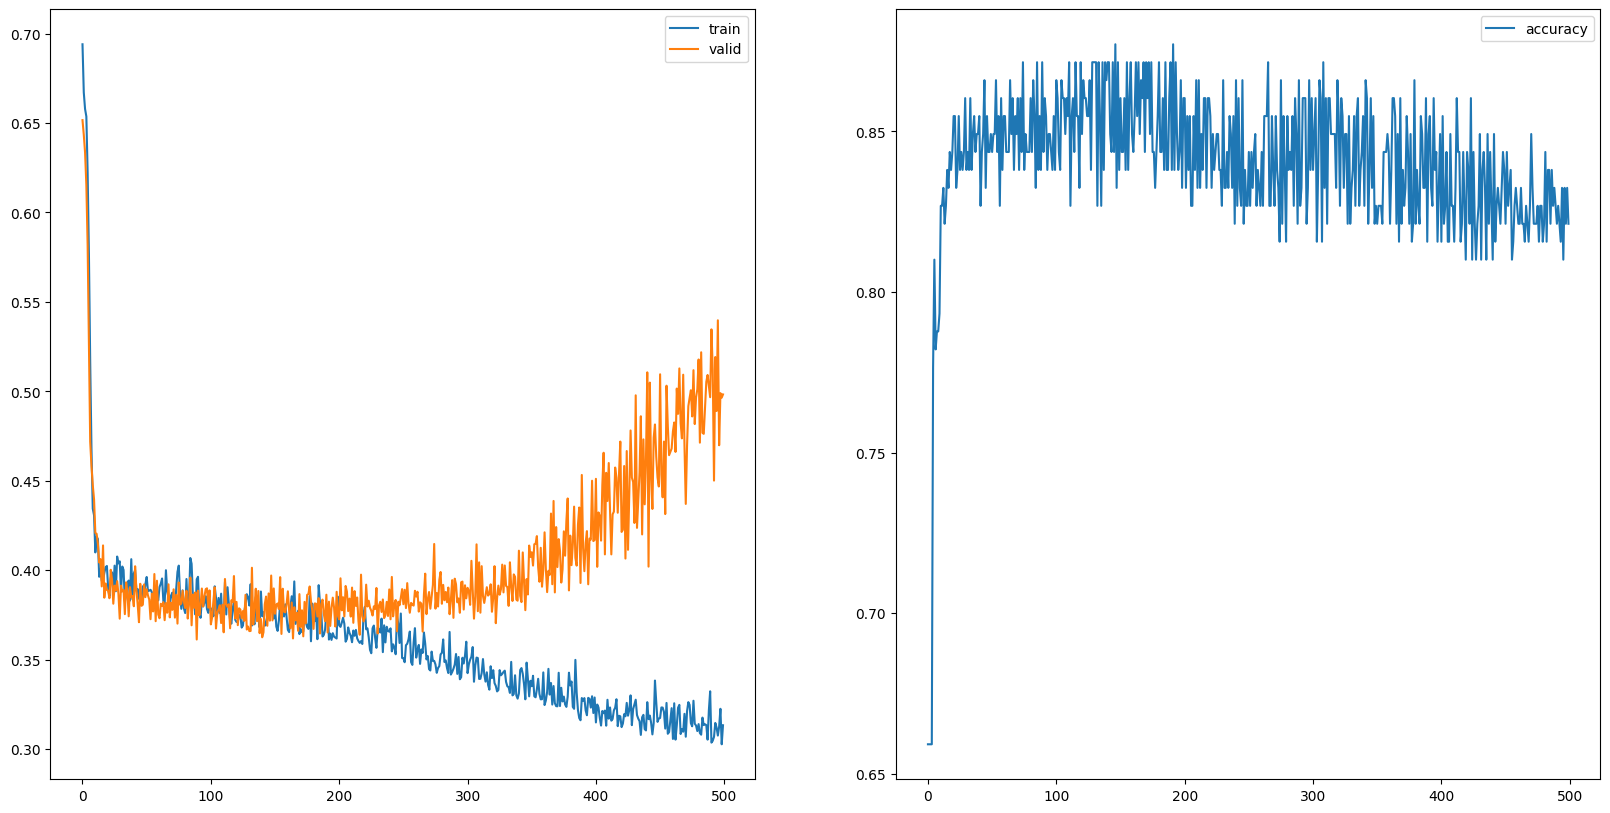

In [21]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(train_hist,label='train')
a[0].plot(valid_hist,label='valid')
a[0].legend()
a[1].plot(acc,label='accuracy')
a[1].legend()


### Overfitting 방지

In [22]:
class DropOutNN(nn.Module):
    def __init__(self,dropout_rate):
        super(DropOutNN,self).__init__()
        self.fc_layer = nn.Sequential(
            nn.Linear(22,128),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),
            nn.Linear(128,64),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),
            nn.Linear(64,32),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate),
            nn.Linear(32,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.fc_layer(x)

In [23]:
d_model = DropOutNN(0.3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(d_model.parameters(), lr=0.001)
d_train_hist = []
d_valid_hist = []
d_acc = []

In [24]:
epochs = 500
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loof(d_model,loss_fn,optimizer,train_dataloader)
    d_train_hist.append(train_loss)
    valid_loss, accuracy = valid_loof(d_model,loss_fn,valid_dataloader)
    print(f'valid Loss : {valid_loss:.4f},Accuracy L {accuracy:.4f}')
    d_valid_hist.append(valid_loss)
    d_acc.append(accuracy)

Epoch 1
-------------------------------


Loss: 0.629228413105011: 100%|██████████| 23/23 [00:00<00:00, 272.50it/s]


valid Loss : 0.6517,Accuracy L 0.6592
Epoch 2
-------------------------------


Loss: 0.4897536337375641: 100%|██████████| 23/23 [00:00<00:00, 227.65it/s]


valid Loss : 0.6435,Accuracy L 0.6592
Epoch 3
-------------------------------


Loss: 0.6626983880996704: 100%|██████████| 23/23 [00:00<00:00, 334.97it/s]


valid Loss : 0.6405,Accuracy L 0.6592
Epoch 4
-------------------------------


Loss: 0.7434964776039124: 100%|██████████| 23/23 [00:00<00:00, 271.88it/s]


valid Loss : 0.6345,Accuracy L 0.6592
Epoch 5
-------------------------------


Loss: 0.7484009265899658: 100%|██████████| 23/23 [00:00<00:00, 270.53it/s]


valid Loss : 0.6167,Accuracy L 0.6592
Epoch 6
-------------------------------


Loss: 0.6742051839828491: 100%|██████████| 23/23 [00:00<00:00, 314.25it/s]


valid Loss : 0.5840,Accuracy L 0.7542
Epoch 7
-------------------------------


Loss: 0.5173039436340332: 100%|██████████| 23/23 [00:00<00:00, 227.74it/s] 


valid Loss : 0.5369,Accuracy L 0.8715
Epoch 8
-------------------------------


Loss: 0.4267764389514923: 100%|██████████| 23/23 [00:00<00:00, 219.34it/s]


valid Loss : 0.4929,Accuracy L 0.7877
Epoch 9
-------------------------------


Loss: 0.4557493031024933: 100%|██████████| 23/23 [00:00<00:00, 330.41it/s]


valid Loss : 0.4752,Accuracy L 0.7821
Epoch 10
-------------------------------


Loss: 0.5790756940841675: 100%|██████████| 23/23 [00:00<00:00, 277.30it/s]

valid Loss : 0.4590,Accuracy L 0.7821
Epoch 11
-------------------------------



Loss: 0.423860639333725: 100%|██████████| 23/23 [00:00<00:00, 271.46it/s]


valid Loss : 0.4536,Accuracy L 0.7821
Epoch 12
-------------------------------


Loss: 0.2892616391181946: 100%|██████████| 23/23 [00:00<00:00, 335.41it/s]


valid Loss : 0.4364,Accuracy L 0.7989
Epoch 13
-------------------------------


Loss: 0.4003363251686096: 100%|██████████| 23/23 [00:00<00:00, 269.32it/s]


valid Loss : 0.4411,Accuracy L 0.7877
Epoch 14
-------------------------------


Loss: 0.6240697503089905: 100%|██████████| 23/23 [00:00<00:00, 267.87it/s]


valid Loss : 0.4248,Accuracy L 0.8212
Epoch 15
-------------------------------


Loss: 0.5192248225212097: 100%|██████████| 23/23 [00:00<00:00, 342.91it/s]


valid Loss : 0.4295,Accuracy L 0.8212
Epoch 16
-------------------------------


Loss: 0.37947091460227966: 100%|██████████| 23/23 [00:00<00:00, 274.83it/s]


valid Loss : 0.4266,Accuracy L 0.8212
Epoch 17
-------------------------------


Loss: 0.47304844856262207: 100%|██████████| 23/23 [00:00<00:00, 230.38it/s]


valid Loss : 0.4216,Accuracy L 0.8324
Epoch 18
-------------------------------


Loss: 0.45860323309898376: 100%|██████████| 23/23 [00:00<00:00, 278.21it/s]


valid Loss : 0.4111,Accuracy L 0.8212
Epoch 19
-------------------------------


Loss: 0.26671233773231506: 100%|██████████| 23/23 [00:00<00:00, 276.15it/s]


valid Loss : 0.4254,Accuracy L 0.8212
Epoch 20
-------------------------------


Loss: 0.6187621355056763: 100%|██████████| 23/23 [00:00<00:00, 229.49it/s]


valid Loss : 0.4069,Accuracy L 0.8268
Epoch 21
-------------------------------


Loss: 0.41783738136291504: 100%|██████████| 23/23 [00:00<00:00, 275.63it/s]


valid Loss : 0.4142,Accuracy L 0.8268
Epoch 22
-------------------------------


Loss: 0.4030379354953766: 100%|██████████| 23/23 [00:00<00:00, 259.51it/s]


valid Loss : 0.4047,Accuracy L 0.8268
Epoch 23
-------------------------------


Loss: 0.19277888536453247: 100%|██████████| 23/23 [00:00<00:00, 256.31it/s]


valid Loss : 0.3962,Accuracy L 0.8492
Epoch 24
-------------------------------


Loss: 0.3440383970737457: 100%|██████████| 23/23 [00:00<00:00, 309.63it/s]


valid Loss : 0.4075,Accuracy L 0.8324
Epoch 25
-------------------------------


Loss: 0.2926039397716522: 100%|██████████| 23/23 [00:00<00:00, 264.78it/s]


valid Loss : 0.4060,Accuracy L 0.8324
Epoch 26
-------------------------------


Loss: 0.6467241048812866: 100%|██████████| 23/23 [00:00<00:00, 224.30it/s]


valid Loss : 0.3924,Accuracy L 0.8436
Epoch 27
-------------------------------


Loss: 0.4478852152824402: 100%|██████████| 23/23 [00:00<00:00, 278.42it/s]


valid Loss : 0.4060,Accuracy L 0.8324
Epoch 28
-------------------------------


Loss: 0.34288981556892395: 100%|██████████| 23/23 [00:00<00:00, 340.31it/s]


valid Loss : 0.4068,Accuracy L 0.8380
Epoch 29
-------------------------------


Loss: 0.3519076108932495: 100%|██████████| 23/23 [00:00<00:00, 256.08it/s]


valid Loss : 0.4029,Accuracy L 0.8380
Epoch 30
-------------------------------


Loss: 0.17460761964321136: 100%|██████████| 23/23 [00:00<00:00, 342.80it/s]


valid Loss : 0.3984,Accuracy L 0.8492
Epoch 31
-------------------------------


Loss: 0.42276278138160706: 100%|██████████| 23/23 [00:00<00:00, 294.35it/s]


valid Loss : 0.3972,Accuracy L 0.8436
Epoch 32
-------------------------------


Loss: 0.379898339509964: 100%|██████████| 23/23 [00:00<00:00, 297.17it/s]


valid Loss : 0.4004,Accuracy L 0.8324
Epoch 33
-------------------------------


Loss: 0.5738053321838379: 100%|██████████| 23/23 [00:00<00:00, 340.55it/s]


valid Loss : 0.4033,Accuracy L 0.8324
Epoch 34
-------------------------------


Loss: 0.1262837052345276: 100%|██████████| 23/23 [00:00<00:00, 239.55it/s]


valid Loss : 0.4026,Accuracy L 0.8324
Epoch 35
-------------------------------


Loss: 0.4695630967617035: 100%|██████████| 23/23 [00:00<00:00, 356.89it/s]


valid Loss : 0.3976,Accuracy L 0.8436
Epoch 36
-------------------------------


Loss: 0.6301361918449402: 100%|██████████| 23/23 [00:00<00:00, 279.31it/s]


valid Loss : 0.4017,Accuracy L 0.8324
Epoch 37
-------------------------------


Loss: 0.5409033894538879: 100%|██████████| 23/23 [00:00<00:00, 237.97it/s]


valid Loss : 0.3983,Accuracy L 0.8436
Epoch 38
-------------------------------


Loss: 0.42768654227256775: 100%|██████████| 23/23 [00:00<00:00, 273.00it/s]


valid Loss : 0.3954,Accuracy L 0.8436
Epoch 39
-------------------------------


Loss: 0.8722431659698486: 100%|██████████| 23/23 [00:00<00:00, 280.45it/s]


valid Loss : 0.4027,Accuracy L 0.8324
Epoch 40
-------------------------------


Loss: 0.6188145279884338: 100%|██████████| 23/23 [00:00<00:00, 241.01it/s]


valid Loss : 0.3956,Accuracy L 0.8380
Epoch 41
-------------------------------


Loss: 0.17183484137058258: 100%|██████████| 23/23 [00:00<00:00, 333.51it/s]


valid Loss : 0.3995,Accuracy L 0.8436
Epoch 42
-------------------------------


Loss: 0.336130291223526: 100%|██████████| 23/23 [00:00<00:00, 337.70it/s]


valid Loss : 0.3955,Accuracy L 0.8436
Epoch 43
-------------------------------


Loss: 0.12545613944530487: 100%|██████████| 23/23 [00:00<00:00, 275.81it/s]


valid Loss : 0.4005,Accuracy L 0.8380
Epoch 44
-------------------------------


Loss: 0.19095773994922638: 100%|██████████| 23/23 [00:00<00:00, 305.36it/s]


valid Loss : 0.4051,Accuracy L 0.8324
Epoch 45
-------------------------------


Loss: 0.6432860493659973: 100%|██████████| 23/23 [00:00<00:00, 303.07it/s]


valid Loss : 0.3910,Accuracy L 0.8380
Epoch 46
-------------------------------


Loss: 0.44581979513168335: 100%|██████████| 23/23 [00:00<00:00, 238.32it/s]


valid Loss : 0.3944,Accuracy L 0.8380
Epoch 47
-------------------------------


Loss: 0.45760253071784973: 100%|██████████| 23/23 [00:00<00:00, 317.09it/s]


valid Loss : 0.3902,Accuracy L 0.8380
Epoch 48
-------------------------------


Loss: 0.3586314916610718: 100%|██████████| 23/23 [00:00<00:00, 341.75it/s]


valid Loss : 0.3955,Accuracy L 0.8324
Epoch 49
-------------------------------


Loss: 0.2523632347583771: 100%|██████████| 23/23 [00:00<00:00, 244.82it/s]


valid Loss : 0.3892,Accuracy L 0.8436
Epoch 50
-------------------------------


Loss: 0.29283469915390015: 100%|██████████| 23/23 [00:00<00:00, 301.54it/s]


valid Loss : 0.3868,Accuracy L 0.8436
Epoch 51
-------------------------------


Loss: 0.387253999710083: 100%|██████████| 23/23 [00:00<00:00, 266.57it/s]


valid Loss : 0.3889,Accuracy L 0.8492
Epoch 52
-------------------------------


Loss: 0.4153156280517578: 100%|██████████| 23/23 [00:00<00:00, 292.87it/s]


valid Loss : 0.3877,Accuracy L 0.8492
Epoch 53
-------------------------------


Loss: 0.4679470956325531: 100%|██████████| 23/23 [00:00<00:00, 316.22it/s]


valid Loss : 0.3907,Accuracy L 0.8380
Epoch 54
-------------------------------


Loss: 0.6488824486732483: 100%|██████████| 23/23 [00:00<00:00, 230.63it/s]


valid Loss : 0.3888,Accuracy L 0.8492
Epoch 55
-------------------------------


Loss: 0.14247365295886993: 100%|██████████| 23/23 [00:00<00:00, 275.75it/s]


valid Loss : 0.3877,Accuracy L 0.8492
Epoch 56
-------------------------------


Loss: 0.21088406443595886: 100%|██████████| 23/23 [00:00<00:00, 249.49it/s]


valid Loss : 0.3968,Accuracy L 0.8436
Epoch 57
-------------------------------


Loss: 0.28538718819618225: 100%|██████████| 23/23 [00:00<00:00, 231.88it/s]


valid Loss : 0.3936,Accuracy L 0.8436
Epoch 58
-------------------------------


Loss: 0.685051679611206: 100%|██████████| 23/23 [00:00<00:00, 282.44it/s]


valid Loss : 0.3841,Accuracy L 0.8436
Epoch 59
-------------------------------


Loss: 0.3228825628757477: 100%|██████████| 23/23 [00:00<00:00, 271.63it/s]


valid Loss : 0.3970,Accuracy L 0.8436
Epoch 60
-------------------------------


Loss: 0.5149237513542175: 100%|██████████| 23/23 [00:00<00:00, 214.24it/s] 


valid Loss : 0.3867,Accuracy L 0.8492
Epoch 61
-------------------------------


Loss: 0.12812814116477966: 100%|██████████| 23/23 [00:00<00:00, 231.65it/s]


valid Loss : 0.3792,Accuracy L 0.8492
Epoch 62
-------------------------------


Loss: 0.3684735596179962: 100%|██████████| 23/23 [00:00<00:00, 267.14it/s]


valid Loss : 0.3864,Accuracy L 0.8547
Epoch 63
-------------------------------


Loss: 0.3174649477005005: 100%|██████████| 23/23 [00:00<00:00, 226.45it/s]


valid Loss : 0.3846,Accuracy L 0.8492
Epoch 64
-------------------------------


Loss: 1.1158031225204468: 100%|██████████| 23/23 [00:00<00:00, 337.81it/s]


valid Loss : 0.3880,Accuracy L 0.8492
Epoch 65
-------------------------------


Loss: 0.2257709503173828: 100%|██████████| 23/23 [00:00<00:00, 277.56it/s]


valid Loss : 0.3907,Accuracy L 0.8436
Epoch 66
-------------------------------


Loss: 0.4225007891654968: 100%|██████████| 23/23 [00:00<00:00, 202.39it/s] 


valid Loss : 0.3958,Accuracy L 0.8324
Epoch 67
-------------------------------


Loss: 0.6671898365020752: 100%|██████████| 23/23 [00:00<00:00, 282.81it/s]


valid Loss : 0.3791,Accuracy L 0.8436
Epoch 68
-------------------------------


Loss: 0.34792566299438477: 100%|██████████| 23/23 [00:00<00:00, 279.19it/s]


valid Loss : 0.3920,Accuracy L 0.8380
Epoch 69
-------------------------------


Loss: 0.6901202201843262: 100%|██████████| 23/23 [00:00<00:00, 249.34it/s]


valid Loss : 0.3845,Accuracy L 0.8436
Epoch 70
-------------------------------


Loss: 0.6461141705513: 100%|██████████| 23/23 [00:00<00:00, 305.11it/s]


valid Loss : 0.3879,Accuracy L 0.8380
Epoch 71
-------------------------------


Loss: 0.9299727082252502: 100%|██████████| 23/23 [00:00<00:00, 296.06it/s]


valid Loss : 0.3967,Accuracy L 0.8324
Epoch 72
-------------------------------


Loss: 0.36342063546180725: 100%|██████████| 23/23 [00:00<00:00, 254.18it/s]


valid Loss : 0.3851,Accuracy L 0.8436
Epoch 73
-------------------------------


Loss: 0.6545828580856323: 100%|██████████| 23/23 [00:00<00:00, 301.03it/s]


valid Loss : 0.3915,Accuracy L 0.8324
Epoch 74
-------------------------------


Loss: 0.18024654686450958: 100%|██████████| 23/23 [00:00<00:00, 279.46it/s]


valid Loss : 0.3846,Accuracy L 0.8324
Epoch 75
-------------------------------


Loss: 0.1492185741662979: 100%|██████████| 23/23 [00:00<00:00, 277.18it/s]

valid Loss : 0.3838,Accuracy L 0.8324


Epoch 76
-------------------------------


Loss: 0.46112319827079773: 100%|██████████| 23/23 [00:00<00:00, 287.82it/s]


valid Loss : 0.3887,Accuracy L 0.8324
Epoch 77
-------------------------------


Loss: 0.2894417345523834: 100%|██████████| 23/23 [00:00<00:00, 276.27it/s]


valid Loss : 0.3911,Accuracy L 0.8380
Epoch 78
-------------------------------


Loss: 0.5288949012756348: 100%|██████████| 23/23 [00:00<00:00, 271.50it/s]


valid Loss : 0.3844,Accuracy L 0.8380
Epoch 79
-------------------------------


Loss: 0.6321324110031128: 100%|██████████| 23/23 [00:00<00:00, 302.08it/s]


valid Loss : 0.3870,Accuracy L 0.8380
Epoch 80
-------------------------------


Loss: 0.16067761182785034: 100%|██████████| 23/23 [00:00<00:00, 303.92it/s]


valid Loss : 0.3902,Accuracy L 0.8324
Epoch 81
-------------------------------


Loss: 0.7023413181304932: 100%|██████████| 23/23 [00:00<00:00, 244.83it/s]


valid Loss : 0.3926,Accuracy L 0.8324
Epoch 82
-------------------------------


Loss: 0.8467984795570374: 100%|██████████| 23/23 [00:00<00:00, 273.01it/s]


valid Loss : 0.3897,Accuracy L 0.8268
Epoch 83
-------------------------------


Loss: 0.5018203854560852: 100%|██████████| 23/23 [00:00<00:00, 339.21it/s]


valid Loss : 0.3773,Accuracy L 0.8547
Epoch 84
-------------------------------


Loss: 0.1953524798154831: 100%|██████████| 23/23 [00:00<00:00, 275.84it/s]


valid Loss : 0.3900,Accuracy L 0.8324
Epoch 85
-------------------------------


Loss: 0.4854535758495331: 100%|██████████| 23/23 [00:00<00:00, 344.74it/s]


valid Loss : 0.3949,Accuracy L 0.8268
Epoch 86
-------------------------------


Loss: 0.2680886387825012: 100%|██████████| 23/23 [00:00<00:00, 293.47it/s]


valid Loss : 0.3869,Accuracy L 0.8324
Epoch 87
-------------------------------


Loss: 0.5343220829963684: 100%|██████████| 23/23 [00:00<00:00, 248.28it/s]


valid Loss : 0.3874,Accuracy L 0.8324
Epoch 88
-------------------------------


Loss: 0.26256486773490906: 100%|██████████| 23/23 [00:00<00:00, 299.24it/s]


valid Loss : 0.3833,Accuracy L 0.8324
Epoch 89
-------------------------------


Loss: 0.6191873550415039: 100%|██████████| 23/23 [00:00<00:00, 351.18it/s]


valid Loss : 0.3842,Accuracy L 0.8380
Epoch 90
-------------------------------


Loss: 0.518604576587677: 100%|██████████| 23/23 [00:00<00:00, 275.82it/s]


valid Loss : 0.3879,Accuracy L 0.8324
Epoch 91
-------------------------------


Loss: 0.3837380111217499: 100%|██████████| 23/23 [00:00<00:00, 338.74it/s]

valid Loss : 0.3920,Accuracy L 0.8268


Epoch 92
-------------------------------


Loss: 0.45754021406173706: 100%|██████████| 23/23 [00:00<00:00, 340.91it/s]


valid Loss : 0.3924,Accuracy L 0.8268
Epoch 93
-------------------------------


Loss: 0.3469659984111786: 100%|██████████| 23/23 [00:00<00:00, 240.01it/s]


valid Loss : 0.3907,Accuracy L 0.8324
Epoch 94
-------------------------------


Loss: 1.3304800987243652: 100%|██████████| 23/23 [00:00<00:00, 298.02it/s]


valid Loss : 0.3945,Accuracy L 0.8268
Epoch 95
-------------------------------


Loss: 0.40045157074928284: 100%|██████████| 23/23 [00:00<00:00, 275.87it/s]


valid Loss : 0.3852,Accuracy L 0.8324
Epoch 96
-------------------------------


Loss: 0.38301974534988403: 100%|██████████| 23/23 [00:00<00:00, 229.93it/s]


valid Loss : 0.3945,Accuracy L 0.8268
Epoch 97
-------------------------------


Loss: 0.3142349421977997: 100%|██████████| 23/23 [00:00<00:00, 243.40it/s]


valid Loss : 0.3952,Accuracy L 0.8268
Epoch 98
-------------------------------


Loss: 0.28667473793029785: 100%|██████████| 23/23 [00:00<00:00, 245.54it/s]


valid Loss : 0.3855,Accuracy L 0.8436
Epoch 99
-------------------------------


Loss: 0.4671173691749573: 100%|██████████| 23/23 [00:00<00:00, 237.73it/s]


valid Loss : 0.3962,Accuracy L 0.8268
Epoch 100
-------------------------------


Loss: 0.49494627118110657: 100%|██████████| 23/23 [00:00<00:00, 235.26it/s]


valid Loss : 0.3903,Accuracy L 0.8324
Epoch 101
-------------------------------


Loss: 0.30279454588890076: 100%|██████████| 23/23 [00:00<00:00, 286.56it/s]

valid Loss : 0.3895,Accuracy L 0.8380
Epoch 102
-------------------------------



Loss: 0.18419352173805237: 100%|██████████| 23/23 [00:00<00:00, 253.92it/s]


valid Loss : 0.3909,Accuracy L 0.8380
Epoch 103
-------------------------------


Loss: 0.7092536091804504: 100%|██████████| 23/23 [00:00<00:00, 310.90it/s]


valid Loss : 0.3912,Accuracy L 0.8380
Epoch 104
-------------------------------


Loss: 0.27759620547294617: 100%|██████████| 23/23 [00:00<00:00, 221.48it/s]


valid Loss : 0.3852,Accuracy L 0.8436
Epoch 105
-------------------------------


Loss: 0.25110334157943726: 100%|██████████| 23/23 [00:00<00:00, 279.36it/s]


valid Loss : 0.3933,Accuracy L 0.8324
Epoch 106
-------------------------------


Loss: 0.5968132615089417: 100%|██████████| 23/23 [00:00<00:00, 287.93it/s]


valid Loss : 0.3926,Accuracy L 0.8324
Epoch 107
-------------------------------


Loss: 0.13686980307102203: 100%|██████████| 23/23 [00:00<00:00, 259.23it/s]


valid Loss : 0.3826,Accuracy L 0.8380
Epoch 108
-------------------------------


Loss: 0.4729751646518707: 100%|██████████| 23/23 [00:00<00:00, 244.15it/s]


valid Loss : 0.3930,Accuracy L 0.8324
Epoch 109
-------------------------------


Loss: 0.5981189012527466: 100%|██████████| 23/23 [00:00<00:00, 325.47it/s]


valid Loss : 0.3898,Accuracy L 0.8324
Epoch 110
-------------------------------


Loss: 0.8981504440307617: 100%|██████████| 23/23 [00:00<00:00, 351.27it/s]


valid Loss : 0.3906,Accuracy L 0.8380
Epoch 111
-------------------------------


Loss: 0.1355898380279541: 100%|██████████| 23/23 [00:00<00:00, 275.75it/s]


valid Loss : 0.3911,Accuracy L 0.8324
Epoch 112
-------------------------------


Loss: 0.8384071588516235: 100%|██████████| 23/23 [00:00<00:00, 265.39it/s]


valid Loss : 0.3923,Accuracy L 0.8324
Epoch 113
-------------------------------


Loss: 0.3691261410713196: 100%|██████████| 23/23 [00:00<00:00, 275.84it/s]


valid Loss : 0.3971,Accuracy L 0.8268
Epoch 114
-------------------------------


Loss: 0.8116625547409058: 100%|██████████| 23/23 [00:00<00:00, 270.94it/s]


valid Loss : 0.3947,Accuracy L 0.8324
Epoch 115
-------------------------------


Loss: 0.4685165584087372: 100%|██████████| 23/23 [00:00<00:00, 286.00it/s]


valid Loss : 0.3838,Accuracy L 0.8436
Epoch 116
-------------------------------


Loss: 0.2568114101886749: 100%|██████████| 23/23 [00:00<00:00, 296.30it/s]


valid Loss : 0.3939,Accuracy L 0.8324
Epoch 117
-------------------------------


Loss: 0.7579544186592102: 100%|██████████| 23/23 [00:00<00:00, 199.80it/s] 


valid Loss : 0.3865,Accuracy L 0.8380
Epoch 118
-------------------------------


Loss: 0.727003812789917: 100%|██████████| 23/23 [00:00<00:00, 298.65it/s]


valid Loss : 0.3883,Accuracy L 0.8380
Epoch 119
-------------------------------


Loss: 0.19632890820503235: 100%|██████████| 23/23 [00:00<00:00, 276.09it/s]


valid Loss : 0.3860,Accuracy L 0.8436
Epoch 120
-------------------------------


Loss: 0.41585397720336914: 100%|██████████| 23/23 [00:00<00:00, 229.28it/s]


valid Loss : 0.3838,Accuracy L 0.8436
Epoch 121
-------------------------------


Loss: 0.5167075991630554: 100%|██████████| 23/23 [00:00<00:00, 259.77it/s]


valid Loss : 0.3954,Accuracy L 0.8324
Epoch 122
-------------------------------


Loss: 0.34546732902526855: 100%|██████████| 23/23 [00:00<00:00, 223.66it/s]


valid Loss : 0.3939,Accuracy L 0.8212
Epoch 123
-------------------------------


Loss: 0.5089226961135864: 100%|██████████| 23/23 [00:00<00:00, 255.77it/s]


valid Loss : 0.3946,Accuracy L 0.8268
Epoch 124
-------------------------------


Loss: 0.10775431990623474: 100%|██████████| 23/23 [00:00<00:00, 293.01it/s]


valid Loss : 0.3805,Accuracy L 0.8547
Epoch 125
-------------------------------


Loss: 0.5955724120140076: 100%|██████████| 23/23 [00:00<00:00, 327.17it/s]


valid Loss : 0.3847,Accuracy L 0.8436
Epoch 126
-------------------------------


Loss: 0.19616647064685822: 100%|██████████| 23/23 [00:00<00:00, 272.72it/s]


valid Loss : 0.3851,Accuracy L 0.8380
Epoch 127
-------------------------------


Loss: 0.41612309217453003: 100%|██████████| 23/23 [00:00<00:00, 270.79it/s]


valid Loss : 0.3794,Accuracy L 0.8547
Epoch 128
-------------------------------


Loss: 0.2597249448299408: 100%|██████████| 23/23 [00:00<00:00, 231.38it/s]


valid Loss : 0.3884,Accuracy L 0.8380
Epoch 129
-------------------------------


Loss: 0.47223347425460815: 100%|██████████| 23/23 [00:00<00:00, 262.87it/s]


valid Loss : 0.3872,Accuracy L 0.8436
Epoch 130
-------------------------------


Loss: 0.0840594694018364: 100%|██████████| 23/23 [00:00<00:00, 280.53it/s]


valid Loss : 0.3894,Accuracy L 0.8380
Epoch 131
-------------------------------


Loss: 0.3989867866039276: 100%|██████████| 23/23 [00:00<00:00, 264.02it/s]


valid Loss : 0.3938,Accuracy L 0.8436
Epoch 132
-------------------------------


Loss: 0.4643271863460541: 100%|██████████| 23/23 [00:00<00:00, 204.29it/s] 


valid Loss : 0.3872,Accuracy L 0.8380
Epoch 133
-------------------------------


Loss: 0.5037328600883484: 100%|██████████| 23/23 [00:00<00:00, 232.96it/s]


valid Loss : 0.3859,Accuracy L 0.8380
Epoch 134
-------------------------------


Loss: 0.2320731282234192: 100%|██████████| 23/23 [00:00<00:00, 294.37it/s]


valid Loss : 0.3831,Accuracy L 0.8380
Epoch 135
-------------------------------


Loss: 0.4629533588886261: 100%|██████████| 23/23 [00:00<00:00, 195.03it/s] 


valid Loss : 0.3816,Accuracy L 0.8380
Epoch 136
-------------------------------


Loss: 0.2555061876773834: 100%|██████████| 23/23 [00:00<00:00, 302.06it/s]


valid Loss : 0.3956,Accuracy L 0.8268
Epoch 137
-------------------------------


Loss: 0.13580040633678436: 100%|██████████| 23/23 [00:00<00:00, 274.80it/s]


valid Loss : 0.3901,Accuracy L 0.8324
Epoch 138
-------------------------------


Loss: 0.3100758194923401: 100%|██████████| 23/23 [00:00<00:00, 270.09it/s]


valid Loss : 0.3826,Accuracy L 0.8380
Epoch 139
-------------------------------


Loss: 0.22292381525039673: 100%|██████████| 23/23 [00:00<00:00, 306.71it/s]


valid Loss : 0.3808,Accuracy L 0.8380
Epoch 140
-------------------------------


Loss: 0.45459675788879395: 100%|██████████| 23/23 [00:00<00:00, 231.29it/s]


valid Loss : 0.3921,Accuracy L 0.8268
Epoch 141
-------------------------------


Loss: 0.22850553691387177: 100%|██████████| 23/23 [00:00<00:00, 229.73it/s]


valid Loss : 0.3848,Accuracy L 0.8324
Epoch 142
-------------------------------


Loss: 0.16408388316631317: 100%|██████████| 23/23 [00:00<00:00, 232.53it/s]


valid Loss : 0.3859,Accuracy L 0.8380
Epoch 143
-------------------------------


Loss: 0.7641240358352661: 100%|██████████| 23/23 [00:00<00:00, 263.64it/s]


valid Loss : 0.3864,Accuracy L 0.8324
Epoch 144
-------------------------------


Loss: 0.11359620094299316: 100%|██████████| 23/23 [00:00<00:00, 286.23it/s]


valid Loss : 0.3862,Accuracy L 0.8436
Epoch 145
-------------------------------


Loss: 0.38514217734336853: 100%|██████████| 23/23 [00:00<00:00, 314.13it/s]


valid Loss : 0.3900,Accuracy L 0.8324
Epoch 146
-------------------------------


Loss: 0.13988855481147766: 100%|██████████| 23/23 [00:00<00:00, 272.35it/s]


valid Loss : 0.3897,Accuracy L 0.8380
Epoch 147
-------------------------------


Loss: 0.44595226645469666: 100%|██████████| 23/23 [00:00<00:00, 286.02it/s]


valid Loss : 0.3912,Accuracy L 0.8324
Epoch 148
-------------------------------


Loss: 0.3764197528362274: 100%|██████████| 23/23 [00:00<00:00, 289.68it/s]


valid Loss : 0.3850,Accuracy L 0.8436
Epoch 149
-------------------------------


Loss: 0.3729521632194519: 100%|██████████| 23/23 [00:00<00:00, 229.64it/s] 


valid Loss : 0.3838,Accuracy L 0.8436
Epoch 150
-------------------------------


Loss: 0.263944536447525: 100%|██████████| 23/23 [00:00<00:00, 275.44it/s]


valid Loss : 0.3839,Accuracy L 0.8380
Epoch 151
-------------------------------


Loss: 0.26550233364105225: 100%|██████████| 23/23 [00:00<00:00, 285.65it/s]


valid Loss : 0.3888,Accuracy L 0.8380
Epoch 152
-------------------------------


Loss: 0.3096116781234741: 100%|██████████| 23/23 [00:00<00:00, 248.11it/s]


valid Loss : 0.3882,Accuracy L 0.8380
Epoch 153
-------------------------------


Loss: 0.41022446751594543: 100%|██████████| 23/23 [00:00<00:00, 290.54it/s]


valid Loss : 0.3876,Accuracy L 0.8380
Epoch 154
-------------------------------


Loss: 0.1983981877565384: 100%|██████████| 23/23 [00:00<00:00, 230.03it/s]


valid Loss : 0.3844,Accuracy L 0.8380
Epoch 155
-------------------------------


Loss: 0.15975631773471832: 100%|██████████| 23/23 [00:00<00:00, 279.94it/s]


valid Loss : 0.3916,Accuracy L 0.8324
Epoch 156
-------------------------------


Loss: 0.3196471035480499: 100%|██████████| 23/23 [00:00<00:00, 277.17it/s]


valid Loss : 0.3891,Accuracy L 0.8324
Epoch 157
-------------------------------


Loss: 0.3045380115509033: 100%|██████████| 23/23 [00:00<00:00, 228.61it/s]


valid Loss : 0.3966,Accuracy L 0.8212
Epoch 158
-------------------------------


Loss: 0.46553900837898254: 100%|██████████| 23/23 [00:00<00:00, 269.63it/s]


valid Loss : 0.3857,Accuracy L 0.8380
Epoch 159
-------------------------------


Loss: 0.2738720178604126: 100%|██████████| 23/23 [00:00<00:00, 234.21it/s]


valid Loss : 0.3909,Accuracy L 0.8324
Epoch 160
-------------------------------


Loss: 0.4646301567554474: 100%|██████████| 23/23 [00:00<00:00, 248.45it/s]


valid Loss : 0.3871,Accuracy L 0.8436
Epoch 161
-------------------------------


Loss: 0.4593874216079712: 100%|██████████| 23/23 [00:00<00:00, 274.16it/s]


valid Loss : 0.3847,Accuracy L 0.8436
Epoch 162
-------------------------------


Loss: 0.19987568259239197: 100%|██████████| 23/23 [00:00<00:00, 321.89it/s]


valid Loss : 0.3942,Accuracy L 0.8268
Epoch 163
-------------------------------


Loss: 0.34148499369621277: 100%|██████████| 23/23 [00:00<00:00, 256.38it/s]


valid Loss : 0.3927,Accuracy L 0.8268
Epoch 164
-------------------------------


Loss: 0.46808815002441406: 100%|██████████| 23/23 [00:00<00:00, 291.98it/s]


valid Loss : 0.3885,Accuracy L 0.8324
Epoch 165
-------------------------------


Loss: 0.7188505530357361: 100%|██████████| 23/23 [00:00<00:00, 276.22it/s]


valid Loss : 0.3911,Accuracy L 0.8268
Epoch 166
-------------------------------


Loss: 0.2901839017868042: 100%|██████████| 23/23 [00:00<00:00, 237.44it/s]


valid Loss : 0.3904,Accuracy L 0.8324
Epoch 167
-------------------------------


Loss: 0.7206094264984131: 100%|██████████| 23/23 [00:00<00:00, 273.72it/s]


valid Loss : 0.3839,Accuracy L 0.8436
Epoch 168
-------------------------------


Loss: 0.25337445735931396: 100%|██████████| 23/23 [00:00<00:00, 245.91it/s]


valid Loss : 0.3846,Accuracy L 0.8324
Epoch 169
-------------------------------


Loss: 0.3064216673374176: 100%|██████████| 23/23 [00:00<00:00, 233.67it/s]


valid Loss : 0.3935,Accuracy L 0.8324
Epoch 170
-------------------------------


Loss: 0.22371906042099: 100%|██████████| 23/23 [00:00<00:00, 270.62it/s]


valid Loss : 0.3864,Accuracy L 0.8324
Epoch 171
-------------------------------


Loss: 0.5290981531143188: 100%|██████████| 23/23 [00:00<00:00, 272.96it/s]


valid Loss : 0.3871,Accuracy L 0.8324
Epoch 172
-------------------------------


Loss: 0.45253002643585205: 100%|██████████| 23/23 [00:00<00:00, 197.47it/s]


valid Loss : 0.3869,Accuracy L 0.8324
Epoch 173
-------------------------------


Loss: 0.1701262891292572: 100%|██████████| 23/23 [00:00<00:00, 276.53it/s]


valid Loss : 0.3936,Accuracy L 0.8324
Epoch 174
-------------------------------


Loss: 0.35445234179496765: 100%|██████████| 23/23 [00:00<00:00, 273.19it/s]


valid Loss : 0.3869,Accuracy L 0.8492
Epoch 175
-------------------------------


Loss: 0.7419372797012329: 100%|██████████| 23/23 [00:00<00:00, 232.09it/s]


valid Loss : 0.3894,Accuracy L 0.8324
Epoch 176
-------------------------------


Loss: 0.6481971740722656: 100%|██████████| 23/23 [00:00<00:00, 329.99it/s]


valid Loss : 0.3916,Accuracy L 0.8380
Epoch 177
-------------------------------


Loss: 0.3249059319496155: 100%|██████████| 23/23 [00:00<00:00, 272.56it/s]


valid Loss : 0.3821,Accuracy L 0.8492
Epoch 178
-------------------------------


Loss: 0.48085907101631165: 100%|██████████| 23/23 [00:00<00:00, 256.44it/s]


valid Loss : 0.3949,Accuracy L 0.8324
Epoch 179
-------------------------------


Loss: 0.47863495349884033: 100%|██████████| 23/23 [00:00<00:00, 278.01it/s]


valid Loss : 0.3898,Accuracy L 0.8324
Epoch 180
-------------------------------


Loss: 0.21453842520713806: 100%|██████████| 23/23 [00:00<00:00, 272.82it/s]


valid Loss : 0.3816,Accuracy L 0.8492
Epoch 181
-------------------------------


Loss: 0.09807123243808746: 100%|██████████| 23/23 [00:00<00:00, 229.77it/s]


valid Loss : 0.3857,Accuracy L 0.8547
Epoch 182
-------------------------------


Loss: 0.26880374550819397: 100%|██████████| 23/23 [00:00<00:00, 271.50it/s]


valid Loss : 0.3905,Accuracy L 0.8380
Epoch 183
-------------------------------


Loss: 0.4294728636741638: 100%|██████████| 23/23 [00:00<00:00, 267.14it/s]


valid Loss : 0.3905,Accuracy L 0.8380
Epoch 184
-------------------------------


Loss: 0.6262635588645935: 100%|██████████| 23/23 [00:00<00:00, 250.53it/s]


valid Loss : 0.3860,Accuracy L 0.8436
Epoch 185
-------------------------------


Loss: 0.3317556083202362: 100%|██████████| 23/23 [00:00<00:00, 319.80it/s]


valid Loss : 0.3927,Accuracy L 0.8324
Epoch 186
-------------------------------


Loss: 0.31135571002960205: 100%|██████████| 23/23 [00:00<00:00, 273.95it/s]


valid Loss : 0.3847,Accuracy L 0.8603
Epoch 187
-------------------------------


Loss: 0.5618704557418823: 100%|██████████| 23/23 [00:00<00:00, 214.63it/s]


valid Loss : 0.3935,Accuracy L 0.8324
Epoch 188
-------------------------------


Loss: 0.14947254955768585: 100%|██████████| 23/23 [00:00<00:00, 315.61it/s]


valid Loss : 0.3884,Accuracy L 0.8436
Epoch 189
-------------------------------


Loss: 0.39238905906677246: 100%|██████████| 23/23 [00:00<00:00, 298.15it/s]


valid Loss : 0.3976,Accuracy L 0.8268
Epoch 190
-------------------------------


Loss: 0.27325546741485596: 100%|██████████| 23/23 [00:00<00:00, 224.73it/s]


valid Loss : 0.3868,Accuracy L 0.8492
Epoch 191
-------------------------------


Loss: 0.1496058851480484: 100%|██████████| 23/23 [00:00<00:00, 272.59it/s]


valid Loss : 0.3873,Accuracy L 0.8492
Epoch 192
-------------------------------


Loss: 0.304697722196579: 100%|██████████| 23/23 [00:00<00:00, 286.80it/s]


valid Loss : 0.3884,Accuracy L 0.8436
Epoch 193
-------------------------------


Loss: 0.21591246128082275: 100%|██████████| 23/23 [00:00<00:00, 244.69it/s]


valid Loss : 0.3847,Accuracy L 0.8492
Epoch 194
-------------------------------


Loss: 0.19265806674957275: 100%|██████████| 23/23 [00:00<00:00, 275.59it/s]

valid Loss : 0.3840,Accuracy L 0.8547


Epoch 195
-------------------------------


Loss: 0.3960078954696655: 100%|██████████| 23/23 [00:00<00:00, 266.93it/s]


valid Loss : 0.3954,Accuracy L 0.8380
Epoch 196
-------------------------------


Loss: 0.40622687339782715: 100%|██████████| 23/23 [00:00<00:00, 292.46it/s]


valid Loss : 0.3888,Accuracy L 0.8436
Epoch 197
-------------------------------


Loss: 0.38477325439453125: 100%|██████████| 23/23 [00:00<00:00, 317.84it/s]


valid Loss : 0.3909,Accuracy L 0.8380
Epoch 198
-------------------------------


Loss: 0.28152769804000854: 100%|██████████| 23/23 [00:00<00:00, 255.92it/s]


valid Loss : 0.4013,Accuracy L 0.8268
Epoch 199
-------------------------------


Loss: 0.4121306538581848: 100%|██████████| 23/23 [00:00<00:00, 280.87it/s]


valid Loss : 0.3927,Accuracy L 0.8380
Epoch 200
-------------------------------


Loss: 0.39246419072151184: 100%|██████████| 23/23 [00:00<00:00, 253.05it/s]


valid Loss : 0.3840,Accuracy L 0.8547
Epoch 201
-------------------------------


Loss: 0.20624849200248718: 100%|██████████| 23/23 [00:00<00:00, 229.35it/s]


valid Loss : 0.3964,Accuracy L 0.8380
Epoch 202
-------------------------------


Loss: 0.45558977127075195: 100%|██████████| 23/23 [00:00<00:00, 235.73it/s]


valid Loss : 0.3950,Accuracy L 0.8492
Epoch 203
-------------------------------


Loss: 0.6021584272384644: 100%|██████████| 23/23 [00:00<00:00, 211.71it/s]


valid Loss : 0.3948,Accuracy L 0.8436
Epoch 204
-------------------------------


Loss: 0.620843768119812: 100%|██████████| 23/23 [00:00<00:00, 186.46it/s]  


valid Loss : 0.3977,Accuracy L 0.8268
Epoch 205
-------------------------------


Loss: 0.18456898629665375: 100%|██████████| 23/23 [00:00<00:00, 252.95it/s]


valid Loss : 0.3950,Accuracy L 0.8324
Epoch 206
-------------------------------


Loss: 0.5493090748786926: 100%|██████████| 23/23 [00:00<00:00, 280.57it/s]


valid Loss : 0.3964,Accuracy L 0.8268
Epoch 207
-------------------------------


Loss: 0.21133334934711456: 100%|██████████| 23/23 [00:00<00:00, 207.03it/s]


valid Loss : 0.3932,Accuracy L 0.8436
Epoch 208
-------------------------------


Loss: 0.3302466869354248: 100%|██████████| 23/23 [00:00<00:00, 262.50it/s]


valid Loss : 0.3944,Accuracy L 0.8436
Epoch 209
-------------------------------


Loss: 0.07955925911664963: 100%|██████████| 23/23 [00:00<00:00, 214.01it/s]


valid Loss : 0.3948,Accuracy L 0.8492
Epoch 210
-------------------------------


Loss: 0.43616190552711487: 100%|██████████| 23/23 [00:00<00:00, 278.58it/s]


valid Loss : 0.3947,Accuracy L 0.8492
Epoch 211
-------------------------------


Loss: 0.6212624311447144: 100%|██████████| 23/23 [00:00<00:00, 287.16it/s]


valid Loss : 0.3948,Accuracy L 0.8436
Epoch 212
-------------------------------


Loss: 0.5622928738594055: 100%|██████████| 23/23 [00:00<00:00, 237.10it/s]


valid Loss : 0.3924,Accuracy L 0.8492
Epoch 213
-------------------------------


Loss: 0.8947870135307312: 100%|██████████| 23/23 [00:00<00:00, 267.86it/s]


valid Loss : 0.3965,Accuracy L 0.8324
Epoch 214
-------------------------------


Loss: 0.6004190444946289: 100%|██████████| 23/23 [00:00<00:00, 338.11it/s]


valid Loss : 0.3934,Accuracy L 0.8436
Epoch 215
-------------------------------


Loss: 0.4938133656978607: 100%|██████████| 23/23 [00:00<00:00, 240.06it/s]


valid Loss : 0.3928,Accuracy L 0.8436
Epoch 216
-------------------------------


Loss: 0.3823293149471283: 100%|██████████| 23/23 [00:00<00:00, 279.23it/s]


valid Loss : 0.3943,Accuracy L 0.8380
Epoch 217
-------------------------------


Loss: 0.16421929001808167: 100%|██████████| 23/23 [00:00<00:00, 255.63it/s]


valid Loss : 0.3938,Accuracy L 0.8380
Epoch 218
-------------------------------


Loss: 0.15589429438114166: 100%|██████████| 23/23 [00:00<00:00, 268.04it/s]


valid Loss : 0.3948,Accuracy L 0.8380
Epoch 219
-------------------------------


Loss: 0.5578621625900269: 100%|██████████| 23/23 [00:00<00:00, 272.17it/s]


valid Loss : 0.4035,Accuracy L 0.8324
Epoch 220
-------------------------------


Loss: 0.5945607423782349: 100%|██████████| 23/23 [00:00<00:00, 202.53it/s] 


valid Loss : 0.3997,Accuracy L 0.8324
Epoch 221
-------------------------------


Loss: 0.5051115155220032: 100%|██████████| 23/23 [00:00<00:00, 276.19it/s]


valid Loss : 0.3934,Accuracy L 0.8380
Epoch 222
-------------------------------


Loss: 0.20758268237113953: 100%|██████████| 23/23 [00:00<00:00, 239.15it/s]


valid Loss : 0.3976,Accuracy L 0.8324
Epoch 223
-------------------------------


Loss: 0.45876699686050415: 100%|██████████| 23/23 [00:00<00:00, 206.73it/s]


valid Loss : 0.3945,Accuracy L 0.8380
Epoch 224
-------------------------------


Loss: 0.3631659150123596: 100%|██████████| 23/23 [00:00<00:00, 279.51it/s]


valid Loss : 0.3961,Accuracy L 0.8380
Epoch 225
-------------------------------


Loss: 0.7279931902885437: 100%|██████████| 23/23 [00:00<00:00, 284.89it/s]


valid Loss : 0.3926,Accuracy L 0.8436
Epoch 226
-------------------------------


Loss: 0.18425489962100983: 100%|██████████| 23/23 [00:00<00:00, 239.13it/s]


valid Loss : 0.3992,Accuracy L 0.8324
Epoch 227
-------------------------------


Loss: 0.2076127678155899: 100%|██████████| 23/23 [00:00<00:00, 271.21it/s]


valid Loss : 0.3952,Accuracy L 0.8324
Epoch 228
-------------------------------


Loss: 0.42501476407051086: 100%|██████████| 23/23 [00:00<00:00, 260.17it/s]


valid Loss : 0.3878,Accuracy L 0.8547
Epoch 229
-------------------------------


Loss: 0.14626258611679077: 100%|██████████| 23/23 [00:00<00:00, 235.62it/s]


valid Loss : 0.3860,Accuracy L 0.8547
Epoch 230
-------------------------------


Loss: 0.10608859360218048: 100%|██████████| 23/23 [00:00<00:00, 237.27it/s]


valid Loss : 0.3928,Accuracy L 0.8380
Epoch 231
-------------------------------


Loss: 0.2727467715740204: 100%|██████████| 23/23 [00:00<00:00, 262.54it/s]


valid Loss : 0.3918,Accuracy L 0.8492
Epoch 232
-------------------------------


Loss: 0.11591733992099762: 100%|██████████| 23/23 [00:00<00:00, 253.89it/s]


valid Loss : 0.3969,Accuracy L 0.8268
Epoch 233
-------------------------------


Loss: 0.43127796053886414: 100%|██████████| 23/23 [00:00<00:00, 278.11it/s]


valid Loss : 0.3985,Accuracy L 0.8324
Epoch 234
-------------------------------


Loss: 0.3975488245487213: 100%|██████████| 23/23 [00:00<00:00, 229.46it/s]


valid Loss : 0.3992,Accuracy L 0.8380
Epoch 235
-------------------------------


Loss: 0.12287113070487976: 100%|██████████| 23/23 [00:00<00:00, 265.46it/s]


valid Loss : 0.3878,Accuracy L 0.8547
Epoch 236
-------------------------------


Loss: 0.5728112459182739: 100%|██████████| 23/23 [00:00<00:00, 225.06it/s]


valid Loss : 0.3971,Accuracy L 0.8380
Epoch 237
-------------------------------


Loss: 0.3578111231327057: 100%|██████████| 23/23 [00:00<00:00, 196.41it/s]


valid Loss : 0.4067,Accuracy L 0.8324
Epoch 238
-------------------------------


Loss: 0.6141089200973511: 100%|██████████| 23/23 [00:00<00:00, 230.64it/s]


valid Loss : 0.3983,Accuracy L 0.8380
Epoch 239
-------------------------------


Loss: 0.13585525751113892: 100%|██████████| 23/23 [00:00<00:00, 260.78it/s]


valid Loss : 0.4016,Accuracy L 0.8324
Epoch 240
-------------------------------


Loss: 0.8523427248001099: 100%|██████████| 23/23 [00:00<00:00, 228.04it/s] 


valid Loss : 0.4049,Accuracy L 0.8324
Epoch 241
-------------------------------


Loss: 0.6268717646598816: 100%|██████████| 23/23 [00:00<00:00, 234.68it/s]


valid Loss : 0.3980,Accuracy L 0.8380
Epoch 242
-------------------------------


Loss: 0.41617292165756226: 100%|██████████| 23/23 [00:00<00:00, 259.85it/s]


valid Loss : 0.4012,Accuracy L 0.8380
Epoch 243
-------------------------------


Loss: 0.8365046381950378: 100%|██████████| 23/23 [00:00<00:00, 232.44it/s]


valid Loss : 0.3991,Accuracy L 0.8324
Epoch 244
-------------------------------


Loss: 0.3316049575805664: 100%|██████████| 23/23 [00:00<00:00, 262.03it/s]


valid Loss : 0.4075,Accuracy L 0.8324
Epoch 245
-------------------------------


Loss: 0.41114863753318787: 100%|██████████| 23/23 [00:00<00:00, 218.98it/s]


valid Loss : 0.3978,Accuracy L 0.8324
Epoch 246
-------------------------------


Loss: 0.4616597592830658: 100%|██████████| 23/23 [00:00<00:00, 255.21it/s]


valid Loss : 0.3989,Accuracy L 0.8380
Epoch 247
-------------------------------


Loss: 0.33766067028045654: 100%|██████████| 23/23 [00:00<00:00, 344.21it/s]


valid Loss : 0.4022,Accuracy L 0.8380
Epoch 248
-------------------------------


Loss: 0.6398372650146484: 100%|██████████| 23/23 [00:00<00:00, 324.58it/s]


valid Loss : 0.3929,Accuracy L 0.8492
Epoch 249
-------------------------------


Loss: 0.5018545389175415: 100%|██████████| 23/23 [00:00<00:00, 353.39it/s]


valid Loss : 0.3945,Accuracy L 0.8436
Epoch 250
-------------------------------


Loss: 0.2048734873533249: 100%|██████████| 23/23 [00:00<00:00, 340.08it/s]


valid Loss : 0.3967,Accuracy L 0.8436
Epoch 251
-------------------------------


Loss: 0.11129473149776459: 100%|██████████| 23/23 [00:00<00:00, 274.10it/s]


valid Loss : 0.4008,Accuracy L 0.8380
Epoch 252
-------------------------------


Loss: 0.20977787673473358: 100%|██████████| 23/23 [00:00<00:00, 279.88it/s]


valid Loss : 0.4022,Accuracy L 0.8324
Epoch 253
-------------------------------


Loss: 0.22639957070350647: 100%|██████████| 23/23 [00:00<00:00, 316.02it/s]


valid Loss : 0.3938,Accuracy L 0.8436
Epoch 254
-------------------------------


Loss: 0.7474488019943237: 100%|██████████| 23/23 [00:00<00:00, 264.24it/s]


valid Loss : 0.4023,Accuracy L 0.8324
Epoch 255
-------------------------------


Loss: 0.16555622220039368: 100%|██████████| 23/23 [00:00<00:00, 288.00it/s]


valid Loss : 0.4010,Accuracy L 0.8324
Epoch 256
-------------------------------


Loss: 0.6836665272712708: 100%|██████████| 23/23 [00:00<00:00, 309.41it/s]


valid Loss : 0.3945,Accuracy L 0.8436
Epoch 257
-------------------------------


Loss: 0.22419169545173645: 100%|██████████| 23/23 [00:00<00:00, 390.19it/s]


valid Loss : 0.3960,Accuracy L 0.8380
Epoch 258
-------------------------------


Loss: 0.2557624578475952: 100%|██████████| 23/23 [00:00<00:00, 213.75it/s] 


valid Loss : 0.3937,Accuracy L 0.8380
Epoch 259
-------------------------------


Loss: 0.19550347328186035: 100%|██████████| 23/23 [00:00<00:00, 325.06it/s]


valid Loss : 0.3933,Accuracy L 0.8324
Epoch 260
-------------------------------


Loss: 0.22502608597278595: 100%|██████████| 23/23 [00:00<00:00, 346.52it/s]


valid Loss : 0.3923,Accuracy L 0.8324
Epoch 261
-------------------------------


Loss: 0.06902486085891724: 100%|██████████| 23/23 [00:00<00:00, 275.87it/s]


valid Loss : 0.3965,Accuracy L 0.8324
Epoch 262
-------------------------------


Loss: 0.05960141494870186: 100%|██████████| 23/23 [00:00<00:00, 272.72it/s]


valid Loss : 0.4034,Accuracy L 0.8268
Epoch 263
-------------------------------


Loss: 0.23024865984916687: 100%|██████████| 23/23 [00:00<00:00, 291.31it/s]


valid Loss : 0.3917,Accuracy L 0.8324
Epoch 264
-------------------------------


Loss: 0.13192826509475708: 100%|██████████| 23/23 [00:00<00:00, 355.04it/s]


valid Loss : 0.3960,Accuracy L 0.8324
Epoch 265
-------------------------------


Loss: 0.35246139764785767: 100%|██████████| 23/23 [00:00<00:00, 280.05it/s]


valid Loss : 0.3935,Accuracy L 0.8324
Epoch 266
-------------------------------


Loss: 0.2551221549510956: 100%|██████████| 23/23 [00:00<00:00, 434.46it/s]


valid Loss : 0.3919,Accuracy L 0.8436
Epoch 267
-------------------------------


Loss: 0.10128624737262726: 100%|██████████| 23/23 [00:00<00:00, 380.68it/s]


valid Loss : 0.3996,Accuracy L 0.8268
Epoch 268
-------------------------------


Loss: 0.10711479187011719: 100%|██████████| 23/23 [00:00<00:00, 223.17it/s]

valid Loss : 0.4019,Accuracy L 0.8324


Epoch 269
-------------------------------


Loss: 0.200744166970253: 100%|██████████| 23/23 [00:00<00:00, 362.58it/s]


valid Loss : 0.3930,Accuracy L 0.8380
Epoch 270
-------------------------------


Loss: 0.14551857113838196: 100%|██████████| 23/23 [00:00<00:00, 261.44it/s]


valid Loss : 0.3929,Accuracy L 0.8324
Epoch 271
-------------------------------


Loss: 0.6324369311332703: 100%|██████████| 23/23 [00:00<00:00, 284.99it/s]


valid Loss : 0.3972,Accuracy L 0.8268
Epoch 272
-------------------------------


Loss: 0.34963497519493103: 100%|██████████| 23/23 [00:00<00:00, 210.78it/s]


valid Loss : 0.3941,Accuracy L 0.8324
Epoch 273
-------------------------------


Loss: 0.6646612882614136: 100%|██████████| 23/23 [00:00<00:00, 257.21it/s]


valid Loss : 0.3915,Accuracy L 0.8324
Epoch 274
-------------------------------


Loss: 0.10461248457431793: 100%|██████████| 23/23 [00:00<00:00, 230.86it/s]


valid Loss : 0.3952,Accuracy L 0.8380
Epoch 275
-------------------------------


Loss: 0.5865724086761475: 100%|██████████| 23/23 [00:00<00:00, 273.83it/s]


valid Loss : 0.3980,Accuracy L 0.8324
Epoch 276
-------------------------------


Loss: 0.31412404775619507: 100%|██████████| 23/23 [00:00<00:00, 307.85it/s]


valid Loss : 0.4023,Accuracy L 0.8324
Epoch 277
-------------------------------


Loss: 0.350589781999588: 100%|██████████| 23/23 [00:00<00:00, 334.03it/s]


valid Loss : 0.3949,Accuracy L 0.8324
Epoch 278
-------------------------------


Loss: 0.18865256011486053: 100%|██████████| 23/23 [00:00<00:00, 268.72it/s]


valid Loss : 0.3971,Accuracy L 0.8324
Epoch 279
-------------------------------


Loss: 0.6488176584243774: 100%|██████████| 23/23 [00:00<00:00, 358.50it/s]


valid Loss : 0.4013,Accuracy L 0.8268
Epoch 280
-------------------------------


Loss: 0.1325613111257553: 100%|██████████| 23/23 [00:00<00:00, 338.03it/s]


valid Loss : 0.4010,Accuracy L 0.8324
Epoch 281
-------------------------------


Loss: 0.2973414361476898: 100%|██████████| 23/23 [00:00<00:00, 319.21it/s]


valid Loss : 0.4015,Accuracy L 0.8324
Epoch 282
-------------------------------


Loss: 0.12760549783706665: 100%|██████████| 23/23 [00:00<00:00, 259.01it/s]


valid Loss : 0.4081,Accuracy L 0.8324
Epoch 283
-------------------------------


Loss: 0.23160165548324585: 100%|██████████| 23/23 [00:00<00:00, 302.34it/s]

valid Loss : 0.4015,Accuracy L 0.8324


Epoch 284
-------------------------------


Loss: 0.4638952314853668: 100%|██████████| 23/23 [00:00<00:00, 358.06it/s]


valid Loss : 0.3998,Accuracy L 0.8324
Epoch 285
-------------------------------


Loss: 0.25495827198028564: 100%|██████████| 23/23 [00:00<00:00, 272.25it/s]


valid Loss : 0.3983,Accuracy L 0.8324
Epoch 286
-------------------------------


Loss: 0.29467111825942993: 100%|██████████| 23/23 [00:00<00:00, 276.06it/s]


valid Loss : 0.3997,Accuracy L 0.8324
Epoch 287
-------------------------------


Loss: 0.11837989091873169: 100%|██████████| 23/23 [00:00<00:00, 277.08it/s]


valid Loss : 0.3957,Accuracy L 0.8324
Epoch 288
-------------------------------


Loss: 0.41061943769454956: 100%|██████████| 23/23 [00:00<00:00, 316.00it/s]


valid Loss : 0.3953,Accuracy L 0.8324
Epoch 289
-------------------------------


Loss: 0.2099471539258957: 100%|██████████| 23/23 [00:00<00:00, 328.45it/s]


valid Loss : 0.3894,Accuracy L 0.8380
Epoch 290
-------------------------------


Loss: 0.11885236203670502: 100%|██████████| 23/23 [00:00<00:00, 321.44it/s]


valid Loss : 0.3926,Accuracy L 0.8380
Epoch 291
-------------------------------


Loss: 0.3792194724082947: 100%|██████████| 23/23 [00:00<00:00, 236.16it/s]


valid Loss : 0.3960,Accuracy L 0.8380
Epoch 292
-------------------------------


Loss: 0.2650795876979828: 100%|██████████| 23/23 [00:00<00:00, 278.86it/s]


valid Loss : 0.3957,Accuracy L 0.8268
Epoch 293
-------------------------------


Loss: 0.8391308188438416: 100%|██████████| 23/23 [00:00<00:00, 275.55it/s]


valid Loss : 0.3905,Accuracy L 0.8380
Epoch 294
-------------------------------


Loss: 0.30097582936286926: 100%|██████████| 23/23 [00:00<00:00, 304.21it/s]


valid Loss : 0.3950,Accuracy L 0.8324
Epoch 295
-------------------------------


Loss: 0.07723705470561981: 100%|██████████| 23/23 [00:00<00:00, 281.51it/s]


valid Loss : 0.4015,Accuracy L 0.8324
Epoch 296
-------------------------------


Loss: 0.13483142852783203: 100%|██████████| 23/23 [00:00<00:00, 306.85it/s]


valid Loss : 0.3937,Accuracy L 0.8324
Epoch 297
-------------------------------


Loss: 0.1950020045042038: 100%|██████████| 23/23 [00:00<00:00, 293.38it/s]


valid Loss : 0.3936,Accuracy L 0.8380
Epoch 298
-------------------------------


Loss: 0.3663458824157715: 100%|██████████| 23/23 [00:00<00:00, 209.88it/s]


valid Loss : 0.4024,Accuracy L 0.8324
Epoch 299
-------------------------------


Loss: 0.08453921973705292: 100%|██████████| 23/23 [00:00<00:00, 267.44it/s]


valid Loss : 0.3978,Accuracy L 0.8324
Epoch 300
-------------------------------


Loss: 0.11544495075941086: 100%|██████████| 23/23 [00:00<00:00, 292.90it/s]


valid Loss : 0.3866,Accuracy L 0.8547
Epoch 301
-------------------------------


Loss: 0.4392903447151184: 100%|██████████| 23/23 [00:00<00:00, 266.75it/s]


valid Loss : 0.3980,Accuracy L 0.8324
Epoch 302
-------------------------------


Loss: 0.8854283094406128: 100%|██████████| 23/23 [00:00<00:00, 245.93it/s]


valid Loss : 0.3910,Accuracy L 0.8436
Epoch 303
-------------------------------


Loss: 0.38920149207115173: 100%|██████████| 23/23 [00:00<00:00, 391.66it/s]


valid Loss : 0.3952,Accuracy L 0.8380
Epoch 304
-------------------------------


Loss: 0.3961547017097473: 100%|██████████| 23/23 [00:00<00:00, 346.08it/s]


valid Loss : 0.3936,Accuracy L 0.8380
Epoch 305
-------------------------------


Loss: 0.1611291468143463: 100%|██████████| 23/23 [00:00<00:00, 308.23it/s]


valid Loss : 0.4027,Accuracy L 0.8324
Epoch 306
-------------------------------


Loss: 0.5247331261634827: 100%|██████████| 23/23 [00:00<00:00, 276.11it/s]


valid Loss : 0.3977,Accuracy L 0.8324
Epoch 307
-------------------------------


Loss: 0.3298165202140808: 100%|██████████| 23/23 [00:00<00:00, 305.11it/s]


valid Loss : 0.4012,Accuracy L 0.8324
Epoch 308
-------------------------------


Loss: 0.5499989986419678: 100%|██████████| 23/23 [00:00<00:00, 344.20it/s]


valid Loss : 0.4098,Accuracy L 0.8212
Epoch 309
-------------------------------


Loss: 0.37348636984825134: 100%|██████████| 23/23 [00:00<00:00, 286.74it/s]


valid Loss : 0.3974,Accuracy L 0.8324
Epoch 310
-------------------------------


Loss: 0.26501473784446716: 100%|██████████| 23/23 [00:00<00:00, 345.36it/s]


valid Loss : 0.4041,Accuracy L 0.8324
Epoch 311
-------------------------------


Loss: 0.2818751633167267: 100%|██████████| 23/23 [00:00<00:00, 269.16it/s]


valid Loss : 0.4004,Accuracy L 0.8324
Epoch 312
-------------------------------


Loss: 0.6960548162460327: 100%|██████████| 23/23 [00:00<00:00, 228.89it/s]


valid Loss : 0.4084,Accuracy L 0.8324
Epoch 313
-------------------------------


Loss: 0.20964182913303375: 100%|██████████| 23/23 [00:00<00:00, 286.51it/s]


valid Loss : 0.4051,Accuracy L 0.8324
Epoch 314
-------------------------------


Loss: 0.41942155361175537: 100%|██████████| 23/23 [00:00<00:00, 281.96it/s]


valid Loss : 0.4048,Accuracy L 0.8324
Epoch 315
-------------------------------


Loss: 0.27417516708374023: 100%|██████████| 23/23 [00:00<00:00, 330.22it/s]


valid Loss : 0.3972,Accuracy L 0.8436
Epoch 316
-------------------------------


Loss: 0.18353667855262756: 100%|██████████| 23/23 [00:00<00:00, 237.93it/s]


valid Loss : 0.4030,Accuracy L 0.8268
Epoch 317
-------------------------------


Loss: 0.5331040024757385: 100%|██████████| 23/23 [00:00<00:00, 315.88it/s]


valid Loss : 0.4054,Accuracy L 0.8268
Epoch 318
-------------------------------


Loss: 0.7257472276687622: 100%|██████████| 23/23 [00:00<00:00, 304.52it/s]


valid Loss : 0.3995,Accuracy L 0.8380
Epoch 319
-------------------------------


Loss: 0.5734054446220398: 100%|██████████| 23/23 [00:00<00:00, 249.29it/s]

valid Loss : 0.4019,Accuracy L 0.8380


Epoch 320
-------------------------------


Loss: 0.35463666915893555: 100%|██████████| 23/23 [00:00<00:00, 277.40it/s]


valid Loss : 0.3976,Accuracy L 0.8436
Epoch 321
-------------------------------


Loss: 0.3325735926628113: 100%|██████████| 23/23 [00:00<00:00, 295.94it/s]

valid Loss : 0.3988,Accuracy L 0.8380


Epoch 322
-------------------------------


Loss: 0.47679832577705383: 100%|██████████| 23/23 [00:00<00:00, 304.27it/s]


valid Loss : 0.4086,Accuracy L 0.8324
Epoch 323
-------------------------------


Loss: 0.35802608728408813: 100%|██████████| 23/23 [00:00<00:00, 284.94it/s]


valid Loss : 0.3994,Accuracy L 0.8436
Epoch 324
-------------------------------


Loss: 0.5323970317840576: 100%|██████████| 23/23 [00:00<00:00, 305.93it/s]


valid Loss : 0.3991,Accuracy L 0.8380
Epoch 325
-------------------------------


Loss: 0.3263965845108032: 100%|██████████| 23/23 [00:00<00:00, 323.43it/s]


valid Loss : 0.3997,Accuracy L 0.8380
Epoch 326
-------------------------------


Loss: 0.7244197130203247: 100%|██████████| 23/23 [00:00<00:00, 243.00it/s]


valid Loss : 0.3991,Accuracy L 0.8380
Epoch 327
-------------------------------


Loss: 0.48906615376472473: 100%|██████████| 23/23 [00:00<00:00, 287.78it/s]


valid Loss : 0.4077,Accuracy L 0.8324
Epoch 328
-------------------------------


Loss: 0.2168026566505432: 100%|██████████| 23/23 [00:00<00:00, 318.90it/s]


valid Loss : 0.4059,Accuracy L 0.8324
Epoch 329
-------------------------------


Loss: 0.4085271656513214: 100%|██████████| 23/23 [00:00<00:00, 282.87it/s]


valid Loss : 0.4018,Accuracy L 0.8380
Epoch 330
-------------------------------


Loss: 0.4360746741294861: 100%|██████████| 23/23 [00:00<00:00, 275.40it/s]


valid Loss : 0.3997,Accuracy L 0.8436
Epoch 331
-------------------------------


Loss: 0.4426422417163849: 100%|██████████| 23/23 [00:00<00:00, 346.18it/s]


valid Loss : 0.3978,Accuracy L 0.8492
Epoch 332
-------------------------------


Loss: 0.22637926042079926: 100%|██████████| 23/23 [00:00<00:00, 284.73it/s]


valid Loss : 0.4013,Accuracy L 0.8380
Epoch 333
-------------------------------


Loss: 0.2960876226425171: 100%|██████████| 23/23 [00:00<00:00, 276.72it/s]


valid Loss : 0.4051,Accuracy L 0.8324
Epoch 334
-------------------------------


Loss: 0.8983927369117737: 100%|██████████| 23/23 [00:00<00:00, 346.33it/s]


valid Loss : 0.3972,Accuracy L 0.8436
Epoch 335
-------------------------------


Loss: 0.4152964949607849: 100%|██████████| 23/23 [00:00<00:00, 311.99it/s]


valid Loss : 0.3978,Accuracy L 0.8436
Epoch 336
-------------------------------


Loss: 0.1432802379131317: 100%|██████████| 23/23 [00:00<00:00, 285.03it/s]


valid Loss : 0.4032,Accuracy L 0.8380
Epoch 337
-------------------------------


Loss: 0.1585574448108673: 100%|██████████| 23/23 [00:00<00:00, 344.02it/s]


valid Loss : 0.4030,Accuracy L 0.8436
Epoch 338
-------------------------------


Loss: 0.25884851813316345: 100%|██████████| 23/23 [00:00<00:00, 272.13it/s]


valid Loss : 0.4109,Accuracy L 0.8380
Epoch 339
-------------------------------


Loss: 0.37878507375717163: 100%|██████████| 23/23 [00:00<00:00, 230.49it/s]

valid Loss : 0.3996,Accuracy L 0.8436
Epoch 340
-------------------------------



Loss: 0.26604634523391724: 100%|██████████| 23/23 [00:00<00:00, 350.83it/s]


valid Loss : 0.4082,Accuracy L 0.8380
Epoch 341
-------------------------------


Loss: 0.23313190042972565: 100%|██████████| 23/23 [00:00<00:00, 324.62it/s]


valid Loss : 0.3974,Accuracy L 0.8603
Epoch 342
-------------------------------


Loss: 0.3357827961444855: 100%|██████████| 23/23 [00:00<00:00, 320.07it/s]


valid Loss : 0.4028,Accuracy L 0.8436
Epoch 343
-------------------------------


Loss: 0.3963930010795593: 100%|██████████| 23/23 [00:00<00:00, 335.27it/s]


valid Loss : 0.3949,Accuracy L 0.8603
Epoch 344
-------------------------------


Loss: 0.6753397583961487: 100%|██████████| 23/23 [00:00<00:00, 332.93it/s]


valid Loss : 0.3967,Accuracy L 0.8547
Epoch 345
-------------------------------


Loss: 0.22874034941196442: 100%|██████████| 23/23 [00:00<00:00, 290.73it/s]


valid Loss : 0.4092,Accuracy L 0.8380
Epoch 346
-------------------------------


Loss: 0.19394639134407043: 100%|██████████| 23/23 [00:00<00:00, 273.80it/s]


valid Loss : 0.4046,Accuracy L 0.8380
Epoch 347
-------------------------------


Loss: 0.08341547846794128: 100%|██████████| 23/23 [00:00<00:00, 329.32it/s]


valid Loss : 0.4065,Accuracy L 0.8380
Epoch 348
-------------------------------


Loss: 0.5935103297233582: 100%|██████████| 23/23 [00:00<00:00, 353.52it/s]


valid Loss : 0.3987,Accuracy L 0.8547
Epoch 349
-------------------------------


Loss: 0.16829554736614227: 100%|██████████| 23/23 [00:00<00:00, 246.96it/s]


valid Loss : 0.4129,Accuracy L 0.8324
Epoch 350
-------------------------------


Loss: 0.5468115210533142: 100%|██████████| 23/23 [00:00<00:00, 275.95it/s]


valid Loss : 0.3990,Accuracy L 0.8436
Epoch 351
-------------------------------


Loss: 0.2465486228466034: 100%|██████████| 23/23 [00:00<00:00, 277.25it/s]


valid Loss : 0.3949,Accuracy L 0.8547
Epoch 352
-------------------------------


Loss: 0.0989125445485115: 100%|██████████| 23/23 [00:00<00:00, 199.34it/s] 


valid Loss : 0.4059,Accuracy L 0.8380
Epoch 353
-------------------------------


Loss: 0.5778887271881104: 100%|██████████| 23/23 [00:00<00:00, 266.96it/s]


valid Loss : 0.3938,Accuracy L 0.8603
Epoch 354
-------------------------------


Loss: 0.7563499808311462: 100%|██████████| 23/23 [00:00<00:00, 277.99it/s]


valid Loss : 0.4055,Accuracy L 0.8380
Epoch 355
-------------------------------


Loss: 0.5630606412887573: 100%|██████████| 23/23 [00:00<00:00, 249.99it/s]


valid Loss : 0.4128,Accuracy L 0.8324
Epoch 356
-------------------------------


Loss: 0.5120169520378113: 100%|██████████| 23/23 [00:00<00:00, 310.65it/s]


valid Loss : 0.3953,Accuracy L 0.8659
Epoch 357
-------------------------------


Loss: 0.3636971116065979: 100%|██████████| 23/23 [00:00<00:00, 339.96it/s]


valid Loss : 0.4057,Accuracy L 0.8324
Epoch 358
-------------------------------


Loss: 0.17806747555732727: 100%|██████████| 23/23 [00:00<00:00, 283.39it/s]


valid Loss : 0.4137,Accuracy L 0.8268
Epoch 359
-------------------------------


Loss: 0.16526943445205688: 100%|██████████| 23/23 [00:00<00:00, 271.30it/s]

valid Loss : 0.4046,Accuracy L 0.8436


Epoch 360
-------------------------------


Loss: 0.3010379672050476: 100%|██████████| 23/23 [00:00<00:00, 344.76it/s]


valid Loss : 0.4035,Accuracy L 0.8380
Epoch 361
-------------------------------


Loss: 0.7136015892028809: 100%|██████████| 23/23 [00:00<00:00, 282.04it/s]


valid Loss : 0.3995,Accuracy L 0.8436
Epoch 362
-------------------------------


Loss: 0.7280849814414978: 100%|██████████| 23/23 [00:00<00:00, 253.78it/s]


valid Loss : 0.4067,Accuracy L 0.8380
Epoch 363
-------------------------------


Loss: 0.09443766623735428: 100%|██████████| 23/23 [00:00<00:00, 356.39it/s]


valid Loss : 0.3975,Accuracy L 0.8492
Epoch 364
-------------------------------


Loss: 0.28451505303382874: 100%|██████████| 23/23 [00:00<00:00, 366.16it/s]


valid Loss : 0.3984,Accuracy L 0.8547
Epoch 365
-------------------------------


Loss: 0.19613942503929138: 100%|██████████| 23/23 [00:00<00:00, 354.34it/s]


valid Loss : 0.4035,Accuracy L 0.8380
Epoch 366
-------------------------------


Loss: 0.8809127807617188: 100%|██████████| 23/23 [00:00<00:00, 194.18it/s]


valid Loss : 0.4016,Accuracy L 0.8380
Epoch 367
-------------------------------


Loss: 0.543307363986969: 100%|██████████| 23/23 [00:00<00:00, 227.89it/s]  


valid Loss : 0.3995,Accuracy L 0.8436
Epoch 368
-------------------------------


Loss: 0.05884375423192978: 100%|██████████| 23/23 [00:00<00:00, 191.09it/s]


valid Loss : 0.3904,Accuracy L 0.8603
Epoch 369
-------------------------------


Loss: 0.1027507558465004: 100%|██████████| 23/23 [00:00<00:00, 256.35it/s]


valid Loss : 0.4075,Accuracy L 0.8380
Epoch 370
-------------------------------


Loss: 0.4519253969192505: 100%|██████████| 23/23 [00:00<00:00, 232.48it/s]


valid Loss : 0.4061,Accuracy L 0.8380
Epoch 371
-------------------------------


Loss: 0.3884747624397278: 100%|██████████| 23/23 [00:00<00:00, 311.89it/s]


valid Loss : 0.4071,Accuracy L 0.8268
Epoch 372
-------------------------------


Loss: 0.3815966844558716: 100%|██████████| 23/23 [00:00<00:00, 247.54it/s]


valid Loss : 0.3932,Accuracy L 0.8436
Epoch 373
-------------------------------


Loss: 0.48519232869148254: 100%|██████████| 23/23 [00:00<00:00, 197.34it/s]


valid Loss : 0.3979,Accuracy L 0.8380
Epoch 374
-------------------------------


Loss: 0.7840666174888611: 100%|██████████| 23/23 [00:00<00:00, 342.94it/s]


valid Loss : 0.4077,Accuracy L 0.8324
Epoch 375
-------------------------------


Loss: 0.24990954995155334: 100%|██████████| 23/23 [00:00<00:00, 274.09it/s]


valid Loss : 0.4016,Accuracy L 0.8324
Epoch 376
-------------------------------


Loss: 0.3507232069969177: 100%|██████████| 23/23 [00:00<00:00, 276.61it/s]


valid Loss : 0.4018,Accuracy L 0.8380
Epoch 377
-------------------------------


Loss: 0.42167988419532776: 100%|██████████| 23/23 [00:00<00:00, 269.69it/s]


valid Loss : 0.3996,Accuracy L 0.8380
Epoch 378
-------------------------------


Loss: 0.1968556046485901: 100%|██████████| 23/23 [00:00<00:00, 279.85it/s]


valid Loss : 0.4107,Accuracy L 0.8268
Epoch 379
-------------------------------


Loss: 0.1297130584716797: 100%|██████████| 23/23 [00:00<00:00, 253.12it/s]


valid Loss : 0.4020,Accuracy L 0.8380
Epoch 380
-------------------------------


Loss: 0.14262655377388: 100%|██████████| 23/23 [00:00<00:00, 345.44it/s]


valid Loss : 0.4112,Accuracy L 0.8324
Epoch 381
-------------------------------


Loss: 0.20401233434677124: 100%|██████████| 23/23 [00:00<00:00, 338.97it/s]


valid Loss : 0.4177,Accuracy L 0.8268
Epoch 382
-------------------------------


Loss: 0.28233563899993896: 100%|██████████| 23/23 [00:00<00:00, 227.48it/s]


valid Loss : 0.4027,Accuracy L 0.8547
Epoch 383
-------------------------------


Loss: 0.19229388236999512: 100%|██████████| 23/23 [00:00<00:00, 198.14it/s]


valid Loss : 0.4107,Accuracy L 0.8324
Epoch 384
-------------------------------


Loss: 0.48710861802101135: 100%|██████████| 23/23 [00:00<00:00, 270.95it/s]


valid Loss : 0.4127,Accuracy L 0.8268
Epoch 385
-------------------------------


Loss: 0.1780823916196823: 100%|██████████| 23/23 [00:00<00:00, 214.80it/s]


valid Loss : 0.4042,Accuracy L 0.8324
Epoch 386
-------------------------------


Loss: 0.4549906551837921: 100%|██████████| 23/23 [00:00<00:00, 218.13it/s]


valid Loss : 0.3975,Accuracy L 0.8324
Epoch 387
-------------------------------


Loss: 0.2928009033203125: 100%|██████████| 23/23 [00:00<00:00, 251.74it/s]


valid Loss : 0.4015,Accuracy L 0.8324
Epoch 388
-------------------------------


Loss: 0.46298691630363464: 100%|██████████| 23/23 [00:00<00:00, 229.13it/s]


valid Loss : 0.4101,Accuracy L 0.8268
Epoch 389
-------------------------------


Loss: 0.11628645658493042: 100%|██████████| 23/23 [00:00<00:00, 276.24it/s]


valid Loss : 0.4036,Accuracy L 0.8324
Epoch 390
-------------------------------


Loss: 0.10299325734376907: 100%|██████████| 23/23 [00:00<00:00, 245.20it/s]


valid Loss : 0.4031,Accuracy L 0.8324
Epoch 391
-------------------------------


Loss: 0.07687108218669891: 100%|██████████| 23/23 [00:00<00:00, 197.21it/s]


valid Loss : 0.3982,Accuracy L 0.8436
Epoch 392
-------------------------------


Loss: 0.5597137808799744: 100%|██████████| 23/23 [00:00<00:00, 339.07it/s]


valid Loss : 0.4015,Accuracy L 0.8324
Epoch 393
-------------------------------


Loss: 0.439220666885376: 100%|██████████| 23/23 [00:00<00:00, 342.54it/s]


valid Loss : 0.4028,Accuracy L 0.8380
Epoch 394
-------------------------------


Loss: 0.21146288514137268: 100%|██████████| 23/23 [00:00<00:00, 283.55it/s]


valid Loss : 0.4078,Accuracy L 0.8380
Epoch 395
-------------------------------


Loss: 0.15651096403598785: 100%|██████████| 23/23 [00:00<00:00, 339.17it/s]


valid Loss : 0.4116,Accuracy L 0.8380
Epoch 396
-------------------------------


Loss: 0.1437811255455017: 100%|██████████| 23/23 [00:00<00:00, 244.90it/s]


valid Loss : 0.4251,Accuracy L 0.8268
Epoch 397
-------------------------------


Loss: 0.25696587562561035: 100%|██████████| 23/23 [00:00<00:00, 334.92it/s]


valid Loss : 0.4172,Accuracy L 0.8268
Epoch 398
-------------------------------


Loss: 0.4918729066848755: 100%|██████████| 23/23 [00:00<00:00, 258.70it/s]


valid Loss : 0.4087,Accuracy L 0.8492
Epoch 399
-------------------------------


Loss: 0.10570254176855087: 100%|██████████| 23/23 [00:00<00:00, 214.72it/s]


valid Loss : 0.4086,Accuracy L 0.8380
Epoch 400
-------------------------------


Loss: 0.16876068711280823: 100%|██████████| 23/23 [00:00<00:00, 272.75it/s]


valid Loss : 0.4066,Accuracy L 0.8436
Epoch 401
-------------------------------


Loss: 0.11085952073335648: 100%|██████████| 23/23 [00:00<00:00, 352.20it/s]

valid Loss : 0.4194,Accuracy L 0.8268


Epoch 402
-------------------------------


Loss: 0.23687103390693665: 100%|██████████| 23/23 [00:00<00:00, 306.13it/s]

valid Loss : 0.4128,Accuracy L 0.8380


Epoch 403
-------------------------------


Loss: 0.10918276011943817: 100%|██████████| 23/23 [00:00<00:00, 244.37it/s]


valid Loss : 0.4108,Accuracy L 0.8380
Epoch 404
-------------------------------


Loss: 0.5993074774742126: 100%|██████████| 23/23 [00:00<00:00, 337.86it/s]


valid Loss : 0.4089,Accuracy L 0.8380
Epoch 405
-------------------------------


Loss: 0.10789302736520767: 100%|██████████| 23/23 [00:00<00:00, 274.81it/s]


valid Loss : 0.4010,Accuracy L 0.8436
Epoch 406
-------------------------------


Loss: 0.3120214641094208: 100%|██████████| 23/23 [00:00<00:00, 271.61it/s]


valid Loss : 0.3985,Accuracy L 0.8436
Epoch 407
-------------------------------


Loss: 0.46827879548072815: 100%|██████████| 23/23 [00:00<00:00, 287.86it/s]


valid Loss : 0.4049,Accuracy L 0.8212
Epoch 408
-------------------------------


Loss: 0.3889959454536438: 100%|██████████| 23/23 [00:00<00:00, 230.76it/s]


valid Loss : 0.4047,Accuracy L 0.8212
Epoch 409
-------------------------------


Loss: 0.22661782801151276: 100%|██████████| 23/23 [00:00<00:00, 220.63it/s]


valid Loss : 0.4062,Accuracy L 0.8324
Epoch 410
-------------------------------


Loss: 0.4459766149520874: 100%|██████████| 23/23 [00:00<00:00, 280.84it/s]


valid Loss : 0.3979,Accuracy L 0.8492
Epoch 411
-------------------------------


Loss: 0.523894727230072: 100%|██████████| 23/23 [00:00<00:00, 303.00it/s]


valid Loss : 0.4070,Accuracy L 0.8324
Epoch 412
-------------------------------


Loss: 0.36288759112358093: 100%|██████████| 23/23 [00:00<00:00, 274.38it/s]


valid Loss : 0.4058,Accuracy L 0.8492
Epoch 413
-------------------------------


Loss: 0.40573856234550476: 100%|██████████| 23/23 [00:00<00:00, 226.66it/s]


valid Loss : 0.4013,Accuracy L 0.8436
Epoch 414
-------------------------------


Loss: 0.701381504535675: 100%|██████████| 23/23 [00:00<00:00, 272.79it/s]


valid Loss : 0.4010,Accuracy L 0.8380
Epoch 415
-------------------------------


Loss: 0.4119592607021332: 100%|██████████| 23/23 [00:00<00:00, 344.81it/s]


valid Loss : 0.3988,Accuracy L 0.8436
Epoch 416
-------------------------------


Loss: 0.3084082007408142: 100%|██████████| 23/23 [00:00<00:00, 230.93it/s]


valid Loss : 0.4045,Accuracy L 0.8268
Epoch 417
-------------------------------


Loss: 0.38411176204681396: 100%|██████████| 23/23 [00:00<00:00, 196.30it/s]


valid Loss : 0.4145,Accuracy L 0.8212
Epoch 418
-------------------------------


Loss: 0.5251249074935913: 100%|██████████| 23/23 [00:00<00:00, 229.76it/s]


valid Loss : 0.4054,Accuracy L 0.8324
Epoch 419
-------------------------------


Loss: 0.7295951247215271: 100%|██████████| 23/23 [00:00<00:00, 276.89it/s]


valid Loss : 0.4125,Accuracy L 0.8268
Epoch 420
-------------------------------


Loss: 0.1422422081232071: 100%|██████████| 23/23 [00:00<00:00, 278.57it/s]


valid Loss : 0.4094,Accuracy L 0.8268
Epoch 421
-------------------------------


Loss: 0.2565750777721405: 100%|██████████| 23/23 [00:00<00:00, 194.32it/s] 


valid Loss : 0.4023,Accuracy L 0.8380
Epoch 422
-------------------------------


Loss: 0.390920490026474: 100%|██████████| 23/23 [00:00<00:00, 276.42it/s]


valid Loss : 0.4006,Accuracy L 0.8380
Epoch 423
-------------------------------


Loss: 0.05665716528892517: 100%|██████████| 23/23 [00:00<00:00, 262.38it/s]


valid Loss : 0.4065,Accuracy L 0.8492
Epoch 424
-------------------------------


Loss: 0.33129608631134033: 100%|██████████| 23/23 [00:00<00:00, 277.49it/s]


valid Loss : 0.4071,Accuracy L 0.8492
Epoch 425
-------------------------------


Loss: 0.23646537959575653: 100%|██████████| 23/23 [00:00<00:00, 344.01it/s]


valid Loss : 0.4164,Accuracy L 0.8268
Epoch 426
-------------------------------


Loss: 0.34079980850219727: 100%|██████████| 23/23 [00:00<00:00, 232.41it/s]

valid Loss : 0.3950,Accuracy L 0.8547
Epoch 427
-------------------------------



Loss: 0.33177438378334045: 100%|██████████| 23/23 [00:00<00:00, 290.92it/s]


valid Loss : 0.3932,Accuracy L 0.8547
Epoch 428
-------------------------------


Loss: 0.32588034868240356: 100%|██████████| 23/23 [00:00<00:00, 358.86it/s]


valid Loss : 0.4026,Accuracy L 0.8436
Epoch 429
-------------------------------


Loss: 0.6690998077392578: 100%|██████████| 23/23 [00:00<00:00, 280.34it/s]


valid Loss : 0.3951,Accuracy L 0.8492
Epoch 430
-------------------------------


Loss: 1.167435884475708: 100%|██████████| 23/23 [00:00<00:00, 253.90it/s]


valid Loss : 0.4008,Accuracy L 0.8492
Epoch 431
-------------------------------


Loss: 0.6963450312614441: 100%|██████████| 23/23 [00:00<00:00, 321.30it/s]

valid Loss : 0.3930,Accuracy L 0.8436


Epoch 432
-------------------------------


Loss: 1.1353607177734375: 100%|██████████| 23/23 [00:00<00:00, 253.19it/s]


valid Loss : 0.3972,Accuracy L 0.8436
Epoch 433
-------------------------------


Loss: 0.4367031753063202: 100%|██████████| 23/23 [00:00<00:00, 327.25it/s]


valid Loss : 0.3885,Accuracy L 0.8492
Epoch 434
-------------------------------


Loss: 0.20664972066879272: 100%|██████████| 23/23 [00:00<00:00, 203.19it/s]


valid Loss : 0.3988,Accuracy L 0.8380
Epoch 435
-------------------------------


Loss: 0.08734247833490372: 100%|██████████| 23/23 [00:00<00:00, 254.07it/s]


valid Loss : 0.4093,Accuracy L 0.8324
Epoch 436
-------------------------------


Loss: 0.10935019701719284: 100%|██████████| 23/23 [00:00<00:00, 255.46it/s]


valid Loss : 0.4116,Accuracy L 0.8324
Epoch 437
-------------------------------


Loss: 0.809180736541748: 100%|██████████| 23/23 [00:00<00:00, 230.29it/s]


valid Loss : 0.4079,Accuracy L 0.8436
Epoch 438
-------------------------------


Loss: 0.14039753377437592: 100%|██████████| 23/23 [00:00<00:00, 276.90it/s]


valid Loss : 0.4050,Accuracy L 0.8380
Epoch 439
-------------------------------


Loss: 0.22405822575092316: 100%|██████████| 23/23 [00:00<00:00, 293.45it/s]


valid Loss : 0.4149,Accuracy L 0.8324
Epoch 440
-------------------------------


Loss: 0.18676789104938507: 100%|██████████| 23/23 [00:00<00:00, 203.35it/s]


valid Loss : 0.4004,Accuracy L 0.8492
Epoch 441
-------------------------------


Loss: 0.6582934856414795: 100%|██████████| 23/23 [00:00<00:00, 230.25it/s]


valid Loss : 0.4079,Accuracy L 0.8380
Epoch 442
-------------------------------


Loss: 0.11059227585792542: 100%|██████████| 23/23 [00:00<00:00, 264.87it/s]


valid Loss : 0.3991,Accuracy L 0.8436
Epoch 443
-------------------------------


Loss: 0.7412399649620056: 100%|██████████| 23/23 [00:00<00:00, 246.07it/s]


valid Loss : 0.4077,Accuracy L 0.8324
Epoch 444
-------------------------------


Loss: 0.2579341232776642: 100%|██████████| 23/23 [00:00<00:00, 270.77it/s]


valid Loss : 0.4069,Accuracy L 0.8268
Epoch 445
-------------------------------


Loss: 0.07969433069229126: 100%|██████████| 23/23 [00:00<00:00, 262.92it/s]


valid Loss : 0.4018,Accuracy L 0.8380
Epoch 446
-------------------------------


Loss: 0.5356009602546692: 100%|██████████| 23/23 [00:00<00:00, 277.24it/s]


valid Loss : 0.3952,Accuracy L 0.8492
Epoch 447
-------------------------------


Loss: 0.31891340017318726: 100%|██████████| 23/23 [00:00<00:00, 234.32it/s]


valid Loss : 0.3956,Accuracy L 0.8436
Epoch 448
-------------------------------


Loss: 0.2722451686859131: 100%|██████████| 23/23 [00:00<00:00, 281.07it/s]


valid Loss : 0.3994,Accuracy L 0.8380
Epoch 449
-------------------------------


Loss: 0.6363869309425354: 100%|██████████| 23/23 [00:00<00:00, 256.41it/s]


valid Loss : 0.3917,Accuracy L 0.8547
Epoch 450
-------------------------------


Loss: 0.23919297754764557: 100%|██████████| 23/23 [00:00<00:00, 336.35it/s]


valid Loss : 0.3938,Accuracy L 0.8436
Epoch 451
-------------------------------


Loss: 0.34138500690460205: 100%|██████████| 23/23 [00:00<00:00, 214.91it/s]


valid Loss : 0.3957,Accuracy L 0.8436
Epoch 452
-------------------------------


Loss: 0.12889742851257324: 100%|██████████| 23/23 [00:00<00:00, 214.13it/s]


valid Loss : 0.3926,Accuracy L 0.8547
Epoch 453
-------------------------------


Loss: 0.1576671302318573: 100%|██████████| 23/23 [00:00<00:00, 345.09it/s]


valid Loss : 0.3998,Accuracy L 0.8492
Epoch 454
-------------------------------


Loss: 0.41522216796875: 100%|██████████| 23/23 [00:00<00:00, 275.49it/s]


valid Loss : 0.3988,Accuracy L 0.8492
Epoch 455
-------------------------------


Loss: 0.11424936354160309: 100%|██████████| 23/23 [00:00<00:00, 229.61it/s]


valid Loss : 0.3869,Accuracy L 0.8492
Epoch 456
-------------------------------


Loss: 0.44686955213546753: 100%|██████████| 23/23 [00:00<00:00, 277.13it/s]


valid Loss : 0.3870,Accuracy L 0.8492
Epoch 457
-------------------------------


Loss: 0.2688008248806: 100%|██████████| 23/23 [00:00<00:00, 276.92it/s]


valid Loss : 0.3969,Accuracy L 0.8380
Epoch 458
-------------------------------


Loss: 0.20777705311775208: 100%|██████████| 23/23 [00:00<00:00, 276.00it/s]


valid Loss : 0.3916,Accuracy L 0.8492
Epoch 459
-------------------------------


Loss: 0.15122666954994202: 100%|██████████| 23/23 [00:00<00:00, 276.85it/s]


valid Loss : 0.3865,Accuracy L 0.8492
Epoch 460
-------------------------------


Loss: 0.48784804344177246: 100%|██████████| 23/23 [00:00<00:00, 277.03it/s]


valid Loss : 0.3964,Accuracy L 0.8380
Epoch 461
-------------------------------


Loss: 0.3379250168800354: 100%|██████████| 23/23 [00:00<00:00, 238.28it/s]


valid Loss : 0.4001,Accuracy L 0.8324
Epoch 462
-------------------------------


Loss: 0.543942928314209: 100%|██████████| 23/23 [00:00<00:00, 258.89it/s]


valid Loss : 0.3949,Accuracy L 0.8436
Epoch 463
-------------------------------


Loss: 0.41597819328308105: 100%|██████████| 23/23 [00:00<00:00, 272.93it/s]


valid Loss : 0.4024,Accuracy L 0.8324
Epoch 464
-------------------------------


Loss: 0.27188658714294434: 100%|██████████| 23/23 [00:00<00:00, 254.96it/s]


valid Loss : 0.4038,Accuracy L 0.8324
Epoch 465
-------------------------------


Loss: 0.07359276711940765: 100%|██████████| 23/23 [00:00<00:00, 281.64it/s]


valid Loss : 0.4044,Accuracy L 0.8324
Epoch 466
-------------------------------


Loss: 0.32554328441619873: 100%|██████████| 23/23 [00:00<00:00, 234.61it/s]


valid Loss : 0.4118,Accuracy L 0.8268
Epoch 467
-------------------------------


Loss: 0.4686875343322754: 100%|██████████| 23/23 [00:00<00:00, 255.73it/s]


valid Loss : 0.3863,Accuracy L 0.8492
Epoch 468
-------------------------------


Loss: 0.33280181884765625: 100%|██████████| 23/23 [00:00<00:00, 326.86it/s]


valid Loss : 0.3895,Accuracy L 0.8492
Epoch 469
-------------------------------


Loss: 0.8054794669151306: 100%|██████████| 23/23 [00:00<00:00, 269.73it/s]


valid Loss : 0.4003,Accuracy L 0.8436
Epoch 470
-------------------------------


Loss: 0.4139173924922943: 100%|██████████| 23/23 [00:00<00:00, 247.44it/s]


valid Loss : 0.4014,Accuracy L 0.8436
Epoch 471
-------------------------------


Loss: 0.5218874216079712: 100%|██████████| 23/23 [00:00<00:00, 338.33it/s]


valid Loss : 0.3882,Accuracy L 0.8492
Epoch 472
-------------------------------


Loss: 0.10295315086841583: 100%|██████████| 23/23 [00:00<00:00, 196.81it/s]


valid Loss : 0.3919,Accuracy L 0.8380
Epoch 473
-------------------------------


Loss: 0.6985176205635071: 100%|██████████| 23/23 [00:00<00:00, 276.13it/s]


valid Loss : 0.3996,Accuracy L 0.8380
Epoch 474
-------------------------------


Loss: 0.5626677870750427: 100%|██████████| 23/23 [00:00<00:00, 371.34it/s]

valid Loss : 0.3810,Accuracy L 0.8492


Epoch 475
-------------------------------


Loss: 0.17382386326789856: 100%|██████████| 23/23 [00:00<00:00, 278.25it/s]


valid Loss : 0.3959,Accuracy L 0.8380
Epoch 476
-------------------------------


Loss: 0.12593410909175873: 100%|██████████| 23/23 [00:00<00:00, 266.82it/s]


valid Loss : 0.3884,Accuracy L 0.8547
Epoch 477
-------------------------------


Loss: 0.2611810564994812: 100%|██████████| 23/23 [00:00<00:00, 265.60it/s]


valid Loss : 0.4012,Accuracy L 0.8380
Epoch 478
-------------------------------


Loss: 0.5680645108222961: 100%|██████████| 23/23 [00:00<00:00, 265.74it/s]


valid Loss : 0.4013,Accuracy L 0.8547
Epoch 479
-------------------------------


Loss: 0.24007555842399597: 100%|██████████| 23/23 [00:00<00:00, 320.61it/s]


valid Loss : 0.4008,Accuracy L 0.8492
Epoch 480
-------------------------------


Loss: 0.10244341194629669: 100%|██████████| 23/23 [00:00<00:00, 195.98it/s]


valid Loss : 0.3935,Accuracy L 0.8492
Epoch 481
-------------------------------


Loss: 0.7380062937736511: 100%|██████████| 23/23 [00:00<00:00, 277.19it/s]


valid Loss : 0.3977,Accuracy L 0.8436
Epoch 482
-------------------------------


Loss: 0.3820340037345886: 100%|██████████| 23/23 [00:00<00:00, 272.37it/s]


valid Loss : 0.3968,Accuracy L 0.8492
Epoch 483
-------------------------------


Loss: 0.37829262018203735: 100%|██████████| 23/23 [00:00<00:00, 195.43it/s]


valid Loss : 0.4029,Accuracy L 0.8547
Epoch 484
-------------------------------


Loss: 0.5399580597877502: 100%|██████████| 23/23 [00:00<00:00, 267.12it/s]


valid Loss : 0.3966,Accuracy L 0.8547
Epoch 485
-------------------------------


Loss: 0.5040972232818604: 100%|██████████| 23/23 [00:00<00:00, 338.95it/s]


valid Loss : 0.4003,Accuracy L 0.8492
Epoch 486
-------------------------------


Loss: 0.8893961310386658: 100%|██████████| 23/23 [00:00<00:00, 229.68it/s] 


valid Loss : 0.3981,Accuracy L 0.8547
Epoch 487
-------------------------------


Loss: 0.20223695039749146: 100%|██████████| 23/23 [00:00<00:00, 276.12it/s]


valid Loss : 0.3928,Accuracy L 0.8492
Epoch 488
-------------------------------


Loss: 0.16830767691135406: 100%|██████████| 23/23 [00:00<00:00, 264.59it/s]


valid Loss : 0.3984,Accuracy L 0.8492
Epoch 489
-------------------------------


Loss: 0.061595603823661804: 100%|██████████| 23/23 [00:00<00:00, 238.31it/s]


valid Loss : 0.4044,Accuracy L 0.8380
Epoch 490
-------------------------------


Loss: 0.22067494690418243: 100%|██████████| 23/23 [00:00<00:00, 229.54it/s]


valid Loss : 0.4025,Accuracy L 0.8380
Epoch 491
-------------------------------


Loss: 0.7151919007301331: 100%|██████████| 23/23 [00:00<00:00, 222.03it/s]


valid Loss : 0.3946,Accuracy L 0.8492
Epoch 492
-------------------------------


Loss: 0.5946936011314392: 100%|██████████| 23/23 [00:00<00:00, 268.47it/s]


valid Loss : 0.3994,Accuracy L 0.8380
Epoch 493
-------------------------------


Loss: 0.42555874586105347: 100%|██████████| 23/23 [00:00<00:00, 188.64it/s]


valid Loss : 0.3989,Accuracy L 0.8380
Epoch 494
-------------------------------


Loss: 1.324806571006775: 100%|██████████| 23/23 [00:00<00:00, 289.50it/s]


valid Loss : 0.4031,Accuracy L 0.8380
Epoch 495
-------------------------------


Loss: 0.27973440289497375: 100%|██████████| 23/23 [00:00<00:00, 233.74it/s]


valid Loss : 0.4083,Accuracy L 0.8380
Epoch 496
-------------------------------


Loss: 0.3949044942855835: 100%|██████████| 23/23 [00:00<00:00, 345.42it/s]


valid Loss : 0.4166,Accuracy L 0.8324
Epoch 497
-------------------------------


Loss: 0.7788788080215454: 100%|██████████| 23/23 [00:00<00:00, 235.18it/s]


valid Loss : 0.4031,Accuracy L 0.8436
Epoch 498
-------------------------------


Loss: 0.30623558163642883: 100%|██████████| 23/23 [00:00<00:00, 342.60it/s]


valid Loss : 0.4039,Accuracy L 0.8436
Epoch 499
-------------------------------


Loss: 0.4659084975719452: 100%|██████████| 23/23 [00:00<00:00, 271.13it/s]


valid Loss : 0.4023,Accuracy L 0.8436
Epoch 500
-------------------------------


Loss: 0.33911094069480896: 100%|██████████| 23/23 [00:00<00:00, 345.83it/s]


valid Loss : 0.4062,Accuracy L 0.8380


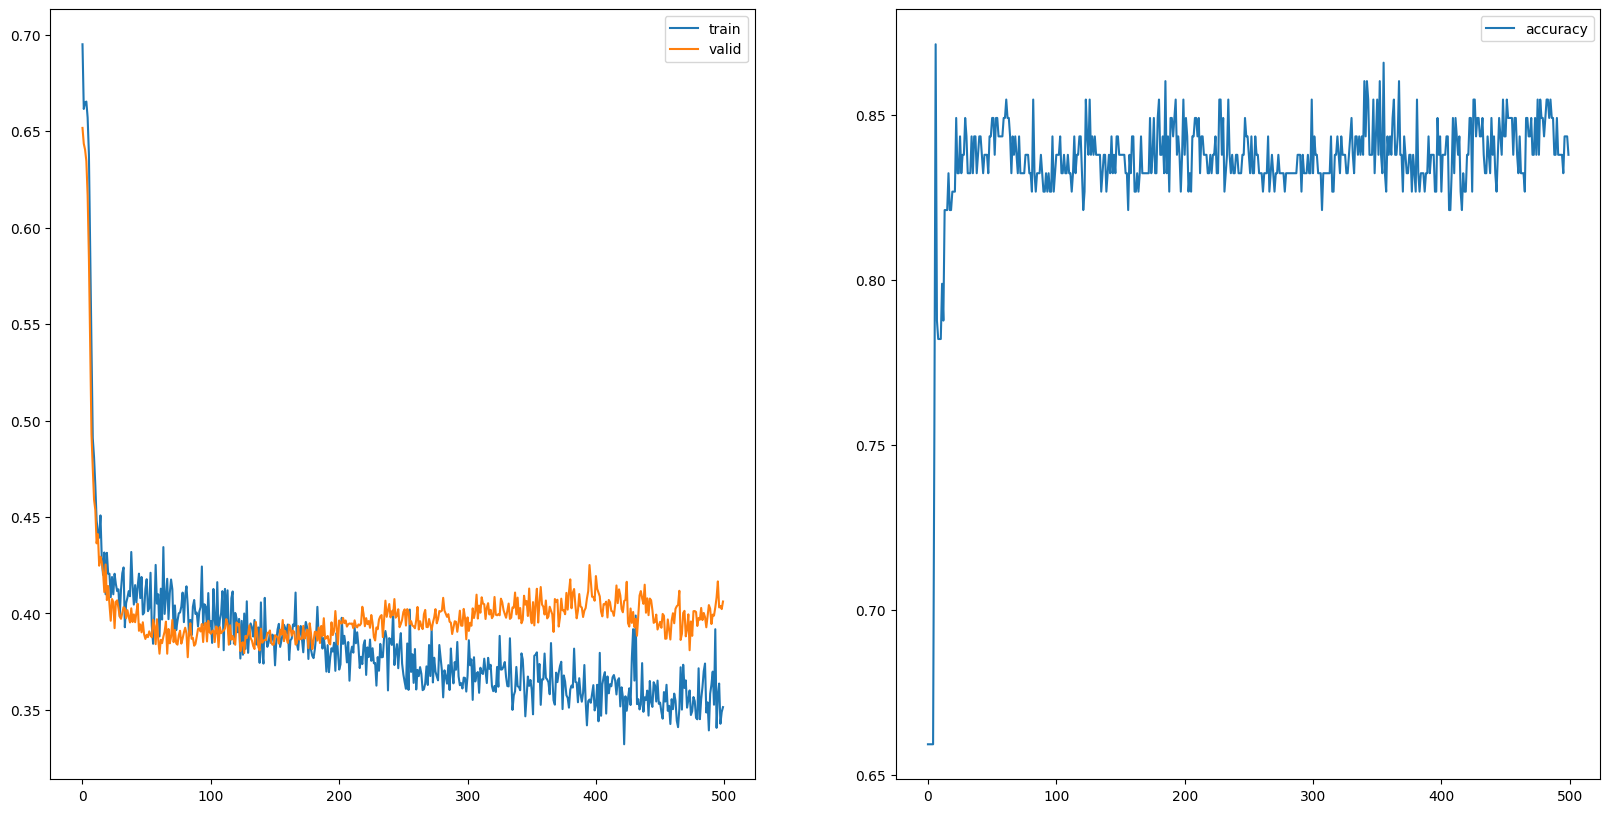

In [25]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(d_train_hist,label='train')
a[0].plot(d_valid_hist,label='valid')
a[0].legend()
a[1].plot(d_acc,label='accuracy')
a[1].legend()


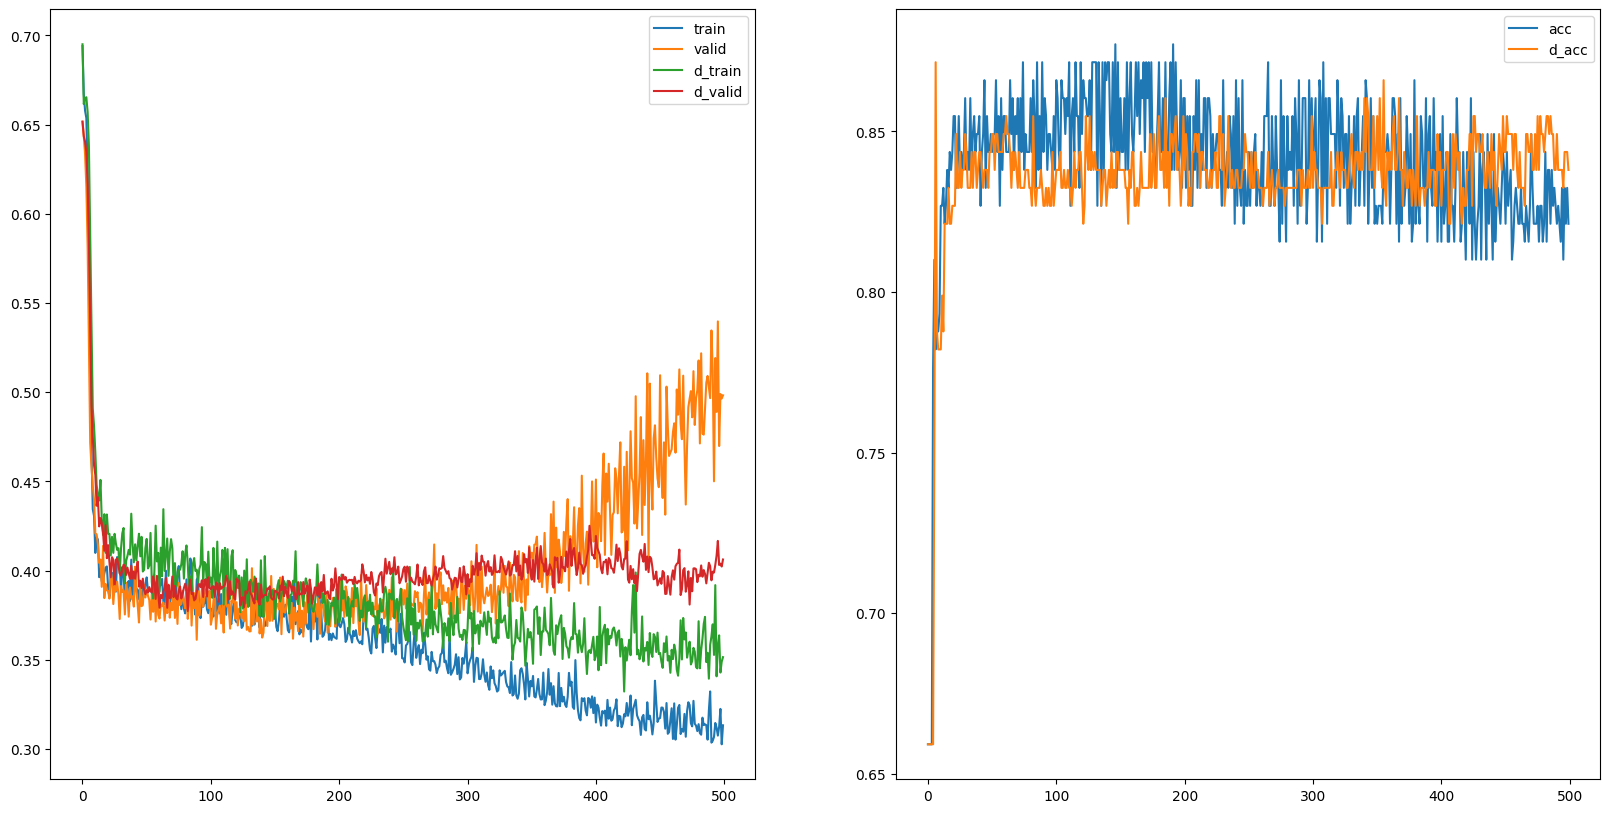

In [30]:
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(train_hist,label='train')
a[0].plot(valid_hist,label='valid')
a[0].plot(d_train_hist,label='d_train')
a[0].plot(d_valid_hist,label='d_valid')
a[1].plot(acc,label = 'acc')
a[1].plot(d_acc,label = 'd_acc')

a[0].legend()
a[1].legend()
plt.show() 

# Weight decay

In [42]:
model = NN()
loss_fn = nn.BCELoss()
d_optimizer = torch.optim.Adam(model.parameters(),lr = 0.001, weight_decay=0.0001)
decay_train_hist = []
decay_valid_hist = []
decay_acc = []

In [43]:
epochs = 500
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loof(model,loss_fn,d_optimizer,train_dataloader)
    decay_train_hist.append(train_loss)
    valid_loss, accuracy = valid_loof(model,loss_fn,valid_dataloader)
    print(f'valid Loss : {valid_loss:.4f},Accuracy L {accuracy:.4f}')
    decay_valid_hist.append(valid_loss)
    decay_acc.append(accuracy)

Epoch 1
-------------------------------


Loss: 0.7212995886802673: 100%|██████████| 23/23 [00:00<00:00, 267.67it/s]


valid Loss : 0.6451,Accuracy L 0.6592
Epoch 2
-------------------------------


Loss: 0.657368540763855: 100%|██████████| 23/23 [00:00<00:00, 281.41it/s]


valid Loss : 0.6418,Accuracy L 0.6592
Epoch 3
-------------------------------


Loss: 0.7391515970230103: 100%|██████████| 23/23 [00:00<00:00, 241.82it/s]


valid Loss : 0.6218,Accuracy L 0.6592
Epoch 4
-------------------------------


Loss: 0.6098909378051758: 100%|██████████| 23/23 [00:00<00:00, 289.35it/s]


valid Loss : 0.5735,Accuracy L 0.7933
Epoch 5
-------------------------------


Loss: 0.5378564596176147: 100%|██████████| 23/23 [00:00<00:00, 276.90it/s]


valid Loss : 0.5093,Accuracy L 0.7821
Epoch 6
-------------------------------


Loss: 0.32303547859191895: 100%|██████████| 23/23 [00:00<00:00, 267.41it/s]


valid Loss : 0.4639,Accuracy L 0.7821
Epoch 7
-------------------------------


Loss: 0.6395177841186523: 100%|██████████| 23/23 [00:00<00:00, 223.07it/s]


valid Loss : 0.4476,Accuracy L 0.7821
Epoch 8
-------------------------------


Loss: 0.503433883190155: 100%|██████████| 23/23 [00:00<00:00, 293.93it/s]


valid Loss : 0.4415,Accuracy L 0.7821
Epoch 9
-------------------------------


Loss: 0.27332958579063416: 100%|██████████| 23/23 [00:00<00:00, 334.80it/s]


valid Loss : 0.4273,Accuracy L 0.8212
Epoch 10
-------------------------------


Loss: 0.41892150044441223: 100%|██████████| 23/23 [00:00<00:00, 301.95it/s]


valid Loss : 0.4321,Accuracy L 0.8101
Epoch 11
-------------------------------


Loss: 0.8371350169181824: 100%|██████████| 23/23 [00:00<00:00, 237.23it/s]


valid Loss : 0.4127,Accuracy L 0.8268
Epoch 12
-------------------------------


Loss: 0.8320542573928833: 100%|██████████| 23/23 [00:00<00:00, 337.69it/s]


valid Loss : 0.4446,Accuracy L 0.8045
Epoch 13
-------------------------------


Loss: 0.5259659886360168: 100%|██████████| 23/23 [00:00<00:00, 344.59it/s]


valid Loss : 0.4051,Accuracy L 0.8212
Epoch 14
-------------------------------


Loss: 0.4372318983078003: 100%|██████████| 23/23 [00:00<00:00, 330.22it/s]


valid Loss : 0.4101,Accuracy L 0.8212
Epoch 15
-------------------------------


Loss: 0.45087888836860657: 100%|██████████| 23/23 [00:00<00:00, 239.58it/s]


valid Loss : 0.4138,Accuracy L 0.8268
Epoch 16
-------------------------------


Loss: 0.22101424634456635: 100%|██████████| 23/23 [00:00<00:00, 278.98it/s]


valid Loss : 0.4209,Accuracy L 0.8268
Epoch 17
-------------------------------


Loss: 0.6734492778778076: 100%|██████████| 23/23 [00:00<00:00, 264.48it/s]


valid Loss : 0.3986,Accuracy L 0.8324
Epoch 18
-------------------------------


Loss: 0.37947025895118713: 100%|██████████| 23/23 [00:00<00:00, 279.55it/s]


valid Loss : 0.3975,Accuracy L 0.8436
Epoch 19
-------------------------------


Loss: 0.18510687351226807: 100%|██████████| 23/23 [00:00<00:00, 251.28it/s]


valid Loss : 0.4155,Accuracy L 0.8268
Epoch 20
-------------------------------


Loss: 0.5001593828201294: 100%|██████████| 23/23 [00:00<00:00, 362.79it/s]


valid Loss : 0.3999,Accuracy L 0.8268
Epoch 21
-------------------------------


Loss: 0.38908651471138: 100%|██████████| 23/23 [00:00<00:00, 334.71it/s]


valid Loss : 0.4063,Accuracy L 0.8324
Epoch 22
-------------------------------


Loss: 0.8207883834838867: 100%|██████████| 23/23 [00:00<00:00, 278.83it/s]


valid Loss : 0.3959,Accuracy L 0.8436
Epoch 23
-------------------------------


Loss: 0.9598238468170166: 100%|██████████| 23/23 [00:00<00:00, 279.41it/s]


valid Loss : 0.3996,Accuracy L 0.8268
Epoch 24
-------------------------------


Loss: 0.1829453706741333: 100%|██████████| 23/23 [00:00<00:00, 341.13it/s]


valid Loss : 0.4023,Accuracy L 0.8324
Epoch 25
-------------------------------


Loss: 0.410776823759079: 100%|██████████| 23/23 [00:00<00:00, 332.76it/s]


valid Loss : 0.3888,Accuracy L 0.8436
Epoch 26
-------------------------------


Loss: 0.3399825692176819: 100%|██████████| 23/23 [00:00<00:00, 284.25it/s]


valid Loss : 0.3967,Accuracy L 0.8324
Epoch 27
-------------------------------


Loss: 0.37417474389076233: 100%|██████████| 23/23 [00:00<00:00, 254.14it/s]


valid Loss : 0.4041,Accuracy L 0.8268
Epoch 28
-------------------------------


Loss: 0.35262182354927063: 100%|██████████| 23/23 [00:00<00:00, 306.32it/s]


valid Loss : 0.3995,Accuracy L 0.8268
Epoch 29
-------------------------------


Loss: 0.20121072232723236: 100%|██████████| 23/23 [00:00<00:00, 343.19it/s]


valid Loss : 0.3841,Accuracy L 0.8380
Epoch 30
-------------------------------


Loss: 0.4786064326763153: 100%|██████████| 23/23 [00:00<00:00, 267.41it/s]


valid Loss : 0.3913,Accuracy L 0.8380
Epoch 31
-------------------------------


Loss: 0.38105642795562744: 100%|██████████| 23/23 [00:00<00:00, 340.21it/s]


valid Loss : 0.3945,Accuracy L 0.8324
Epoch 32
-------------------------------


Loss: 0.6336110234260559: 100%|██████████| 23/23 [00:00<00:00, 328.52it/s]


valid Loss : 0.3946,Accuracy L 0.8324
Epoch 33
-------------------------------


Loss: 0.46110638976097107: 100%|██████████| 23/23 [00:00<00:00, 287.36it/s]


valid Loss : 0.3843,Accuracy L 0.8492
Epoch 34
-------------------------------


Loss: 0.536994457244873: 100%|██████████| 23/23 [00:00<00:00, 229.48it/s]  


valid Loss : 0.3905,Accuracy L 0.8380
Epoch 35
-------------------------------


Loss: 0.7576683759689331: 100%|██████████| 23/23 [00:00<00:00, 345.16it/s]


valid Loss : 0.4017,Accuracy L 0.8268
Epoch 36
-------------------------------


Loss: 0.18775063753128052: 100%|██████████| 23/23 [00:00<00:00, 293.83it/s]


valid Loss : 0.3892,Accuracy L 0.8324
Epoch 37
-------------------------------


Loss: 0.4310358464717865: 100%|██████████| 23/23 [00:00<00:00, 343.17it/s]


valid Loss : 0.3878,Accuracy L 0.8324
Epoch 38
-------------------------------


Loss: 0.32214218378067017: 100%|██████████| 23/23 [00:00<00:00, 266.29it/s]


valid Loss : 0.4055,Accuracy L 0.8268
Epoch 39
-------------------------------


Loss: 0.5916173458099365: 100%|██████████| 23/23 [00:00<00:00, 296.98it/s]


valid Loss : 0.3783,Accuracy L 0.8603
Epoch 40
-------------------------------


Loss: 0.4066838026046753: 100%|██████████| 23/23 [00:00<00:00, 278.06it/s]


valid Loss : 0.4051,Accuracy L 0.8268
Epoch 41
-------------------------------


Loss: 0.14756585657596588: 100%|██████████| 23/23 [00:00<00:00, 352.87it/s]


valid Loss : 0.3852,Accuracy L 0.8436
Epoch 42
-------------------------------


Loss: 0.1241169422864914: 100%|██████████| 23/23 [00:00<00:00, 274.18it/s]


valid Loss : 0.3884,Accuracy L 0.8436
Epoch 43
-------------------------------


Loss: 0.5710463523864746: 100%|██████████| 23/23 [00:00<00:00, 339.93it/s]


valid Loss : 0.3716,Accuracy L 0.8659
Epoch 44
-------------------------------


Loss: 0.5217102766036987: 100%|██████████| 23/23 [00:00<00:00, 338.76it/s]


valid Loss : 0.4163,Accuracy L 0.8156
Epoch 45
-------------------------------


Loss: 0.25352320075035095: 100%|██████████| 23/23 [00:00<00:00, 312.76it/s]


valid Loss : 0.3658,Accuracy L 0.8603
Epoch 46
-------------------------------


Loss: 0.678737461566925: 100%|██████████| 23/23 [00:00<00:00, 227.78it/s]


valid Loss : 0.3930,Accuracy L 0.8324
Epoch 47
-------------------------------


Loss: 0.8364611864089966: 100%|██████████| 23/23 [00:00<00:00, 347.16it/s]


valid Loss : 0.3865,Accuracy L 0.8324
Epoch 48
-------------------------------


Loss: 1.0106412172317505: 100%|██████████| 23/23 [00:00<00:00, 345.22it/s]


valid Loss : 0.3941,Accuracy L 0.8324
Epoch 49
-------------------------------


Loss: 0.3689269423484802: 100%|██████████| 23/23 [00:00<00:00, 230.10it/s]


valid Loss : 0.3881,Accuracy L 0.8324
Epoch 50
-------------------------------


Loss: 0.5618225932121277: 100%|██████████| 23/23 [00:00<00:00, 338.17it/s]


valid Loss : 0.3846,Accuracy L 0.8492
Epoch 51
-------------------------------


Loss: 0.6232468485832214: 100%|██████████| 23/23 [00:00<00:00, 345.75it/s]


valid Loss : 0.3830,Accuracy L 0.8436
Epoch 52
-------------------------------


Loss: 0.4642079770565033: 100%|██████████| 23/23 [00:00<00:00, 322.39it/s]


valid Loss : 0.3892,Accuracy L 0.8492
Epoch 53
-------------------------------


Loss: 0.5828233361244202: 100%|██████████| 23/23 [00:00<00:00, 270.59it/s]


valid Loss : 0.3763,Accuracy L 0.8659
Epoch 54
-------------------------------


Loss: 0.17921733856201172: 100%|██████████| 23/23 [00:00<00:00, 332.65it/s]


valid Loss : 0.3907,Accuracy L 0.8324
Epoch 55
-------------------------------


Loss: 0.5531179904937744: 100%|██████████| 23/23 [00:00<00:00, 263.92it/s]


valid Loss : 0.3819,Accuracy L 0.8436
Epoch 56
-------------------------------


Loss: 0.3794155716896057: 100%|██████████| 23/23 [00:00<00:00, 207.54it/s] 


valid Loss : 0.3867,Accuracy L 0.8436
Epoch 57
-------------------------------


Loss: 0.6040233373641968: 100%|██████████| 23/23 [00:00<00:00, 272.61it/s]


valid Loss : 0.3884,Accuracy L 0.8436
Epoch 58
-------------------------------


Loss: 0.4662257730960846: 100%|██████████| 23/23 [00:00<00:00, 294.73it/s]


valid Loss : 0.3953,Accuracy L 0.8212
Epoch 59
-------------------------------


Loss: 0.28838467597961426: 100%|██████████| 23/23 [00:00<00:00, 290.54it/s]


valid Loss : 0.3789,Accuracy L 0.8547
Epoch 60
-------------------------------


Loss: 0.12964311242103577: 100%|██████████| 23/23 [00:00<00:00, 268.01it/s]


valid Loss : 0.3904,Accuracy L 0.8324
Epoch 61
-------------------------------


Loss: 0.38923585414886475: 100%|██████████| 23/23 [00:00<00:00, 283.03it/s]


valid Loss : 0.3736,Accuracy L 0.8603
Epoch 62
-------------------------------


Loss: 0.4387718737125397: 100%|██████████| 23/23 [00:00<00:00, 339.97it/s]


valid Loss : 0.3796,Accuracy L 0.8492
Epoch 63
-------------------------------


Loss: 0.17059865593910217: 100%|██████████| 23/23 [00:00<00:00, 342.99it/s]


valid Loss : 0.3865,Accuracy L 0.8436
Epoch 64
-------------------------------


Loss: 0.22515152394771576: 100%|██████████| 23/23 [00:00<00:00, 266.61it/s]


valid Loss : 0.3952,Accuracy L 0.8324
Epoch 65
-------------------------------


Loss: 0.6535873413085938: 100%|██████████| 23/23 [00:00<00:00, 277.07it/s]


valid Loss : 0.3804,Accuracy L 0.8547
Epoch 66
-------------------------------


Loss: 0.7156121134757996: 100%|██████████| 23/23 [00:00<00:00, 287.23it/s]


valid Loss : 0.3862,Accuracy L 0.8436
Epoch 67
-------------------------------


Loss: 0.39644402265548706: 100%|██████████| 23/23 [00:00<00:00, 230.49it/s]


valid Loss : 0.3789,Accuracy L 0.8547
Epoch 68
-------------------------------


Loss: 0.4502052664756775: 100%|██████████| 23/23 [00:00<00:00, 344.32it/s]


valid Loss : 0.3916,Accuracy L 0.8324
Epoch 69
-------------------------------


Loss: 0.4503242075443268: 100%|██████████| 23/23 [00:00<00:00, 324.59it/s]


valid Loss : 0.3962,Accuracy L 0.8268
Epoch 70
-------------------------------


Loss: 0.5195013284683228: 100%|██████████| 23/23 [00:00<00:00, 324.30it/s]


valid Loss : 0.4037,Accuracy L 0.8268
Epoch 71
-------------------------------


Loss: 0.44295647740364075: 100%|██████████| 23/23 [00:00<00:00, 278.59it/s]


valid Loss : 0.3682,Accuracy L 0.8659
Epoch 72
-------------------------------


Loss: 0.4763343930244446: 100%|██████████| 23/23 [00:00<00:00, 330.46it/s]


valid Loss : 0.3887,Accuracy L 0.8324
Epoch 73
-------------------------------


Loss: 0.7143853902816772: 100%|██████████| 23/23 [00:00<00:00, 338.93it/s]


valid Loss : 0.3790,Accuracy L 0.8436
Epoch 74
-------------------------------


Loss: 0.6767128109931946: 100%|██████████| 23/23 [00:00<00:00, 318.05it/s]


valid Loss : 0.3887,Accuracy L 0.8380
Epoch 75
-------------------------------


Loss: 0.5392923951148987: 100%|██████████| 23/23 [00:00<00:00, 295.21it/s]


valid Loss : 0.3785,Accuracy L 0.8492
Epoch 76
-------------------------------


Loss: 0.1386815458536148: 100%|██████████| 23/23 [00:00<00:00, 310.70it/s]


valid Loss : 0.3911,Accuracy L 0.8324
Epoch 77
-------------------------------


Loss: 0.38806670904159546: 100%|██████████| 23/23 [00:00<00:00, 325.53it/s]


valid Loss : 0.3755,Accuracy L 0.8547
Epoch 78
-------------------------------


Loss: 0.11197154223918915: 100%|██████████| 23/23 [00:00<00:00, 343.31it/s]


valid Loss : 0.3878,Accuracy L 0.8380
Epoch 79
-------------------------------


Loss: 0.20466876029968262: 100%|██████████| 23/23 [00:00<00:00, 320.19it/s]


valid Loss : 0.3721,Accuracy L 0.8603
Epoch 80
-------------------------------


Loss: 0.8446617722511292: 100%|██████████| 23/23 [00:00<00:00, 302.26it/s]


valid Loss : 0.4114,Accuracy L 0.8268
Epoch 81
-------------------------------


Loss: 0.4617551565170288: 100%|██████████| 23/23 [00:00<00:00, 349.87it/s]


valid Loss : 0.3669,Accuracy L 0.8603
Epoch 82
-------------------------------


Loss: 0.2567487061023712: 100%|██████████| 23/23 [00:00<00:00, 331.61it/s]


valid Loss : 0.3917,Accuracy L 0.8380
Epoch 83
-------------------------------


Loss: 0.29097288846969604: 100%|██████████| 23/23 [00:00<00:00, 229.49it/s]


valid Loss : 0.3813,Accuracy L 0.8492
Epoch 84
-------------------------------


Loss: 0.5354567766189575: 100%|██████████| 23/23 [00:00<00:00, 400.64it/s]


valid Loss : 0.4003,Accuracy L 0.8268
Epoch 85
-------------------------------


Loss: 0.37980154156684875: 100%|██████████| 23/23 [00:00<00:00, 311.25it/s]


valid Loss : 0.3734,Accuracy L 0.8603
Epoch 86
-------------------------------


Loss: 0.10533830523490906: 100%|██████████| 23/23 [00:00<00:00, 253.43it/s]


valid Loss : 0.3956,Accuracy L 0.8380
Epoch 87
-------------------------------


Loss: 0.6731275320053101: 100%|██████████| 23/23 [00:00<00:00, 336.09it/s]


valid Loss : 0.3692,Accuracy L 0.8715
Epoch 88
-------------------------------


Loss: 0.2674357295036316: 100%|██████████| 23/23 [00:00<00:00, 346.00it/s]


valid Loss : 0.3988,Accuracy L 0.8380
Epoch 89
-------------------------------


Loss: 0.13889437913894653: 100%|██████████| 23/23 [00:00<00:00, 329.46it/s]


valid Loss : 0.3870,Accuracy L 0.8380
Epoch 90
-------------------------------


Loss: 0.08177967369556427: 100%|██████████| 23/23 [00:00<00:00, 243.76it/s]


valid Loss : 0.3794,Accuracy L 0.8492
Epoch 91
-------------------------------


Loss: 0.19412128627300262: 100%|██████████| 23/23 [00:00<00:00, 328.40it/s]


valid Loss : 0.3804,Accuracy L 0.8436
Epoch 92
-------------------------------


Loss: 0.44494035840034485: 100%|██████████| 23/23 [00:00<00:00, 332.16it/s]


valid Loss : 0.3870,Accuracy L 0.8492
Epoch 93
-------------------------------


Loss: 0.38966360688209534: 100%|██████████| 23/23 [00:00<00:00, 325.24it/s]


valid Loss : 0.3935,Accuracy L 0.8380
Epoch 94
-------------------------------


Loss: 0.10666107386350632: 100%|██████████| 23/23 [00:00<00:00, 230.07it/s]


valid Loss : 0.3715,Accuracy L 0.8547
Epoch 95
-------------------------------


Loss: 0.6076396107673645: 100%|██████████| 23/23 [00:00<00:00, 279.47it/s]


valid Loss : 0.4048,Accuracy L 0.8324
Epoch 96
-------------------------------


Loss: 0.16994288563728333: 100%|██████████| 23/23 [00:00<00:00, 287.70it/s]


valid Loss : 0.3773,Accuracy L 0.8547
Epoch 97
-------------------------------


Loss: 0.8390823006629944: 100%|██████████| 23/23 [00:00<00:00, 226.72it/s]


valid Loss : 0.4173,Accuracy L 0.8268
Epoch 98
-------------------------------


Loss: 0.3290822505950928: 100%|██████████| 23/23 [00:00<00:00, 337.94it/s]


valid Loss : 0.3738,Accuracy L 0.8547
Epoch 99
-------------------------------


Loss: 0.39799362421035767: 100%|██████████| 23/23 [00:00<00:00, 269.52it/s]


valid Loss : 0.3829,Accuracy L 0.8492
Epoch 100
-------------------------------


Loss: 0.6001290082931519: 100%|██████████| 23/23 [00:00<00:00, 333.72it/s]


valid Loss : 0.4163,Accuracy L 0.8324
Epoch 101
-------------------------------


Loss: 0.5609711408615112: 100%|██████████| 23/23 [00:00<00:00, 245.57it/s]


valid Loss : 0.3858,Accuracy L 0.8547
Epoch 102
-------------------------------


Loss: 0.4042210876941681: 100%|██████████| 23/23 [00:00<00:00, 299.33it/s]


valid Loss : 0.3855,Accuracy L 0.8436
Epoch 103
-------------------------------


Loss: 0.414705753326416: 100%|██████████| 23/23 [00:00<00:00, 268.07it/s]


valid Loss : 0.3810,Accuracy L 0.8547
Epoch 104
-------------------------------


Loss: 0.30840179324150085: 100%|██████████| 23/23 [00:00<00:00, 241.14it/s]


valid Loss : 0.3886,Accuracy L 0.8436
Epoch 105
-------------------------------


Loss: 0.18902739882469177: 100%|██████████| 23/23 [00:00<00:00, 279.04it/s]


valid Loss : 0.3956,Accuracy L 0.8380
Epoch 106
-------------------------------


Loss: 0.1416487693786621: 100%|██████████| 23/23 [00:00<00:00, 314.19it/s]


valid Loss : 0.3683,Accuracy L 0.8715
Epoch 107
-------------------------------


Loss: 0.09300965070724487: 100%|██████████| 23/23 [00:00<00:00, 300.64it/s]


valid Loss : 0.4101,Accuracy L 0.8268
Epoch 108
-------------------------------


Loss: 0.7585513591766357: 100%|██████████| 23/23 [00:00<00:00, 204.96it/s] 


valid Loss : 0.3718,Accuracy L 0.8603
Epoch 109
-------------------------------


Loss: 0.8263549208641052: 100%|██████████| 23/23 [00:00<00:00, 270.33it/s]


valid Loss : 0.3795,Accuracy L 0.8547
Epoch 110
-------------------------------


Loss: 0.4633657932281494: 100%|██████████| 23/23 [00:00<00:00, 272.61it/s]


valid Loss : 0.3793,Accuracy L 0.8547
Epoch 111
-------------------------------


Loss: 0.10277196019887924: 100%|██████████| 23/23 [00:00<00:00, 270.78it/s]


valid Loss : 0.3762,Accuracy L 0.8603
Epoch 112
-------------------------------


Loss: 0.5508612394332886: 100%|██████████| 23/23 [00:00<00:00, 262.87it/s]


valid Loss : 0.3926,Accuracy L 0.8324
Epoch 113
-------------------------------


Loss: 0.44800546765327454: 100%|██████████| 23/23 [00:00<00:00, 315.02it/s]


valid Loss : 0.3741,Accuracy L 0.8603
Epoch 114
-------------------------------


Loss: 0.5194010138511658: 100%|██████████| 23/23 [00:00<00:00, 279.49it/s]


valid Loss : 0.4041,Accuracy L 0.8268
Epoch 115
-------------------------------


Loss: 0.25336143374443054: 100%|██████████| 23/23 [00:00<00:00, 241.66it/s]


valid Loss : 0.3803,Accuracy L 0.8492
Epoch 116
-------------------------------


Loss: 0.10056880116462708: 100%|██████████| 23/23 [00:00<00:00, 291.69it/s]


valid Loss : 0.3859,Accuracy L 0.8436
Epoch 117
-------------------------------


Loss: 0.6221179962158203: 100%|██████████| 23/23 [00:00<00:00, 287.97it/s]


valid Loss : 0.3776,Accuracy L 0.8547
Epoch 118
-------------------------------


Loss: 0.6821910738945007: 100%|██████████| 23/23 [00:00<00:00, 209.79it/s] 


valid Loss : 0.3749,Accuracy L 0.8603
Epoch 119
-------------------------------


Loss: 0.11329668760299683: 100%|██████████| 23/23 [00:00<00:00, 288.03it/s]


valid Loss : 0.3762,Accuracy L 0.8603
Epoch 120
-------------------------------


Loss: 0.13105812668800354: 100%|██████████| 23/23 [00:00<00:00, 276.54it/s]


valid Loss : 0.3908,Accuracy L 0.8380
Epoch 121
-------------------------------


Loss: 0.4311670660972595: 100%|██████████| 23/23 [00:00<00:00, 304.78it/s]


valid Loss : 0.3804,Accuracy L 0.8547
Epoch 122
-------------------------------


Loss: 0.7806607484817505: 100%|██████████| 23/23 [00:00<00:00, 257.07it/s]


valid Loss : 0.3659,Accuracy L 0.8659
Epoch 123
-------------------------------


Loss: 0.4142884910106659: 100%|██████████| 23/23 [00:00<00:00, 338.23it/s]


valid Loss : 0.3881,Accuracy L 0.8380
Epoch 124
-------------------------------


Loss: 0.3336608111858368: 100%|██████████| 23/23 [00:00<00:00, 282.18it/s]


valid Loss : 0.3846,Accuracy L 0.8380
Epoch 125
-------------------------------


Loss: 0.0937463641166687: 100%|██████████| 23/23 [00:00<00:00, 216.86it/s]


valid Loss : 0.3777,Accuracy L 0.8547
Epoch 126
-------------------------------


Loss: 0.40673699975013733: 100%|██████████| 23/23 [00:00<00:00, 285.76it/s]


valid Loss : 0.3830,Accuracy L 0.8436
Epoch 127
-------------------------------


Loss: 0.6683188080787659: 100%|██████████| 23/23 [00:00<00:00, 314.27it/s]

valid Loss : 0.3871,Accuracy L 0.8492


Epoch 128
-------------------------------


Loss: 0.2240571826696396: 100%|██████████| 23/23 [00:00<00:00, 290.41it/s]


valid Loss : 0.3792,Accuracy L 0.8547
Epoch 129
-------------------------------


Loss: 0.3223189115524292: 100%|██████████| 23/23 [00:00<00:00, 256.05it/s]


valid Loss : 0.3705,Accuracy L 0.8659
Epoch 130
-------------------------------


Loss: 0.6712554693222046: 100%|██████████| 23/23 [00:00<00:00, 259.61it/s]


valid Loss : 0.4053,Accuracy L 0.8268
Epoch 131
-------------------------------


Loss: 0.5125882625579834: 100%|██████████| 23/23 [00:00<00:00, 235.14it/s]


valid Loss : 0.3692,Accuracy L 0.8715
Epoch 132
-------------------------------


Loss: 0.17299582064151764: 100%|██████████| 23/23 [00:00<00:00, 263.37it/s]


valid Loss : 0.3786,Accuracy L 0.8547
Epoch 133
-------------------------------


Loss: 0.6713575124740601: 100%|██████████| 23/23 [00:00<00:00, 233.32it/s]


valid Loss : 0.3725,Accuracy L 0.8603
Epoch 134
-------------------------------


Loss: 0.1263541281223297: 100%|██████████| 23/23 [00:00<00:00, 292.73it/s]


valid Loss : 0.3783,Accuracy L 0.8547
Epoch 135
-------------------------------


Loss: 0.3277723491191864: 100%|██████████| 23/23 [00:00<00:00, 294.00it/s]


valid Loss : 0.3859,Accuracy L 0.8436
Epoch 136
-------------------------------


Loss: 0.35646915435791016: 100%|██████████| 23/23 [00:00<00:00, 249.77it/s]


valid Loss : 0.3813,Accuracy L 0.8492
Epoch 137
-------------------------------


Loss: 0.2924024760723114: 100%|██████████| 23/23 [00:00<00:00, 283.83it/s]


valid Loss : 0.3717,Accuracy L 0.8659
Epoch 138
-------------------------------


Loss: 0.18078185617923737: 100%|██████████| 23/23 [00:00<00:00, 330.02it/s]


valid Loss : 0.3725,Accuracy L 0.8659
Epoch 139
-------------------------------


Loss: 0.523615300655365: 100%|██████████| 23/23 [00:00<00:00, 327.64it/s]


valid Loss : 0.3897,Accuracy L 0.8436
Epoch 140
-------------------------------


Loss: 0.5510033369064331: 100%|██████████| 23/23 [00:00<00:00, 238.47it/s]


valid Loss : 0.3803,Accuracy L 0.8492
Epoch 141
-------------------------------


Loss: 0.6096347570419312: 100%|██████████| 23/23 [00:00<00:00, 293.06it/s]


valid Loss : 0.3755,Accuracy L 0.8603
Epoch 142
-------------------------------


Loss: 0.37268710136413574: 100%|██████████| 23/23 [00:00<00:00, 292.64it/s]


valid Loss : 0.3895,Accuracy L 0.8436
Epoch 143
-------------------------------


Loss: 0.1588704138994217: 100%|██████████| 23/23 [00:00<00:00, 280.52it/s]


valid Loss : 0.3701,Accuracy L 0.8715
Epoch 144
-------------------------------


Loss: 0.30930861830711365: 100%|██████████| 23/23 [00:00<00:00, 268.88it/s]


valid Loss : 0.4054,Accuracy L 0.8268
Epoch 145
-------------------------------


Loss: 0.5423780679702759: 100%|██████████| 23/23 [00:00<00:00, 329.50it/s]


valid Loss : 0.3682,Accuracy L 0.8715
Epoch 146
-------------------------------


Loss: 0.5688096284866333: 100%|██████████| 23/23 [00:00<00:00, 354.19it/s]


valid Loss : 0.3783,Accuracy L 0.8492
Epoch 147
-------------------------------


Loss: 0.6521161198616028: 100%|██████████| 23/23 [00:00<00:00, 226.75it/s]


valid Loss : 0.3926,Accuracy L 0.8324
Epoch 148
-------------------------------


Loss: 0.14834830164909363: 100%|██████████| 23/23 [00:00<00:00, 298.26it/s]


valid Loss : 0.3737,Accuracy L 0.8603
Epoch 149
-------------------------------


Loss: 0.5479592680931091: 100%|██████████| 23/23 [00:00<00:00, 334.43it/s]


valid Loss : 0.3923,Accuracy L 0.8324
Epoch 150
-------------------------------


Loss: 0.8297157883644104: 100%|██████████| 23/23 [00:00<00:00, 342.98it/s]


valid Loss : 0.3927,Accuracy L 0.8380
Epoch 151
-------------------------------


Loss: 0.3577374219894409: 100%|██████████| 23/23 [00:00<00:00, 299.01it/s]


valid Loss : 0.3631,Accuracy L 0.8715
Epoch 152
-------------------------------


Loss: 0.6828235387802124: 100%|██████████| 23/23 [00:00<00:00, 243.07it/s]


valid Loss : 0.3921,Accuracy L 0.8324
Epoch 153
-------------------------------


Loss: 0.48934319615364075: 100%|██████████| 23/23 [00:00<00:00, 347.08it/s]


valid Loss : 0.3647,Accuracy L 0.8715
Epoch 154
-------------------------------


Loss: 0.304275244474411: 100%|██████████| 23/23 [00:00<00:00, 293.37it/s]


valid Loss : 0.3840,Accuracy L 0.8436
Epoch 155
-------------------------------


Loss: 0.18376611173152924: 100%|██████████| 23/23 [00:00<00:00, 299.85it/s]


valid Loss : 0.3865,Accuracy L 0.8436
Epoch 156
-------------------------------


Loss: 0.3665742576122284: 100%|██████████| 23/23 [00:00<00:00, 301.13it/s]


valid Loss : 0.3850,Accuracy L 0.8380
Epoch 157
-------------------------------


Loss: 0.2757492959499359: 100%|██████████| 23/23 [00:00<00:00, 252.79it/s]


valid Loss : 0.3705,Accuracy L 0.8659
Epoch 158
-------------------------------


Loss: 0.1480790376663208: 100%|██████████| 23/23 [00:00<00:00, 327.88it/s]


valid Loss : 0.3697,Accuracy L 0.8715
Epoch 159
-------------------------------


Loss: 0.5211951732635498: 100%|██████████| 23/23 [00:00<00:00, 340.85it/s]


valid Loss : 0.3760,Accuracy L 0.8603
Epoch 160
-------------------------------


Loss: 0.8949318528175354: 100%|██████████| 23/23 [00:00<00:00, 332.18it/s]


valid Loss : 0.3843,Accuracy L 0.8492
Epoch 161
-------------------------------


Loss: 0.15468983352184296: 100%|██████████| 23/23 [00:00<00:00, 258.33it/s]


valid Loss : 0.3784,Accuracy L 0.8547
Epoch 162
-------------------------------


Loss: 0.39013054966926575: 100%|██████████| 23/23 [00:00<00:00, 262.57it/s]


valid Loss : 0.3734,Accuracy L 0.8659
Epoch 163
-------------------------------


Loss: 0.4161236882209778: 100%|██████████| 23/23 [00:00<00:00, 316.71it/s]


valid Loss : 0.3784,Accuracy L 0.8547
Epoch 164
-------------------------------


Loss: 0.7255405783653259: 100%|██████████| 23/23 [00:00<00:00, 314.17it/s]


valid Loss : 0.3768,Accuracy L 0.8492
Epoch 165
-------------------------------


Loss: 0.2367401272058487: 100%|██████████| 23/23 [00:00<00:00, 262.64it/s]


valid Loss : 0.3737,Accuracy L 0.8603
Epoch 166
-------------------------------


Loss: 0.5317712426185608: 100%|██████████| 23/23 [00:00<00:00, 322.62it/s]


valid Loss : 0.3763,Accuracy L 0.8603
Epoch 167
-------------------------------


Loss: 0.6007266640663147: 100%|██████████| 23/23 [00:00<00:00, 264.30it/s]


valid Loss : 0.3701,Accuracy L 0.8603
Epoch 168
-------------------------------


Loss: 0.42707931995391846: 100%|██████████| 23/23 [00:00<00:00, 232.18it/s]


valid Loss : 0.3916,Accuracy L 0.8324
Epoch 169
-------------------------------


Loss: 0.4445766806602478: 100%|██████████| 23/23 [00:00<00:00, 283.26it/s]


valid Loss : 0.3861,Accuracy L 0.8380
Epoch 170
-------------------------------


Loss: 0.5020751953125: 100%|██████████| 23/23 [00:00<00:00, 274.12it/s]


valid Loss : 0.3691,Accuracy L 0.8715
Epoch 171
-------------------------------


Loss: 0.3970812261104584: 100%|██████████| 23/23 [00:00<00:00, 224.73it/s] 


valid Loss : 0.3734,Accuracy L 0.8659
Epoch 172
-------------------------------


Loss: 0.2943077087402344: 100%|██████████| 23/23 [00:00<00:00, 324.00it/s]


valid Loss : 0.3819,Accuracy L 0.8436
Epoch 173
-------------------------------


Loss: 0.19359594583511353: 100%|██████████| 23/23 [00:00<00:00, 346.53it/s]


valid Loss : 0.3596,Accuracy L 0.8603
Epoch 174
-------------------------------


Loss: 0.7100110054016113: 100%|██████████| 23/23 [00:00<00:00, 317.74it/s]


valid Loss : 0.3976,Accuracy L 0.8324
Epoch 175
-------------------------------


Loss: 0.30542120337486267: 100%|██████████| 23/23 [00:00<00:00, 255.63it/s]


valid Loss : 0.3815,Accuracy L 0.8492
Epoch 176
-------------------------------


Loss: 0.13301588594913483: 100%|██████████| 23/23 [00:00<00:00, 346.23it/s]


valid Loss : 0.3729,Accuracy L 0.8659
Epoch 177
-------------------------------


Loss: 0.632956862449646: 100%|██████████| 23/23 [00:00<00:00, 308.64it/s]


valid Loss : 0.3693,Accuracy L 0.8659
Epoch 178
-------------------------------


Loss: 0.4077981114387512: 100%|██████████| 23/23 [00:00<00:00, 249.86it/s]


valid Loss : 0.3904,Accuracy L 0.8324
Epoch 179
-------------------------------


Loss: 0.18145403265953064: 100%|██████████| 23/23 [00:00<00:00, 263.40it/s]


valid Loss : 0.3757,Accuracy L 0.8603
Epoch 180
-------------------------------


Loss: 0.1779121458530426: 100%|██████████| 23/23 [00:00<00:00, 275.83it/s]


valid Loss : 0.3731,Accuracy L 0.8659
Epoch 181
-------------------------------


Loss: 0.3812010884284973: 100%|██████████| 23/23 [00:00<00:00, 260.11it/s]


valid Loss : 0.3697,Accuracy L 0.8659
Epoch 182
-------------------------------


Loss: 0.4883003830909729: 100%|██████████| 23/23 [00:00<00:00, 224.32it/s] 


valid Loss : 0.3817,Accuracy L 0.8492
Epoch 183
-------------------------------


Loss: 0.5436049699783325: 100%|██████████| 23/23 [00:00<00:00, 351.16it/s]


valid Loss : 0.3865,Accuracy L 0.8324
Epoch 184
-------------------------------


Loss: 0.4410663843154907: 100%|██████████| 23/23 [00:00<00:00, 363.09it/s]


valid Loss : 0.3687,Accuracy L 0.8715
Epoch 185
-------------------------------


Loss: 0.16407780349254608: 100%|██████████| 23/23 [00:00<00:00, 240.69it/s]


valid Loss : 0.3821,Accuracy L 0.8436
Epoch 186
-------------------------------


Loss: 0.4383116066455841: 100%|██████████| 23/23 [00:00<00:00, 297.77it/s]


valid Loss : 0.3734,Accuracy L 0.8659
Epoch 187
-------------------------------


Loss: 0.4142470955848694: 100%|██████████| 23/23 [00:00<00:00, 290.28it/s]


valid Loss : 0.3829,Accuracy L 0.8436
Epoch 188
-------------------------------


Loss: 0.2463347166776657: 100%|██████████| 23/23 [00:00<00:00, 273.32it/s]


valid Loss : 0.3835,Accuracy L 0.8436
Epoch 189
-------------------------------


Loss: 0.628178060054779: 100%|██████████| 23/23 [00:00<00:00, 245.18it/s]


valid Loss : 0.3663,Accuracy L 0.8715
Epoch 190
-------------------------------


Loss: 0.2716970443725586: 100%|██████████| 23/23 [00:00<00:00, 356.80it/s]


valid Loss : 0.3674,Accuracy L 0.8715
Epoch 191
-------------------------------


Loss: 0.4340907633304596: 100%|██████████| 23/23 [00:00<00:00, 323.42it/s]


valid Loss : 0.3739,Accuracy L 0.8659
Epoch 192
-------------------------------


Loss: 0.22150181233882904: 100%|██████████| 23/23 [00:00<00:00, 288.87it/s]


valid Loss : 0.3690,Accuracy L 0.8659
Epoch 193
-------------------------------


Loss: 0.2915442883968353: 100%|██████████| 23/23 [00:00<00:00, 232.16it/s]


valid Loss : 0.3907,Accuracy L 0.8324
Epoch 194
-------------------------------


Loss: 0.5762089490890503: 100%|██████████| 23/23 [00:00<00:00, 301.80it/s]


valid Loss : 0.3737,Accuracy L 0.8659
Epoch 195
-------------------------------


Loss: 0.39103907346725464: 100%|██████████| 23/23 [00:00<00:00, 346.18it/s]


valid Loss : 0.3796,Accuracy L 0.8547
Epoch 196
-------------------------------


Loss: 0.3221403956413269: 100%|██████████| 23/23 [00:00<00:00, 262.17it/s]


valid Loss : 0.3825,Accuracy L 0.8436
Epoch 197
-------------------------------


Loss: 0.603380024433136: 100%|██████████| 23/23 [00:00<00:00, 297.60it/s]


valid Loss : 0.3747,Accuracy L 0.8659
Epoch 198
-------------------------------


Loss: 0.3617955446243286: 100%|██████████| 23/23 [00:00<00:00, 349.13it/s]


valid Loss : 0.3679,Accuracy L 0.8715
Epoch 199
-------------------------------


Loss: 0.16636863350868225: 100%|██████████| 23/23 [00:00<00:00, 313.70it/s]


valid Loss : 0.3932,Accuracy L 0.8324
Epoch 200
-------------------------------


Loss: 0.5652109384536743: 100%|██████████| 23/23 [00:00<00:00, 205.25it/s] 


valid Loss : 0.3733,Accuracy L 0.8603
Epoch 201
-------------------------------


Loss: 0.5587967038154602: 100%|██████████| 23/23 [00:00<00:00, 307.34it/s]


valid Loss : 0.3670,Accuracy L 0.8715
Epoch 202
-------------------------------


Loss: 0.74370276927948: 100%|██████████| 23/23 [00:00<00:00, 329.51it/s]


valid Loss : 0.3779,Accuracy L 0.8547
Epoch 203
-------------------------------


Loss: 0.8972123861312866: 100%|██████████| 23/23 [00:00<00:00, 332.76it/s]


valid Loss : 0.3874,Accuracy L 0.8380
Epoch 204
-------------------------------


Loss: 0.9007329940795898: 100%|██████████| 23/23 [00:00<00:00, 237.07it/s]


valid Loss : 0.3945,Accuracy L 0.8268
Epoch 205
-------------------------------


Loss: 0.3247947096824646: 100%|██████████| 23/23 [00:00<00:00, 313.63it/s]


valid Loss : 0.3659,Accuracy L 0.8659
Epoch 206
-------------------------------


Loss: 0.2652258574962616: 100%|██████████| 23/23 [00:00<00:00, 302.16it/s]


valid Loss : 0.3873,Accuracy L 0.8324
Epoch 207
-------------------------------


Loss: 0.43976080417633057: 100%|██████████| 23/23 [00:00<00:00, 275.47it/s]


valid Loss : 0.3677,Accuracy L 0.8715
Epoch 208
-------------------------------


Loss: 0.22000806033611298: 100%|██████████| 23/23 [00:00<00:00, 201.60it/s]


valid Loss : 0.3792,Accuracy L 0.8492
Epoch 209
-------------------------------


Loss: 0.5853519439697266: 100%|██████████| 23/23 [00:00<00:00, 288.85it/s]


valid Loss : 0.3776,Accuracy L 0.8547
Epoch 210
-------------------------------


Loss: 0.4123542010784149: 100%|██████████| 23/23 [00:00<00:00, 291.42it/s]


valid Loss : 0.3698,Accuracy L 0.8715
Epoch 211
-------------------------------


Loss: 0.4121655821800232: 100%|██████████| 23/23 [00:00<00:00, 239.33it/s]


valid Loss : 0.3914,Accuracy L 0.8268
Epoch 212
-------------------------------


Loss: 0.3141063451766968: 100%|██████████| 23/23 [00:00<00:00, 314.26it/s]


valid Loss : 0.3540,Accuracy L 0.8715
Epoch 213
-------------------------------


Loss: 0.4424225687980652: 100%|██████████| 23/23 [00:00<00:00, 310.13it/s]


valid Loss : 0.3716,Accuracy L 0.8659
Epoch 214
-------------------------------


Loss: 0.20935317873954773: 100%|██████████| 23/23 [00:00<00:00, 300.35it/s]


valid Loss : 0.3689,Accuracy L 0.8715
Epoch 215
-------------------------------


Loss: 0.2226281762123108: 100%|██████████| 23/23 [00:00<00:00, 245.24it/s]


valid Loss : 0.3782,Accuracy L 0.8436
Epoch 216
-------------------------------


Loss: 0.13168321549892426: 100%|██████████| 23/23 [00:00<00:00, 294.23it/s]


valid Loss : 0.3941,Accuracy L 0.8268
Epoch 217
-------------------------------


Loss: 0.14418791234493256: 100%|██████████| 23/23 [00:00<00:00, 314.87it/s]


valid Loss : 0.3556,Accuracy L 0.8603
Epoch 218
-------------------------------


Loss: 0.7054327726364136: 100%|██████████| 23/23 [00:00<00:00, 304.53it/s]


valid Loss : 0.3881,Accuracy L 0.8324
Epoch 219
-------------------------------


Loss: 0.4501248002052307: 100%|██████████| 23/23 [00:00<00:00, 204.93it/s] 


valid Loss : 0.3738,Accuracy L 0.8603
Epoch 220
-------------------------------


Loss: 0.10259449481964111: 100%|██████████| 23/23 [00:00<00:00, 282.96it/s]


valid Loss : 0.3711,Accuracy L 0.8603
Epoch 221
-------------------------------


Loss: 0.4418044984340668: 100%|██████████| 23/23 [00:00<00:00, 274.02it/s]


valid Loss : 0.3905,Accuracy L 0.8268
Epoch 222
-------------------------------


Loss: 0.1082504540681839: 100%|██████████| 23/23 [00:00<00:00, 263.33it/s]


valid Loss : 0.3578,Accuracy L 0.8715
Epoch 223
-------------------------------


Loss: 0.5784485340118408: 100%|██████████| 23/23 [00:00<00:00, 224.86it/s] 


valid Loss : 0.3907,Accuracy L 0.8268
Epoch 224
-------------------------------


Loss: 0.24424956738948822: 100%|██████████| 23/23 [00:00<00:00, 325.76it/s]


valid Loss : 0.3802,Accuracy L 0.8492
Epoch 225
-------------------------------


Loss: 0.39098265767097473: 100%|██████████| 23/23 [00:00<00:00, 283.09it/s]


valid Loss : 0.3794,Accuracy L 0.8380
Epoch 226
-------------------------------


Loss: 0.23337006568908691: 100%|██████████| 23/23 [00:00<00:00, 257.58it/s]


valid Loss : 0.3689,Accuracy L 0.8715
Epoch 227
-------------------------------


Loss: 0.5424420237541199: 100%|██████████| 23/23 [00:00<00:00, 274.63it/s]


valid Loss : 0.3790,Accuracy L 0.8436
Epoch 228
-------------------------------


Loss: 0.5557787418365479: 100%|██████████| 23/23 [00:00<00:00, 231.27it/s]

valid Loss : 0.3581,Accuracy L 0.8659


Epoch 229
-------------------------------


Loss: 0.3310580849647522: 100%|██████████| 23/23 [00:00<00:00, 320.90it/s]


valid Loss : 0.3893,Accuracy L 0.8268
Epoch 230
-------------------------------


Loss: 0.10951519757509232: 100%|██████████| 23/23 [00:00<00:00, 392.89it/s]


valid Loss : 0.3602,Accuracy L 0.8715
Epoch 231
-------------------------------


Loss: 0.22131915390491486: 100%|██████████| 23/23 [00:00<00:00, 365.53it/s]


valid Loss : 0.3878,Accuracy L 0.8324
Epoch 232
-------------------------------


Loss: 0.13712257146835327: 100%|██████████| 23/23 [00:00<00:00, 333.89it/s]


valid Loss : 0.3662,Accuracy L 0.8659
Epoch 233
-------------------------------


Loss: 0.5316009521484375: 100%|██████████| 23/23 [00:00<00:00, 268.76it/s]


valid Loss : 0.3628,Accuracy L 0.8715
Epoch 234
-------------------------------


Loss: 0.6360344886779785: 100%|██████████| 23/23 [00:00<00:00, 331.91it/s]


valid Loss : 0.3718,Accuracy L 0.8547
Epoch 235
-------------------------------


Loss: 0.6117433905601501: 100%|██████████| 23/23 [00:00<00:00, 242.31it/s]


valid Loss : 0.3889,Accuracy L 0.8268
Epoch 236
-------------------------------


Loss: 0.2927936911582947: 100%|██████████| 23/23 [00:00<00:00, 295.64it/s]


valid Loss : 0.3581,Accuracy L 0.8659
Epoch 237
-------------------------------


Loss: 0.4651656448841095: 100%|██████████| 23/23 [00:00<00:00, 366.67it/s]


valid Loss : 0.3773,Accuracy L 0.8436
Epoch 238
-------------------------------


Loss: 0.21196018159389496: 100%|██████████| 23/23 [00:00<00:00, 392.57it/s]


valid Loss : 0.3747,Accuracy L 0.8603
Epoch 239
-------------------------------


Loss: 0.5440008044242859: 100%|██████████| 23/23 [00:00<00:00, 320.33it/s]


valid Loss : 0.3630,Accuracy L 0.8715
Epoch 240
-------------------------------


Loss: 0.729043185710907: 100%|██████████| 23/23 [00:00<00:00, 296.50it/s]


valid Loss : 0.3777,Accuracy L 0.8380
Epoch 241
-------------------------------


Loss: 0.7893843054771423: 100%|██████████| 23/23 [00:00<00:00, 336.21it/s]


valid Loss : 0.3685,Accuracy L 0.8715
Epoch 242
-------------------------------


Loss: 0.8031406402587891: 100%|██████████| 23/23 [00:00<00:00, 386.18it/s]


valid Loss : 0.3799,Accuracy L 0.8436
Epoch 243
-------------------------------


Loss: 0.2542692720890045: 100%|██████████| 23/23 [00:00<00:00, 330.76it/s]


valid Loss : 0.3879,Accuracy L 0.8268
Epoch 244
-------------------------------


Loss: 0.3991354703903198: 100%|██████████| 23/23 [00:00<00:00, 212.46it/s] 


valid Loss : 0.3704,Accuracy L 0.8603
Epoch 245
-------------------------------


Loss: 0.7512828707695007: 100%|██████████| 23/23 [00:00<00:00, 356.62it/s]


valid Loss : 0.3838,Accuracy L 0.8324
Epoch 246
-------------------------------


Loss: 0.12952564656734467: 100%|██████████| 23/23 [00:00<00:00, 337.91it/s]


valid Loss : 0.3656,Accuracy L 0.8715
Epoch 247
-------------------------------


Loss: 0.5399024486541748: 100%|██████████| 23/23 [00:00<00:00, 256.88it/s]


valid Loss : 0.3624,Accuracy L 0.8603
Epoch 248
-------------------------------


Loss: 1.0113720893859863: 100%|██████████| 23/23 [00:00<00:00, 246.35it/s]


valid Loss : 0.3815,Accuracy L 0.8324
Epoch 249
-------------------------------


Loss: 0.3903057277202606: 100%|██████████| 23/23 [00:00<00:00, 213.54it/s] 


valid Loss : 0.3641,Accuracy L 0.8715
Epoch 250
-------------------------------


Loss: 0.4390433728694916: 100%|██████████| 23/23 [00:00<00:00, 324.14it/s]


valid Loss : 0.3855,Accuracy L 0.8380
Epoch 251
-------------------------------


Loss: 0.3560039699077606: 100%|██████████| 23/23 [00:00<00:00, 360.15it/s]


valid Loss : 0.3615,Accuracy L 0.8603
Epoch 252
-------------------------------


Loss: 0.40791088342666626: 100%|██████████| 23/23 [00:00<00:00, 332.85it/s]


valid Loss : 0.3735,Accuracy L 0.8603
Epoch 253
-------------------------------


Loss: 0.09288366883993149: 100%|██████████| 23/23 [00:00<00:00, 291.51it/s]


valid Loss : 0.3563,Accuracy L 0.8715
Epoch 254
-------------------------------


Loss: 0.4657273292541504: 100%|██████████| 23/23 [00:00<00:00, 278.26it/s]


valid Loss : 0.4099,Accuracy L 0.8156
Epoch 255
-------------------------------


Loss: 0.46587276458740234: 100%|██████████| 23/23 [00:00<00:00, 292.62it/s]


valid Loss : 0.3723,Accuracy L 0.8715
Epoch 256
-------------------------------


Loss: 0.16412846744060516: 100%|██████████| 23/23 [00:00<00:00, 324.69it/s]


valid Loss : 0.3666,Accuracy L 0.8715
Epoch 257
-------------------------------


Loss: 0.2240879386663437: 100%|██████████| 23/23 [00:00<00:00, 313.51it/s]


valid Loss : 0.3630,Accuracy L 0.8715
Epoch 258
-------------------------------


Loss: 0.11456701159477234: 100%|██████████| 23/23 [00:00<00:00, 278.18it/s]


valid Loss : 0.3745,Accuracy L 0.8603
Epoch 259
-------------------------------


Loss: 0.42862141132354736: 100%|██████████| 23/23 [00:00<00:00, 307.65it/s]


valid Loss : 0.3901,Accuracy L 0.8268
Epoch 260
-------------------------------


Loss: 0.2325192391872406: 100%|██████████| 23/23 [00:00<00:00, 345.15it/s]


valid Loss : 0.3624,Accuracy L 0.8715
Epoch 261
-------------------------------


Loss: 0.34361475706100464: 100%|██████████| 23/23 [00:00<00:00, 340.05it/s]


valid Loss : 0.4077,Accuracy L 0.8212
Epoch 262
-------------------------------


Loss: 0.4288918972015381: 100%|██████████| 23/23 [00:00<00:00, 205.44it/s] 


valid Loss : 0.3848,Accuracy L 0.8380
Epoch 263
-------------------------------


Loss: 0.24978187680244446: 100%|██████████| 23/23 [00:00<00:00, 226.35it/s]


valid Loss : 0.3649,Accuracy L 0.8715
Epoch 264
-------------------------------


Loss: 0.12789395451545715: 100%|██████████| 23/23 [00:00<00:00, 272.53it/s]


valid Loss : 0.3634,Accuracy L 0.8659
Epoch 265
-------------------------------


Loss: 0.4520854949951172: 100%|██████████| 23/23 [00:00<00:00, 237.48it/s]


valid Loss : 0.3796,Accuracy L 0.8436
Epoch 266
-------------------------------


Loss: 0.19506904482841492: 100%|██████████| 23/23 [00:00<00:00, 237.58it/s]


valid Loss : 0.3755,Accuracy L 0.8547
Epoch 267
-------------------------------


Loss: 0.27673423290252686: 100%|██████████| 23/23 [00:00<00:00, 307.58it/s]


valid Loss : 0.3709,Accuracy L 0.8715
Epoch 268
-------------------------------


Loss: 0.10024409741163254: 100%|██████████| 23/23 [00:00<00:00, 377.12it/s]


valid Loss : 0.3788,Accuracy L 0.8492
Epoch 269
-------------------------------


Loss: 0.33595919609069824: 100%|██████████| 23/23 [00:00<00:00, 256.86it/s]


valid Loss : 0.3791,Accuracy L 0.8492
Epoch 270
-------------------------------


Loss: 0.12424677610397339: 100%|██████████| 23/23 [00:00<00:00, 331.66it/s]


valid Loss : 0.3911,Accuracy L 0.8324
Epoch 271
-------------------------------


Loss: 0.4370972216129303: 100%|██████████| 23/23 [00:00<00:00, 336.71it/s]


valid Loss : 0.3684,Accuracy L 0.8715
Epoch 272
-------------------------------


Loss: 0.20892685651779175: 100%|██████████| 23/23 [00:00<00:00, 302.85it/s]


valid Loss : 0.3999,Accuracy L 0.8212
Epoch 273
-------------------------------


Loss: 0.10821612179279327: 100%|██████████| 23/23 [00:00<00:00, 359.55it/s]


valid Loss : 0.3653,Accuracy L 0.8715
Epoch 274
-------------------------------


Loss: 0.3899921178817749: 100%|██████████| 23/23 [00:00<00:00, 367.31it/s]


valid Loss : 0.3769,Accuracy L 0.8492
Epoch 275
-------------------------------


Loss: 0.31490933895111084: 100%|██████████| 23/23 [00:00<00:00, 369.64it/s]


valid Loss : 0.3690,Accuracy L 0.8715
Epoch 276
-------------------------------


Loss: 0.507193386554718: 100%|██████████| 23/23 [00:00<00:00, 332.37it/s]


valid Loss : 0.3740,Accuracy L 0.8492
Epoch 277
-------------------------------


Loss: 0.3692020773887634: 100%|██████████| 23/23 [00:00<00:00, 212.13it/s]


valid Loss : 0.3706,Accuracy L 0.8603
Epoch 278
-------------------------------


Loss: 0.22819578647613525: 100%|██████████| 23/23 [00:00<00:00, 322.00it/s]


valid Loss : 0.4048,Accuracy L 0.8212
Epoch 279
-------------------------------


Loss: 0.3824710547924042: 100%|██████████| 23/23 [00:00<00:00, 321.22it/s]


valid Loss : 0.3616,Accuracy L 0.8715
Epoch 280
-------------------------------


Loss: 0.7101743817329407: 100%|██████████| 23/23 [00:00<00:00, 378.51it/s]


valid Loss : 0.3678,Accuracy L 0.8715
Epoch 281
-------------------------------


Loss: 0.4066182076931: 100%|██████████| 23/23 [00:00<00:00, 333.15it/s]


valid Loss : 0.3784,Accuracy L 0.8492
Epoch 282
-------------------------------


Loss: 0.11939027160406113: 100%|██████████| 23/23 [00:00<00:00, 216.02it/s]


valid Loss : 0.3655,Accuracy L 0.8715
Epoch 283
-------------------------------


Loss: 0.1288384348154068: 100%|██████████| 23/23 [00:00<00:00, 290.22it/s]


valid Loss : 0.3677,Accuracy L 0.8715
Epoch 284
-------------------------------


Loss: 0.4651009738445282: 100%|██████████| 23/23 [00:00<00:00, 328.93it/s]


valid Loss : 0.3877,Accuracy L 0.8380
Epoch 285
-------------------------------


Loss: 0.33490610122680664: 100%|██████████| 23/23 [00:00<00:00, 287.97it/s]


valid Loss : 0.3756,Accuracy L 0.8436
Epoch 286
-------------------------------


Loss: 0.2961297631263733: 100%|██████████| 23/23 [00:00<00:00, 240.99it/s]


valid Loss : 0.3728,Accuracy L 0.8547
Epoch 287
-------------------------------


Loss: 0.4818737506866455: 100%|██████████| 23/23 [00:00<00:00, 237.35it/s]


valid Loss : 0.3790,Accuracy L 0.8436
Epoch 288
-------------------------------


Loss: 0.38288503885269165: 100%|██████████| 23/23 [00:00<00:00, 274.53it/s]


valid Loss : 0.3593,Accuracy L 0.8771
Epoch 289
-------------------------------


Loss: 0.16411276161670685: 100%|██████████| 23/23 [00:00<00:00, 322.84it/s]


valid Loss : 0.4040,Accuracy L 0.8268
Epoch 290
-------------------------------


Loss: 0.0947428047657013: 100%|██████████| 23/23 [00:00<00:00, 346.17it/s]


valid Loss : 0.3851,Accuracy L 0.8380
Epoch 291
-------------------------------


Loss: 0.45651647448539734: 100%|██████████| 23/23 [00:00<00:00, 237.58it/s]


valid Loss : 0.3639,Accuracy L 0.8715
Epoch 292
-------------------------------


Loss: 0.550736665725708: 100%|██████████| 23/23 [00:00<00:00, 337.79it/s]


valid Loss : 0.3822,Accuracy L 0.8492
Epoch 293
-------------------------------


Loss: 0.21323741972446442: 100%|██████████| 23/23 [00:00<00:00, 336.33it/s]


valid Loss : 0.3857,Accuracy L 0.8268
Epoch 294
-------------------------------


Loss: 0.21746814250946045: 100%|██████████| 23/23 [00:00<00:00, 350.53it/s]


valid Loss : 0.3547,Accuracy L 0.8659
Epoch 295
-------------------------------


Loss: 0.4528883695602417: 100%|██████████| 23/23 [00:00<00:00, 344.84it/s]


valid Loss : 0.4037,Accuracy L 0.8212
Epoch 296
-------------------------------


Loss: 0.39546915888786316: 100%|██████████| 23/23 [00:00<00:00, 311.86it/s]


valid Loss : 0.3624,Accuracy L 0.8659
Epoch 297
-------------------------------


Loss: 0.11117123067378998: 100%|██████████| 23/23 [00:00<00:00, 304.64it/s]

valid Loss : 0.3904,Accuracy L 0.8268


Epoch 298
-------------------------------


Loss: 0.23847953975200653: 100%|██████████| 23/23 [00:00<00:00, 396.87it/s]


valid Loss : 0.3918,Accuracy L 0.8212
Epoch 299
-------------------------------


Loss: 0.1937817931175232: 100%|██████████| 23/23 [00:00<00:00, 229.90it/s]


valid Loss : 0.3732,Accuracy L 0.8436
Epoch 300
-------------------------------


Loss: 0.5408782362937927: 100%|██████████| 23/23 [00:00<00:00, 338.15it/s]


valid Loss : 0.3824,Accuracy L 0.8436
Epoch 301
-------------------------------


Loss: 0.13862073421478271: 100%|██████████| 23/23 [00:00<00:00, 352.99it/s]


valid Loss : 0.3680,Accuracy L 0.8659
Epoch 302
-------------------------------


Loss: 0.0748659148812294: 100%|██████████| 23/23 [00:00<00:00, 382.78it/s]


valid Loss : 0.3729,Accuracy L 0.8492
Epoch 303
-------------------------------


Loss: 0.3814162611961365: 100%|██████████| 23/23 [00:00<00:00, 278.36it/s]


valid Loss : 0.3698,Accuracy L 0.8659
Epoch 304
-------------------------------


Loss: 0.3981252610683441: 100%|██████████| 23/23 [00:00<00:00, 396.98it/s]


valid Loss : 0.3592,Accuracy L 0.8715
Epoch 305
-------------------------------


Loss: 0.6637563705444336: 100%|██████████| 23/23 [00:00<00:00, 344.02it/s]


valid Loss : 0.3840,Accuracy L 0.8268
Epoch 306
-------------------------------


Loss: 0.12235132604837418: 100%|██████████| 23/23 [00:00<00:00, 353.76it/s]


valid Loss : 0.4019,Accuracy L 0.8212
Epoch 307
-------------------------------


Loss: 0.49287569522857666: 100%|██████████| 23/23 [00:00<00:00, 273.71it/s]


valid Loss : 0.3575,Accuracy L 0.8659
Epoch 308
-------------------------------


Loss: 0.4011550545692444: 100%|██████████| 23/23 [00:00<00:00, 339.65it/s]


valid Loss : 0.3984,Accuracy L 0.8212
Epoch 309
-------------------------------


Loss: 0.13243325054645538: 100%|██████████| 23/23 [00:00<00:00, 340.74it/s]


valid Loss : 0.3629,Accuracy L 0.8659
Epoch 310
-------------------------------


Loss: 0.12521597743034363: 100%|██████████| 23/23 [00:00<00:00, 335.36it/s]


valid Loss : 0.3850,Accuracy L 0.8268
Epoch 311
-------------------------------


Loss: 0.3153117299079895: 100%|██████████| 23/23 [00:00<00:00, 221.87it/s] 


valid Loss : 0.3738,Accuracy L 0.8380
Epoch 312
-------------------------------


Loss: 0.6538947820663452: 100%|██████████| 23/23 [00:00<00:00, 295.00it/s]


valid Loss : 0.3882,Accuracy L 0.8324
Epoch 313
-------------------------------


Loss: 0.418539822101593: 100%|██████████| 23/23 [00:00<00:00, 338.65it/s]


valid Loss : 0.3733,Accuracy L 0.8547
Epoch 314
-------------------------------


Loss: 0.35821038484573364: 100%|██████████| 23/23 [00:00<00:00, 223.03it/s]


valid Loss : 0.3934,Accuracy L 0.8268
Epoch 315
-------------------------------


Loss: 0.26712721586227417: 100%|██████████| 23/23 [00:00<00:00, 485.84it/s]


valid Loss : 0.3718,Accuracy L 0.8547
Epoch 316
-------------------------------


Loss: 0.16301454603672028: 100%|██████████| 23/23 [00:00<00:00, 425.75it/s]


valid Loss : 0.3918,Accuracy L 0.8268
Epoch 317
-------------------------------


Loss: 0.1920209527015686: 100%|██████████| 23/23 [00:00<00:00, 346.57it/s]


valid Loss : 0.3652,Accuracy L 0.8715
Epoch 318
-------------------------------


Loss: 0.14320312440395355: 100%|██████████| 23/23 [00:00<00:00, 211.86it/s]


valid Loss : 0.3733,Accuracy L 0.8603
Epoch 319
-------------------------------


Loss: 0.5957334637641907: 100%|██████████| 23/23 [00:00<00:00, 426.56it/s]


valid Loss : 0.3651,Accuracy L 0.8715
Epoch 320
-------------------------------


Loss: 0.3053871989250183: 100%|██████████| 23/23 [00:00<00:00, 369.16it/s]


valid Loss : 0.3846,Accuracy L 0.8380
Epoch 321
-------------------------------


Loss: 0.9383301734924316: 100%|██████████| 23/23 [00:00<00:00, 339.38it/s]


valid Loss : 0.3669,Accuracy L 0.8659
Epoch 322
-------------------------------


Loss: 0.5086158514022827: 100%|██████████| 23/23 [00:00<00:00, 260.20it/s]


valid Loss : 0.3737,Accuracy L 0.8436
Epoch 323
-------------------------------


Loss: 0.5064957141876221: 100%|██████████| 23/23 [00:00<00:00, 451.99it/s]


valid Loss : 0.3807,Accuracy L 0.8380
Epoch 324
-------------------------------


Loss: 0.33751797676086426: 100%|██████████| 23/23 [00:00<00:00, 467.55it/s]


valid Loss : 0.3724,Accuracy L 0.8436
Epoch 325
-------------------------------


Loss: 0.35734137892723083: 100%|██████████| 23/23 [00:00<00:00, 447.95it/s]


valid Loss : 0.3608,Accuracy L 0.8715
Epoch 326
-------------------------------


Loss: 0.6344764232635498: 100%|██████████| 23/23 [00:00<00:00, 264.35it/s]


valid Loss : 0.4098,Accuracy L 0.8156
Epoch 327
-------------------------------


Loss: 0.06754586100578308: 100%|██████████| 23/23 [00:00<00:00, 291.91it/s]


valid Loss : 0.3727,Accuracy L 0.8659
Epoch 328
-------------------------------


Loss: 0.37805405259132385: 100%|██████████| 23/23 [00:00<00:00, 344.38it/s]


valid Loss : 0.3666,Accuracy L 0.8715
Epoch 329
-------------------------------


Loss: 0.49961817264556885: 100%|██████████| 23/23 [00:00<00:00, 353.30it/s]


valid Loss : 0.3789,Accuracy L 0.8380
Epoch 330
-------------------------------


Loss: 0.6556112170219421: 100%|██████████| 23/23 [00:00<00:00, 248.02it/s]


valid Loss : 0.3789,Accuracy L 0.8436
Epoch 331
-------------------------------


Loss: 0.16514599323272705: 100%|██████████| 23/23 [00:00<00:00, 357.75it/s]


valid Loss : 0.3631,Accuracy L 0.8715
Epoch 332
-------------------------------


Loss: 0.4879315495491028: 100%|██████████| 23/23 [00:00<00:00, 353.85it/s]


valid Loss : 0.3975,Accuracy L 0.8212
Epoch 333
-------------------------------


Loss: 0.6829583644866943: 100%|██████████| 23/23 [00:00<00:00, 325.91it/s]


valid Loss : 0.3616,Accuracy L 0.8659
Epoch 334
-------------------------------


Loss: 0.1822356879711151: 100%|██████████| 23/23 [00:00<00:00, 208.80it/s] 


valid Loss : 0.3754,Accuracy L 0.8380
Epoch 335
-------------------------------


Loss: 0.1899498999118805: 100%|██████████| 23/23 [00:00<00:00, 338.05it/s]


valid Loss : 0.3811,Accuracy L 0.8380
Epoch 336
-------------------------------


Loss: 0.13425809144973755: 100%|██████████| 23/23 [00:00<00:00, 409.58it/s]


valid Loss : 0.3761,Accuracy L 0.8436
Epoch 337
-------------------------------


Loss: 0.571947455406189: 100%|██████████| 23/23 [00:00<00:00, 271.40it/s]


valid Loss : 0.3641,Accuracy L 0.8659
Epoch 338
-------------------------------


Loss: 0.5806221961975098: 100%|██████████| 23/23 [00:00<00:00, 260.20it/s]


valid Loss : 0.3790,Accuracy L 0.8324
Epoch 339
-------------------------------


Loss: 0.12446705996990204: 100%|██████████| 23/23 [00:00<00:00, 362.81it/s]


valid Loss : 0.3746,Accuracy L 0.8436
Epoch 340
-------------------------------


Loss: 0.42075443267822266: 100%|██████████| 23/23 [00:00<00:00, 342.79it/s]


valid Loss : 0.3706,Accuracy L 0.8547
Epoch 341
-------------------------------


Loss: 0.3959314227104187: 100%|██████████| 23/23 [00:00<00:00, 264.99it/s]


valid Loss : 0.3681,Accuracy L 0.8659
Epoch 342
-------------------------------


Loss: 0.14315015077590942: 100%|██████████| 23/23 [00:00<00:00, 372.73it/s]


valid Loss : 0.3724,Accuracy L 0.8492
Epoch 343
-------------------------------


Loss: 0.24013152718544006: 100%|██████████| 23/23 [00:00<00:00, 446.03it/s]


valid Loss : 0.3878,Accuracy L 0.8324
Epoch 344
-------------------------------


Loss: 0.3883970379829407: 100%|██████████| 23/23 [00:00<00:00, 420.57it/s]


valid Loss : 0.3645,Accuracy L 0.8603
Epoch 345
-------------------------------


Loss: 0.18310563266277313: 100%|██████████| 23/23 [00:00<00:00, 232.76it/s]


valid Loss : 0.3773,Accuracy L 0.8380
Epoch 346
-------------------------------


Loss: 0.2548721134662628: 100%|██████████| 23/23 [00:00<00:00, 356.17it/s]


valid Loss : 0.3898,Accuracy L 0.8268
Epoch 347
-------------------------------


Loss: 0.26980236172676086: 100%|██████████| 23/23 [00:00<00:00, 363.46it/s]


valid Loss : 0.3781,Accuracy L 0.8436
Epoch 348
-------------------------------


Loss: 0.10747486352920532: 100%|██████████| 23/23 [00:00<00:00, 354.28it/s]


valid Loss : 0.4116,Accuracy L 0.8156
Epoch 349
-------------------------------


Loss: 0.1538175344467163: 100%|██████████| 23/23 [00:00<00:00, 283.34it/s]


valid Loss : 0.3840,Accuracy L 0.8380
Epoch 350
-------------------------------


Loss: 0.0858239009976387: 100%|██████████| 23/23 [00:00<00:00, 276.54it/s]


valid Loss : 0.3861,Accuracy L 0.8268
Epoch 351
-------------------------------


Loss: 0.07990147173404694: 100%|██████████| 23/23 [00:00<00:00, 345.45it/s]


valid Loss : 0.4089,Accuracy L 0.8156
Epoch 352
-------------------------------


Loss: 0.7445881366729736: 100%|██████████| 23/23 [00:00<00:00, 329.32it/s]


valid Loss : 0.3678,Accuracy L 0.8771
Epoch 353
-------------------------------


Loss: 0.19017532467842102: 100%|██████████| 23/23 [00:00<00:00, 363.04it/s]


valid Loss : 0.3771,Accuracy L 0.8436
Epoch 354
-------------------------------


Loss: 0.7189580202102661: 100%|██████████| 23/23 [00:00<00:00, 281.48it/s]


valid Loss : 0.3618,Accuracy L 0.8771
Epoch 355
-------------------------------


Loss: 0.11695683002471924: 100%|██████████| 23/23 [00:00<00:00, 261.02it/s]


valid Loss : 0.3941,Accuracy L 0.8268
Epoch 356
-------------------------------


Loss: 0.5133026838302612: 100%|██████████| 23/23 [00:00<00:00, 383.32it/s]


valid Loss : 0.3650,Accuracy L 0.8659
Epoch 357
-------------------------------


Loss: 0.24309644103050232: 100%|██████████| 23/23 [00:00<00:00, 333.12it/s]


valid Loss : 0.3793,Accuracy L 0.8324
Epoch 358
-------------------------------


Loss: 0.2495235651731491: 100%|██████████| 23/23 [00:00<00:00, 232.68it/s]


valid Loss : 0.3852,Accuracy L 0.8324
Epoch 359
-------------------------------


Loss: 0.1839776337146759: 100%|██████████| 23/23 [00:00<00:00, 305.80it/s]


valid Loss : 0.3682,Accuracy L 0.8603
Epoch 360
-------------------------------


Loss: 0.287120521068573: 100%|██████████| 23/23 [00:00<00:00, 330.25it/s]


valid Loss : 0.3660,Accuracy L 0.8659
Epoch 361
-------------------------------


Loss: 0.3631565272808075: 100%|██████████| 23/23 [00:00<00:00, 457.26it/s]


valid Loss : 0.3809,Accuracy L 0.8380
Epoch 362
-------------------------------


Loss: 0.4570946991443634: 100%|██████████| 23/23 [00:00<00:00, 247.13it/s]


valid Loss : 0.3884,Accuracy L 0.8268
Epoch 363
-------------------------------


Loss: 0.39304375648498535: 100%|██████████| 23/23 [00:00<00:00, 346.33it/s]


valid Loss : 0.3704,Accuracy L 0.8492
Epoch 364
-------------------------------


Loss: 0.6154689788818359: 100%|██████████| 23/23 [00:00<00:00, 313.91it/s]


valid Loss : 0.3554,Accuracy L 0.8771
Epoch 365
-------------------------------


Loss: 0.5865349173545837: 100%|██████████| 23/23 [00:00<00:00, 290.11it/s]


valid Loss : 0.3788,Accuracy L 0.8380
Epoch 366
-------------------------------


Loss: 0.44633039832115173: 100%|██████████| 23/23 [00:00<00:00, 303.27it/s]


valid Loss : 0.4021,Accuracy L 0.8268
Epoch 367
-------------------------------


Loss: 0.08195342868566513: 100%|██████████| 23/23 [00:00<00:00, 362.72it/s]


valid Loss : 0.3747,Accuracy L 0.8547
Epoch 368
-------------------------------


Loss: 0.3394168019294739: 100%|██████████| 23/23 [00:00<00:00, 273.93it/s]


valid Loss : 0.3683,Accuracy L 0.8603
Epoch 369
-------------------------------


Loss: 0.19655965268611908: 100%|██████████| 23/23 [00:00<00:00, 227.59it/s]


valid Loss : 0.3957,Accuracy L 0.8324
Epoch 370
-------------------------------


Loss: 0.7347366809844971: 100%|██████████| 23/23 [00:00<00:00, 301.26it/s]


valid Loss : 0.3833,Accuracy L 0.8324
Epoch 371
-------------------------------


Loss: 0.11121056973934174: 100%|██████████| 23/23 [00:00<00:00, 284.58it/s]


valid Loss : 0.3851,Accuracy L 0.8324
Epoch 372
-------------------------------


Loss: 0.39765068888664246: 100%|██████████| 23/23 [00:00<00:00, 313.71it/s]


valid Loss : 0.3765,Accuracy L 0.8380
Epoch 373
-------------------------------


Loss: 0.24649697542190552: 100%|██████████| 23/23 [00:00<00:00, 261.81it/s]


valid Loss : 0.3896,Accuracy L 0.8268
Epoch 374
-------------------------------


Loss: 0.2445572018623352: 100%|██████████| 23/23 [00:00<00:00, 334.21it/s]


valid Loss : 0.3703,Accuracy L 0.8659
Epoch 375
-------------------------------


Loss: 0.35031723976135254: 100%|██████████| 23/23 [00:00<00:00, 264.64it/s]


valid Loss : 0.4239,Accuracy L 0.8101
Epoch 376
-------------------------------


Loss: 0.19637338817119598: 100%|██████████| 23/23 [00:00<00:00, 348.51it/s]


valid Loss : 0.3861,Accuracy L 0.8268
Epoch 377
-------------------------------


Loss: 0.2775394022464752: 100%|██████████| 23/23 [00:00<00:00, 242.41it/s]


valid Loss : 0.3877,Accuracy L 0.8324
Epoch 378
-------------------------------


Loss: 0.2054808884859085: 100%|██████████| 23/23 [00:00<00:00, 334.41it/s]


valid Loss : 0.3878,Accuracy L 0.8324
Epoch 379
-------------------------------


Loss: 0.08232375979423523: 100%|██████████| 23/23 [00:00<00:00, 242.37it/s]


valid Loss : 0.3996,Accuracy L 0.8268
Epoch 380
-------------------------------


Loss: 0.8197485208511353: 100%|██████████| 23/23 [00:00<00:00, 331.78it/s]


valid Loss : 0.3808,Accuracy L 0.8380
Epoch 381
-------------------------------


Loss: 0.142026886343956: 100%|██████████| 23/23 [00:00<00:00, 245.67it/s]


valid Loss : 0.3726,Accuracy L 0.8715
Epoch 382
-------------------------------


Loss: 0.8676999807357788: 100%|██████████| 23/23 [00:00<00:00, 274.65it/s]


valid Loss : 0.3913,Accuracy L 0.8212
Epoch 383
-------------------------------


Loss: 0.09336798638105392: 100%|██████████| 23/23 [00:00<00:00, 277.66it/s]


valid Loss : 0.3851,Accuracy L 0.8268
Epoch 384
-------------------------------


Loss: 0.4934563636779785: 100%|██████████| 23/23 [00:00<00:00, 310.95it/s]


valid Loss : 0.3667,Accuracy L 0.8659
Epoch 385
-------------------------------


Loss: 0.7329518795013428: 100%|██████████| 23/23 [00:00<00:00, 249.91it/s]


valid Loss : 0.4055,Accuracy L 0.8268
Epoch 386
-------------------------------


Loss: 0.4049983620643616: 100%|██████████| 23/23 [00:00<00:00, 270.19it/s]


valid Loss : 0.3818,Accuracy L 0.8380
Epoch 387
-------------------------------


Loss: 0.3703681230545044: 100%|██████████| 23/23 [00:00<00:00, 299.97it/s]


valid Loss : 0.3749,Accuracy L 0.8492
Epoch 388
-------------------------------


Loss: 0.1714971512556076: 100%|██████████| 23/23 [00:00<00:00, 276.15it/s]


valid Loss : 0.3793,Accuracy L 0.8492
Epoch 389
-------------------------------


Loss: 0.3455159664154053: 100%|██████████| 23/23 [00:00<00:00, 235.02it/s]


valid Loss : 0.3780,Accuracy L 0.8492
Epoch 390
-------------------------------


Loss: 0.8579190373420715: 100%|██████████| 23/23 [00:00<00:00, 354.61it/s]


valid Loss : 0.3735,Accuracy L 0.8547
Epoch 391
-------------------------------


Loss: 0.7976125478744507: 100%|██████████| 23/23 [00:00<00:00, 251.86it/s]


valid Loss : 0.3751,Accuracy L 0.8492
Epoch 392
-------------------------------


Loss: 0.16895392537117004: 100%|██████████| 23/23 [00:00<00:00, 363.22it/s]


valid Loss : 0.4001,Accuracy L 0.8268
Epoch 393
-------------------------------


Loss: 0.0945383831858635: 100%|██████████| 23/23 [00:00<00:00, 229.54it/s]


valid Loss : 0.3772,Accuracy L 0.8380
Epoch 394
-------------------------------


Loss: 0.25832459330558777: 100%|██████████| 23/23 [00:00<00:00, 260.01it/s]


valid Loss : 0.3745,Accuracy L 0.8380
Epoch 395
-------------------------------


Loss: 0.5143489241600037: 100%|██████████| 23/23 [00:00<00:00, 286.39it/s]


valid Loss : 0.3913,Accuracy L 0.8268
Epoch 396
-------------------------------


Loss: 0.09515327215194702: 100%|██████████| 23/23 [00:00<00:00, 312.79it/s]


valid Loss : 0.3594,Accuracy L 0.8771
Epoch 397
-------------------------------


Loss: 0.16187255084514618: 100%|██████████| 23/23 [00:00<00:00, 275.21it/s]


valid Loss : 0.4007,Accuracy L 0.8212
Epoch 398
-------------------------------


Loss: 0.4628026783466339: 100%|██████████| 23/23 [00:00<00:00, 273.08it/s]


valid Loss : 0.3710,Accuracy L 0.8659
Epoch 399
-------------------------------


Loss: 0.12000033259391785: 100%|██████████| 23/23 [00:00<00:00, 255.80it/s]


valid Loss : 0.3754,Accuracy L 0.8547
Epoch 400
-------------------------------


Loss: 0.5263059139251709: 100%|██████████| 23/23 [00:00<00:00, 259.92it/s]


valid Loss : 0.3788,Accuracy L 0.8380
Epoch 401
-------------------------------


Loss: 0.4567005932331085: 100%|██████████| 23/23 [00:00<00:00, 421.56it/s]


valid Loss : 0.3772,Accuracy L 0.8436
Epoch 402
-------------------------------


Loss: 0.16164082288742065: 100%|██████████| 23/23 [00:00<00:00, 334.94it/s]


valid Loss : 0.3768,Accuracy L 0.8324
Epoch 403
-------------------------------


Loss: 0.3162533640861511: 100%|██████████| 23/23 [00:00<00:00, 236.70it/s]


valid Loss : 0.3799,Accuracy L 0.8380
Epoch 404
-------------------------------


Loss: 0.2417745590209961: 100%|██████████| 23/23 [00:00<00:00, 231.16it/s]


valid Loss : 0.3816,Accuracy L 0.8324
Epoch 405
-------------------------------


Loss: 0.7215796709060669: 100%|██████████| 23/23 [00:00<00:00, 271.54it/s]


valid Loss : 0.4124,Accuracy L 0.8268
Epoch 406
-------------------------------


Loss: 0.08384599536657333: 100%|██████████| 23/23 [00:00<00:00, 279.23it/s]


valid Loss : 0.3670,Accuracy L 0.8603
Epoch 407
-------------------------------


Loss: 0.15697942674160004: 100%|██████████| 23/23 [00:00<00:00, 284.05it/s]


valid Loss : 0.3937,Accuracy L 0.8268
Epoch 408
-------------------------------


Loss: 0.19667868316173553: 100%|██████████| 23/23 [00:00<00:00, 231.76it/s]


valid Loss : 0.3788,Accuracy L 0.8380
Epoch 409
-------------------------------


Loss: 0.28643903136253357: 100%|██████████| 23/23 [00:00<00:00, 313.39it/s]


valid Loss : 0.3771,Accuracy L 0.8380
Epoch 410
-------------------------------


Loss: 0.11033138632774353: 100%|██████████| 23/23 [00:00<00:00, 349.91it/s]


valid Loss : 0.3627,Accuracy L 0.8659
Epoch 411
-------------------------------


Loss: 0.47434115409851074: 100%|██████████| 23/23 [00:00<00:00, 295.30it/s]


valid Loss : 0.4096,Accuracy L 0.8212
Epoch 412
-------------------------------


Loss: 0.5410544872283936: 100%|██████████| 23/23 [00:00<00:00, 282.77it/s]


valid Loss : 0.3801,Accuracy L 0.8324
Epoch 413
-------------------------------


Loss: 0.38472601771354675: 100%|██████████| 23/23 [00:00<00:00, 344.89it/s]


valid Loss : 0.3863,Accuracy L 0.8324
Epoch 414
-------------------------------


Loss: 0.7882214188575745: 100%|██████████| 23/23 [00:00<00:00, 345.69it/s]


valid Loss : 0.3679,Accuracy L 0.8659
Epoch 415
-------------------------------


Loss: 0.44486889243125916: 100%|██████████| 23/23 [00:00<00:00, 332.07it/s]


valid Loss : 0.3699,Accuracy L 0.8603
Epoch 416
-------------------------------


Loss: 0.2713802754878998: 100%|██████████| 23/23 [00:00<00:00, 233.47it/s]


valid Loss : 0.3767,Accuracy L 0.8324
Epoch 417
-------------------------------


Loss: 0.4975616931915283: 100%|██████████| 23/23 [00:00<00:00, 277.15it/s]

valid Loss : 0.4011,Accuracy L 0.8268


Epoch 418
-------------------------------


Loss: 0.09733022749423981: 100%|██████████| 23/23 [00:00<00:00, 290.66it/s]


valid Loss : 0.3784,Accuracy L 0.8492
Epoch 419
-------------------------------


Loss: 0.386328786611557: 100%|██████████| 23/23 [00:00<00:00, 292.43it/s]


valid Loss : 0.3742,Accuracy L 0.8547
Epoch 420
-------------------------------


Loss: 0.21498516201972961: 100%|██████████| 23/23 [00:00<00:00, 292.73it/s]


valid Loss : 0.4093,Accuracy L 0.8212
Epoch 421
-------------------------------


Loss: 0.23712113499641418: 100%|██████████| 23/23 [00:00<00:00, 273.63it/s]


valid Loss : 0.3995,Accuracy L 0.8268
Epoch 422
-------------------------------


Loss: 0.4474996030330658: 100%|██████████| 23/23 [00:00<00:00, 361.94it/s]


valid Loss : 0.3647,Accuracy L 0.8659
Epoch 423
-------------------------------


Loss: 0.3548556864261627: 100%|██████████| 23/23 [00:00<00:00, 275.99it/s]


valid Loss : 0.3703,Accuracy L 0.8492
Epoch 424
-------------------------------


Loss: 0.11723010241985321: 100%|██████████| 23/23 [00:00<00:00, 330.83it/s]


valid Loss : 0.3940,Accuracy L 0.8268
Epoch 425
-------------------------------


Loss: 0.7281166315078735: 100%|██████████| 23/23 [00:00<00:00, 358.23it/s]


valid Loss : 0.3731,Accuracy L 0.8603
Epoch 426
-------------------------------


Loss: 0.3468758463859558: 100%|██████████| 23/23 [00:00<00:00, 344.86it/s]


valid Loss : 0.3808,Accuracy L 0.8380
Epoch 427
-------------------------------


Loss: 0.0992058664560318: 100%|██████████| 23/23 [00:00<00:00, 237.12it/s]


valid Loss : 0.3912,Accuracy L 0.8324
Epoch 428
-------------------------------


Loss: 0.3252914845943451: 100%|██████████| 23/23 [00:00<00:00, 321.61it/s]


valid Loss : 0.3850,Accuracy L 0.8268
Epoch 429
-------------------------------


Loss: 0.8174323439598083: 100%|██████████| 23/23 [00:00<00:00, 313.99it/s]


valid Loss : 0.4071,Accuracy L 0.8268
Epoch 430
-------------------------------


Loss: 0.7198832035064697: 100%|██████████| 23/23 [00:00<00:00, 286.11it/s]

valid Loss : 0.3919,Accuracy L 0.8380


Epoch 431
-------------------------------


Loss: 0.16881386935710907: 100%|██████████| 23/23 [00:00<00:00, 274.32it/s]


valid Loss : 0.3950,Accuracy L 0.8212
Epoch 432
-------------------------------


Loss: 0.20664140582084656: 100%|██████████| 23/23 [00:00<00:00, 287.28it/s]


valid Loss : 0.3897,Accuracy L 0.8212
Epoch 433
-------------------------------


Loss: 0.46711456775665283: 100%|██████████| 23/23 [00:00<00:00, 256.97it/s]


valid Loss : 0.4053,Accuracy L 0.8268
Epoch 434
-------------------------------


Loss: 0.12495677918195724: 100%|██████████| 23/23 [00:00<00:00, 289.60it/s]


valid Loss : 0.3919,Accuracy L 0.8268
Epoch 435
-------------------------------


Loss: 0.45843055844306946: 100%|██████████| 23/23 [00:00<00:00, 309.65it/s]


valid Loss : 0.3875,Accuracy L 0.8324
Epoch 436
-------------------------------


Loss: 0.29298725724220276: 100%|██████████| 23/23 [00:00<00:00, 456.61it/s]


valid Loss : 0.3681,Accuracy L 0.8659
Epoch 437
-------------------------------


Loss: 0.13817667961120605: 100%|██████████| 23/23 [00:00<00:00, 275.45it/s]


valid Loss : 0.3835,Accuracy L 0.8268
Epoch 438
-------------------------------


Loss: 0.8591394424438477: 100%|██████████| 23/23 [00:00<00:00, 337.98it/s]


valid Loss : 0.3877,Accuracy L 0.8212
Epoch 439
-------------------------------


Loss: 0.1556646078824997: 100%|██████████| 23/23 [00:00<00:00, 319.47it/s]


valid Loss : 0.3652,Accuracy L 0.8715
Epoch 440
-------------------------------


Loss: 0.21822446584701538: 100%|██████████| 23/23 [00:00<00:00, 428.07it/s]


valid Loss : 0.4036,Accuracy L 0.8268
Epoch 441
-------------------------------


Loss: 0.08170884847640991: 100%|██████████| 23/23 [00:00<00:00, 275.99it/s]


valid Loss : 0.3826,Accuracy L 0.8380
Epoch 442
-------------------------------


Loss: 0.3183259665966034: 100%|██████████| 23/23 [00:00<00:00, 345.79it/s]


valid Loss : 0.3739,Accuracy L 0.8547
Epoch 443
-------------------------------


Loss: 0.40243297815322876: 100%|██████████| 23/23 [00:00<00:00, 345.52it/s]


valid Loss : 0.3688,Accuracy L 0.8659
Epoch 444
-------------------------------


Loss: 0.9461252689361572: 100%|██████████| 23/23 [00:00<00:00, 341.58it/s]


valid Loss : 0.4172,Accuracy L 0.8212
Epoch 445
-------------------------------


Loss: 0.21466508507728577: 100%|██████████| 23/23 [00:00<00:00, 226.20it/s]


valid Loss : 0.3893,Accuracy L 0.8380
Epoch 446
-------------------------------


Loss: 0.18916796147823334: 100%|██████████| 23/23 [00:00<00:00, 276.62it/s]


valid Loss : 0.3771,Accuracy L 0.8547
Epoch 447
-------------------------------


Loss: 0.15865783393383026: 100%|██████████| 23/23 [00:00<00:00, 277.79it/s]


valid Loss : 0.3773,Accuracy L 0.8380
Epoch 448
-------------------------------


Loss: 0.529250979423523: 100%|██████████| 23/23 [00:00<00:00, 197.07it/s]  


valid Loss : 0.3717,Accuracy L 0.8603
Epoch 449
-------------------------------


Loss: 0.7991559505462646: 100%|██████████| 23/23 [00:00<00:00, 337.31it/s]


valid Loss : 0.3973,Accuracy L 0.8324
Epoch 450
-------------------------------


Loss: 0.11083786189556122: 100%|██████████| 23/23 [00:00<00:00, 364.76it/s]


valid Loss : 0.3769,Accuracy L 0.8436
Epoch 451
-------------------------------


Loss: 0.40685275197029114: 100%|██████████| 23/23 [00:00<00:00, 345.97it/s]


valid Loss : 0.3792,Accuracy L 0.8380
Epoch 452
-------------------------------


Loss: 1.0309381484985352: 100%|██████████| 23/23 [00:00<00:00, 258.75it/s]


valid Loss : 0.3601,Accuracy L 0.8771
Epoch 453
-------------------------------


Loss: 0.14816047251224518: 100%|██████████| 23/23 [00:00<00:00, 322.34it/s]


valid Loss : 0.4009,Accuracy L 0.8268
Epoch 454
-------------------------------


Loss: 0.18389032781124115: 100%|██████████| 23/23 [00:00<00:00, 274.50it/s]


valid Loss : 0.3853,Accuracy L 0.8324
Epoch 455
-------------------------------


Loss: 0.09884737432003021: 100%|██████████| 23/23 [00:00<00:00, 242.81it/s]


valid Loss : 0.3701,Accuracy L 0.8547
Epoch 456
-------------------------------


Loss: 0.17194850742816925: 100%|██████████| 23/23 [00:00<00:00, 308.41it/s]


valid Loss : 0.3841,Accuracy L 0.8436
Epoch 457
-------------------------------


Loss: 0.497591495513916: 100%|██████████| 23/23 [00:00<00:00, 343.36it/s]


valid Loss : 0.4114,Accuracy L 0.8268
Epoch 458
-------------------------------


Loss: 0.2246880680322647: 100%|██████████| 23/23 [00:00<00:00, 363.59it/s]


valid Loss : 0.3631,Accuracy L 0.8715
Epoch 459
-------------------------------


Loss: 0.3186874985694885: 100%|██████████| 23/23 [00:00<00:00, 275.42it/s]


valid Loss : 0.4389,Accuracy L 0.8156
Epoch 460
-------------------------------


Loss: 0.556311309337616: 100%|██████████| 23/23 [00:00<00:00, 342.32it/s]


valid Loss : 0.4004,Accuracy L 0.8324
Epoch 461
-------------------------------


Loss: 0.2849164307117462: 100%|██████████| 23/23 [00:00<00:00, 266.21it/s]


valid Loss : 0.3781,Accuracy L 0.8492
Epoch 462
-------------------------------


Loss: 0.37493667006492615: 100%|██████████| 23/23 [00:00<00:00, 230.42it/s]


valid Loss : 0.3941,Accuracy L 0.8324
Epoch 463
-------------------------------


Loss: 0.33247604966163635: 100%|██████████| 23/23 [00:00<00:00, 426.31it/s]


valid Loss : 0.3720,Accuracy L 0.8547
Epoch 464
-------------------------------


Loss: 0.1831519603729248: 100%|██████████| 23/23 [00:00<00:00, 361.77it/s]


valid Loss : 0.3699,Accuracy L 0.8547
Epoch 465
-------------------------------


Loss: 0.268171489238739: 100%|██████████| 23/23 [00:00<00:00, 266.31it/s]


valid Loss : 0.4269,Accuracy L 0.8268
Epoch 466
-------------------------------


Loss: 0.43588218092918396: 100%|██████████| 23/23 [00:00<00:00, 261.10it/s]


valid Loss : 0.3846,Accuracy L 0.8436
Epoch 467
-------------------------------


Loss: 0.5402149558067322: 100%|██████████| 23/23 [00:00<00:00, 296.99it/s]


valid Loss : 0.3806,Accuracy L 0.8547
Epoch 468
-------------------------------


Loss: 0.4126806855201721: 100%|██████████| 23/23 [00:00<00:00, 342.74it/s]


valid Loss : 0.3711,Accuracy L 0.8547
Epoch 469
-------------------------------


Loss: 0.1286950558423996: 100%|██████████| 23/23 [00:00<00:00, 242.12it/s]


valid Loss : 0.3662,Accuracy L 0.8771
Epoch 470
-------------------------------


Loss: 0.2933371365070343: 100%|██████████| 23/23 [00:00<00:00, 417.11it/s]


valid Loss : 0.3939,Accuracy L 0.8324
Epoch 471
-------------------------------


Loss: 1.012392282485962: 100%|██████████| 23/23 [00:00<00:00, 327.70it/s]


valid Loss : 0.3969,Accuracy L 0.8268
Epoch 472
-------------------------------


Loss: 0.577760636806488: 100%|██████████| 23/23 [00:00<00:00, 328.45it/s]


valid Loss : 0.3675,Accuracy L 0.8492
Epoch 473
-------------------------------


Loss: 0.11448287218809128: 100%|██████████| 23/23 [00:00<00:00, 275.51it/s]


valid Loss : 0.3951,Accuracy L 0.8324
Epoch 474
-------------------------------


Loss: 0.9658219218254089: 100%|██████████| 23/23 [00:00<00:00, 464.07it/s]


valid Loss : 0.3918,Accuracy L 0.8324
Epoch 475
-------------------------------


Loss: 0.13259965181350708: 100%|██████████| 23/23 [00:00<00:00, 351.70it/s]


valid Loss : 0.3652,Accuracy L 0.8771
Epoch 476
-------------------------------


Loss: 0.4259833097457886: 100%|██████████| 23/23 [00:00<00:00, 229.85it/s]


valid Loss : 0.3757,Accuracy L 0.8547
Epoch 477
-------------------------------


Loss: 0.45648497343063354: 100%|██████████| 23/23 [00:00<00:00, 230.04it/s]


valid Loss : 0.3820,Accuracy L 0.8436
Epoch 478
-------------------------------


Loss: 0.9893109202384949: 100%|██████████| 23/23 [00:00<00:00, 343.86it/s]


valid Loss : 0.3739,Accuracy L 0.8547
Epoch 479
-------------------------------


Loss: 0.13000842928886414: 100%|██████████| 23/23 [00:00<00:00, 345.90it/s]


valid Loss : 0.4179,Accuracy L 0.8212
Epoch 480
-------------------------------


Loss: 0.07763151824474335: 100%|██████████| 23/23 [00:00<00:00, 262.59it/s]


valid Loss : 0.3759,Accuracy L 0.8603
Epoch 481
-------------------------------


Loss: 0.4049283564090729: 100%|██████████| 23/23 [00:00<00:00, 270.85it/s]


valid Loss : 0.4056,Accuracy L 0.8268
Epoch 482
-------------------------------


Loss: 0.2569694519042969: 100%|██████████| 23/23 [00:00<00:00, 291.78it/s]


valid Loss : 0.3874,Accuracy L 0.8380
Epoch 483
-------------------------------


Loss: 0.13578449189662933: 100%|██████████| 23/23 [00:00<00:00, 342.53it/s]


valid Loss : 0.3936,Accuracy L 0.8324
Epoch 484
-------------------------------


Loss: 0.5073312520980835: 100%|██████████| 23/23 [00:00<00:00, 291.45it/s]


valid Loss : 0.3845,Accuracy L 0.8324
Epoch 485
-------------------------------


Loss: 0.3201180696487427: 100%|██████████| 23/23 [00:00<00:00, 345.01it/s]


valid Loss : 0.4117,Accuracy L 0.8268
Epoch 486
-------------------------------


Loss: 0.4622046947479248: 100%|██████████| 23/23 [00:00<00:00, 337.32it/s]


valid Loss : 0.4209,Accuracy L 0.8212
Epoch 487
-------------------------------


Loss: 0.6159706711769104: 100%|██████████| 23/23 [00:00<00:00, 266.22it/s]


valid Loss : 0.3816,Accuracy L 0.8547
Epoch 488
-------------------------------


Loss: 0.38007497787475586: 100%|██████████| 23/23 [00:00<00:00, 374.87it/s]


valid Loss : 0.3953,Accuracy L 0.8324
Epoch 489
-------------------------------


Loss: 0.175711527466774: 100%|██████████| 23/23 [00:00<00:00, 344.13it/s]


valid Loss : 0.3927,Accuracy L 0.8380
Epoch 490
-------------------------------


Loss: 0.22618940472602844: 100%|██████████| 23/23 [00:00<00:00, 274.63it/s]


valid Loss : 0.3978,Accuracy L 0.8324
Epoch 491
-------------------------------


Loss: 0.6357132196426392: 100%|██████████| 23/23 [00:00<00:00, 277.61it/s]


valid Loss : 0.3942,Accuracy L 0.8324
Epoch 492
-------------------------------


Loss: 0.4505336582660675: 100%|██████████| 23/23 [00:00<00:00, 444.52it/s]


valid Loss : 0.3654,Accuracy L 0.8715
Epoch 493
-------------------------------


Loss: 0.5407190918922424: 100%|██████████| 23/23 [00:00<00:00, 328.79it/s]


valid Loss : 0.3865,Accuracy L 0.8436
Epoch 494
-------------------------------


Loss: 0.20984110236167908: 100%|██████████| 23/23 [00:00<00:00, 206.71it/s]


valid Loss : 0.3895,Accuracy L 0.8492
Epoch 495
-------------------------------


Loss: 0.16133850812911987: 100%|██████████| 23/23 [00:00<00:00, 345.37it/s]


valid Loss : 0.3930,Accuracy L 0.8436
Epoch 496
-------------------------------


Loss: 0.08661864697933197: 100%|██████████| 23/23 [00:00<00:00, 344.47it/s]


valid Loss : 0.4412,Accuracy L 0.8212
Epoch 497
-------------------------------


Loss: 0.4521300792694092: 100%|██████████| 23/23 [00:00<00:00, 345.46it/s]


valid Loss : 0.3684,Accuracy L 0.8603
Epoch 498
-------------------------------


Loss: 0.27167171239852905: 100%|██████████| 23/23 [00:00<00:00, 217.87it/s]


valid Loss : 0.3653,Accuracy L 0.8771
Epoch 499
-------------------------------


Loss: 0.17749236524105072: 100%|██████████| 23/23 [00:00<00:00, 422.11it/s]


valid Loss : 0.4092,Accuracy L 0.8212
Epoch 500
-------------------------------


Loss: 0.19836241006851196: 100%|██████████| 23/23 [00:00<00:00, 344.28it/s]

valid Loss : 0.3824,Accuracy L 0.8603


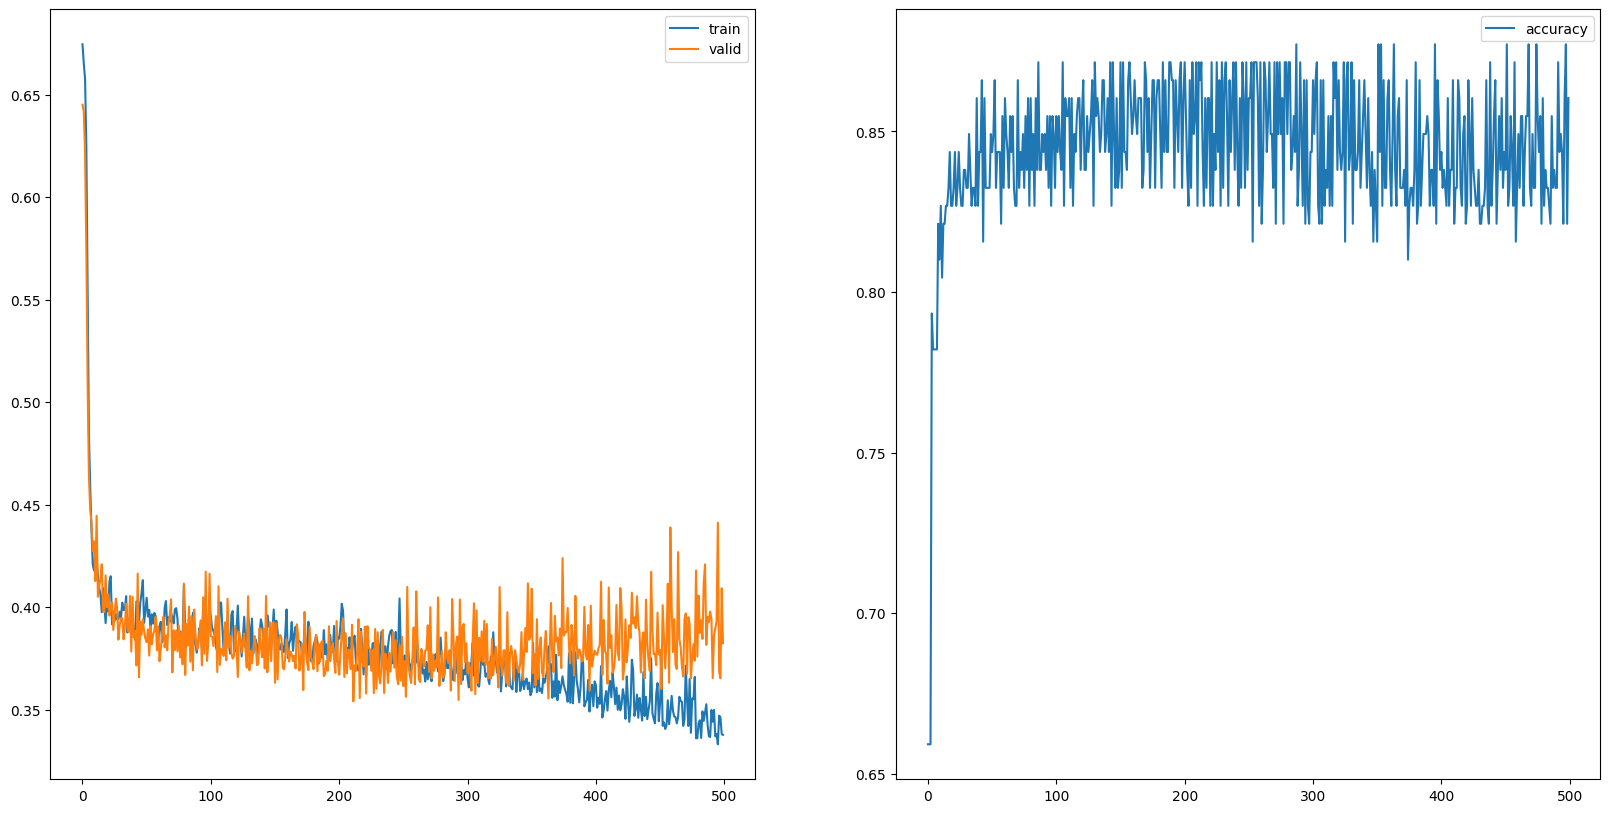

In [44]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(decay_train_hist,label='train')
a[0].plot(decay_valid_hist,label='valid')
a[0].legend()
a[1].plot(decay_acc,label='accuracy')
a[1].legend()


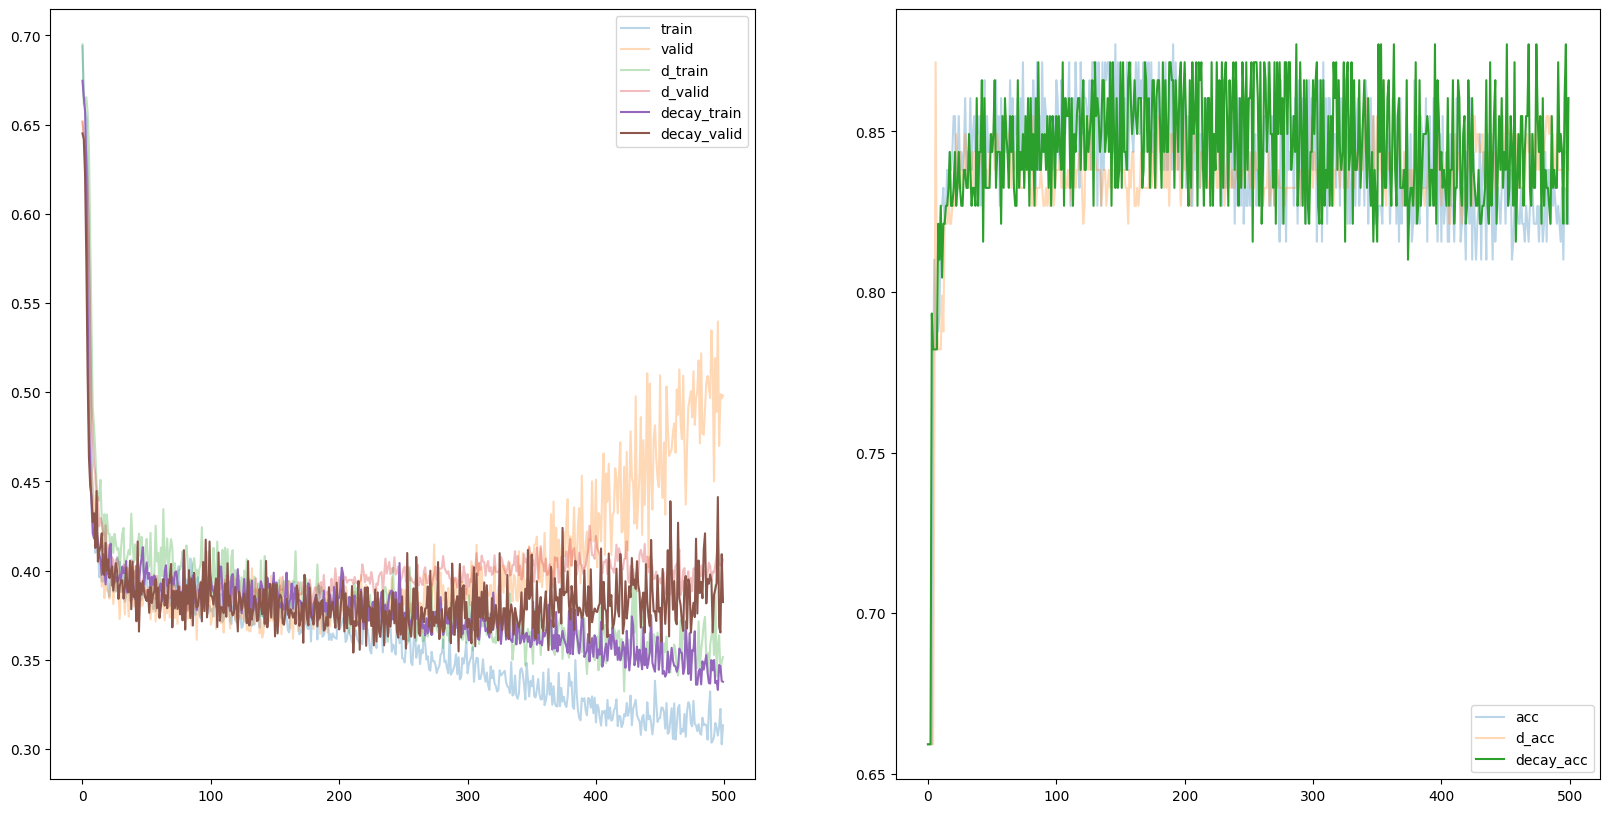

In [46]:
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(train_hist,label='train',alpha = 0.3)
a[0].plot(valid_hist,label='valid',alpha = 0.3)
a[0].plot(d_train_hist,label='d_train',alpha = 0.3)
a[0].plot(d_valid_hist,label='d_valid',alpha = 0.3)
a[0].plot(decay_train_hist,label = 'decay_train')
a[0].plot(decay_valid_hist,label = 'decay_valid')

a[1].plot(acc,label = 'acc',alpha = 0.3)
a[1].plot(d_acc,label = 'd_acc',alpha = 0.3)
a[1].plot(decay_acc,label = 'decay_acc')

a[0].legend()
a[1].legend()
plt.show() 

In [212]:
test_df = pd.read_csv('../dataset/test_preprocessed.csv')
scaler.transform(test_df)
input = torch.tensor(scaler.transform(test_df), dtype=torch.float32)

### Learning Rate scheduler

In [20]:
from torch.optim.lr_scheduler import StepLR
model = NN()
loss_fn = nn.BCELoss()
d_optimizer = torch.optim.Adam(model.parameters(),lr = 0.001, weight_decay=0.0001)
scheduler = StepLR(d_optimizer, step_size= 30, gamma=0.5)
decay_train_hist = []
decay_valid_hist = []
decay_acc = []

In [21]:
epochs = 500
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loof(model,loss_fn,d_optimizer,train_dataloader)
    decay_train_hist.append(train_loss)
    valid_loss, accuracy = valid_loof(model,loss_fn,valid_dataloader)
    print(f'valid Loss : {valid_loss:.4f},Accuracy L {accuracy:.4f}')
    decay_valid_hist.append(valid_loss)
    decay_acc.append(accuracy)
    scheduler.step()

Epoch 1
-------------------------------


Loss: 0.5233631134033203: 100%|██████████| 23/23 [00:00<00:00, 132.55it/s]

valid Loss : 0.6758,Accuracy L 0.5978


Epoch 2
-------------------------------


Loss: 0.5142676830291748: 100%|██████████| 23/23 [00:00<00:00, 207.89it/s]


valid Loss : 0.6716,Accuracy L 0.5978
Epoch 3
-------------------------------


Loss: 0.8203346729278564: 100%|██████████| 23/23 [00:00<00:00, 145.13it/s]


valid Loss : 0.6614,Accuracy L 0.5978
Epoch 4
-------------------------------


Loss: 0.58286052942276: 100%|██████████| 23/23 [00:00<00:00, 227.34it/s]


valid Loss : 0.6431,Accuracy L 0.5978
Epoch 5
-------------------------------


Loss: 0.6969413161277771: 100%|██████████| 23/23 [00:00<00:00, 205.19it/s]


valid Loss : 0.5997,Accuracy L 0.6872
Epoch 6
-------------------------------


Loss: 0.3773500621318817: 100%|██████████| 23/23 [00:00<00:00, 151.98it/s] 


valid Loss : 0.5489,Accuracy L 0.7765
Epoch 7
-------------------------------


Loss: 0.54466712474823: 100%|██████████| 23/23 [00:00<00:00, 228.24it/s]


valid Loss : 0.5178,Accuracy L 0.7318
Epoch 8
-------------------------------


Loss: 0.26636043190956116: 100%|██████████| 23/23 [00:00<00:00, 235.41it/s]


valid Loss : 0.5041,Accuracy L 0.7486
Epoch 9
-------------------------------


Loss: 0.5797051191329956: 100%|██████████| 23/23 [00:00<00:00, 213.53it/s] 


valid Loss : 0.4982,Accuracy L 0.7654
Epoch 10
-------------------------------


Loss: 0.1501414179801941: 100%|██████████| 23/23 [00:00<00:00, 231.83it/s]


valid Loss : 0.4902,Accuracy L 0.7933
Epoch 11
-------------------------------


Loss: 0.4929063618183136: 100%|██████████| 23/23 [00:00<00:00, 250.85it/s]


valid Loss : 0.4913,Accuracy L 0.7709
Epoch 12
-------------------------------


Loss: 0.21654585003852844: 100%|██████████| 23/23 [00:00<00:00, 232.29it/s]


valid Loss : 0.4852,Accuracy L 0.7933
Epoch 13
-------------------------------


Loss: 0.13331417739391327: 100%|██████████| 23/23 [00:00<00:00, 194.74it/s]


valid Loss : 0.4925,Accuracy L 0.7821
Epoch 14
-------------------------------


Loss: 0.17479151487350464: 100%|██████████| 23/23 [00:00<00:00, 229.07it/s]


valid Loss : 0.4848,Accuracy L 0.7877
Epoch 15
-------------------------------


Loss: 0.3341675102710724: 100%|██████████| 23/23 [00:00<00:00, 241.15it/s]


valid Loss : 0.4887,Accuracy L 0.7877
Epoch 16
-------------------------------


Loss: 0.1973942220211029: 100%|██████████| 23/23 [00:00<00:00, 153.56it/s] 


valid Loss : 0.4849,Accuracy L 0.7877
Epoch 17
-------------------------------


Loss: 0.47715848684310913: 100%|██████████| 23/23 [00:00<00:00, 229.93it/s]


valid Loss : 0.4753,Accuracy L 0.8101
Epoch 18
-------------------------------


Loss: 0.19155383110046387: 100%|██████████| 23/23 [00:00<00:00, 224.90it/s]


valid Loss : 0.4882,Accuracy L 0.7821
Epoch 19
-------------------------------


Loss: 0.1713137924671173: 100%|██████████| 23/23 [00:00<00:00, 197.26it/s]


valid Loss : 0.4776,Accuracy L 0.7933
Epoch 20
-------------------------------


Loss: 0.4023253917694092: 100%|██████████| 23/23 [00:00<00:00, 213.22it/s] 


valid Loss : 0.4770,Accuracy L 0.7933
Epoch 21
-------------------------------


Loss: 0.16234761476516724: 100%|██████████| 23/23 [00:00<00:00, 146.84it/s]


valid Loss : 0.4710,Accuracy L 0.8101
Epoch 22
-------------------------------


Loss: 0.09896513819694519: 100%|██████████| 23/23 [00:00<00:00, 215.42it/s]


valid Loss : 0.4783,Accuracy L 0.7877
Epoch 23
-------------------------------


Loss: 0.2556905448436737: 100%|██████████| 23/23 [00:00<00:00, 214.03it/s]


valid Loss : 0.4737,Accuracy L 0.7933
Epoch 24
-------------------------------


Loss: 0.3525174856185913: 100%|██████████| 23/23 [00:00<00:00, 205.98it/s] 


valid Loss : 0.4692,Accuracy L 0.8101
Epoch 25
-------------------------------


Loss: 0.2186465561389923: 100%|██████████| 23/23 [00:00<00:00, 258.92it/s]


valid Loss : 0.4708,Accuracy L 0.8045
Epoch 26
-------------------------------


Loss: 0.21965621411800385: 100%|██████████| 23/23 [00:00<00:00, 289.93it/s]


valid Loss : 0.4791,Accuracy L 0.7877
Epoch 27
-------------------------------


Loss: 0.19981691241264343: 100%|██████████| 23/23 [00:00<00:00, 219.69it/s]


valid Loss : 0.4782,Accuracy L 0.7877
Epoch 28
-------------------------------


Loss: 0.08607335388660431: 100%|██████████| 23/23 [00:00<00:00, 283.45it/s]


valid Loss : 0.4702,Accuracy L 0.8045
Epoch 29
-------------------------------


Loss: 0.09597079455852509: 100%|██████████| 23/23 [00:00<00:00, 158.50it/s]


valid Loss : 0.4852,Accuracy L 0.7765
Epoch 30
-------------------------------


Loss: 0.3746034801006317: 100%|██████████| 23/23 [00:00<00:00, 273.29it/s]


valid Loss : 0.4650,Accuracy L 0.8101
Epoch 31
-------------------------------


Loss: 0.5892326235771179: 100%|██████████| 23/23 [00:00<00:00, 231.21it/s]


valid Loss : 0.4686,Accuracy L 0.8045
Epoch 32
-------------------------------


Loss: 0.2950839102268219: 100%|██████████| 23/23 [00:00<00:00, 199.93it/s]


valid Loss : 0.4693,Accuracy L 0.7933
Epoch 33
-------------------------------


Loss: 0.38340792059898376: 100%|██████████| 23/23 [00:00<00:00, 145.73it/s]


valid Loss : 0.4657,Accuracy L 0.8101
Epoch 34
-------------------------------


Loss: 0.49171704053878784: 100%|██████████| 23/23 [00:00<00:00, 231.10it/s]


valid Loss : 0.4708,Accuracy L 0.7933
Epoch 35
-------------------------------


Loss: 0.14012205600738525: 100%|██████████| 23/23 [00:00<00:00, 222.76it/s]


valid Loss : 0.4667,Accuracy L 0.8101
Epoch 36
-------------------------------


Loss: 0.13621117174625397: 100%|██████████| 23/23 [00:00<00:00, 237.39it/s]


valid Loss : 0.4673,Accuracy L 0.8045
Epoch 37
-------------------------------


Loss: 0.38723546266555786: 100%|██████████| 23/23 [00:00<00:00, 153.39it/s]


valid Loss : 0.4658,Accuracy L 0.8101
Epoch 38
-------------------------------


Loss: 0.658164381980896: 100%|██████████| 23/23 [00:00<00:00, 246.14it/s]


valid Loss : 0.4693,Accuracy L 0.7933
Epoch 39
-------------------------------


Loss: 0.23710086941719055: 100%|██████████| 23/23 [00:00<00:00, 231.66it/s]


valid Loss : 0.4670,Accuracy L 0.7933
Epoch 40
-------------------------------


Loss: 0.09847933053970337: 100%|██████████| 23/23 [00:00<00:00, 295.76it/s]


valid Loss : 0.4634,Accuracy L 0.8101
Epoch 41
-------------------------------


Loss: 0.2702716290950775: 100%|██████████| 23/23 [00:00<00:00, 159.52it/s] 


valid Loss : 0.4670,Accuracy L 0.7933
Epoch 42
-------------------------------


Loss: 0.09940677881240845: 100%|██████████| 23/23 [00:00<00:00, 200.91it/s]


valid Loss : 0.4665,Accuracy L 0.8045
Epoch 43
-------------------------------


Loss: 0.8497534394264221: 100%|██████████| 23/23 [00:00<00:00, 197.07it/s] 


valid Loss : 0.4662,Accuracy L 0.8045
Epoch 44
-------------------------------


Loss: 0.18319229781627655: 100%|██████████| 23/23 [00:00<00:00, 252.15it/s]


valid Loss : 0.4651,Accuracy L 0.8045
Epoch 45
-------------------------------


Loss: 0.5659696459770203: 100%|██████████| 23/23 [00:00<00:00, 176.17it/s] 


valid Loss : 0.4666,Accuracy L 0.8045
Epoch 46
-------------------------------


Loss: 0.5334221720695496: 100%|██████████| 23/23 [00:00<00:00, 212.42it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 47
-------------------------------


Loss: 0.38417524099349976: 100%|██████████| 23/23 [00:00<00:00, 262.27it/s]


valid Loss : 0.4622,Accuracy L 0.8045
Epoch 48
-------------------------------


Loss: 0.23264732956886292: 100%|██████████| 23/23 [00:00<00:00, 251.18it/s]


valid Loss : 0.4650,Accuracy L 0.7933
Epoch 49
-------------------------------


Loss: 0.13685651123523712: 100%|██████████| 23/23 [00:00<00:00, 209.42it/s]


valid Loss : 0.4622,Accuracy L 0.8045
Epoch 50
-------------------------------


Loss: 0.5364996790885925: 100%|██████████| 23/23 [00:00<00:00, 150.21it/s] 


valid Loss : 0.4652,Accuracy L 0.7989
Epoch 51
-------------------------------


Loss: 0.21235495805740356: 100%|██████████| 23/23 [00:00<00:00, 196.98it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 52
-------------------------------


Loss: 0.22535786032676697: 100%|██████████| 23/23 [00:00<00:00, 224.75it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 53
-------------------------------


Loss: 0.13870373368263245: 100%|██████████| 23/23 [00:00<00:00, 210.34it/s]


valid Loss : 0.4634,Accuracy L 0.8045
Epoch 54
-------------------------------


Loss: 0.38860321044921875: 100%|██████████| 23/23 [00:00<00:00, 248.79it/s]


valid Loss : 0.4641,Accuracy L 0.8045
Epoch 55
-------------------------------


Loss: 0.49874356389045715: 100%|██████████| 23/23 [00:00<00:00, 185.59it/s]


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 56
-------------------------------


Loss: 0.10754770785570145: 100%|██████████| 23/23 [00:00<00:00, 211.23it/s]


valid Loss : 0.4612,Accuracy L 0.8156
Epoch 57
-------------------------------


Loss: 0.5163859128952026: 100%|██████████| 23/23 [00:00<00:00, 240.25it/s]


valid Loss : 0.4649,Accuracy L 0.8045
Epoch 58
-------------------------------


Loss: 0.23000240325927734: 100%|██████████| 23/23 [00:00<00:00, 237.58it/s]


valid Loss : 0.4628,Accuracy L 0.8045
Epoch 59
-------------------------------


Loss: 0.395978182554245: 100%|██████████| 23/23 [00:00<00:00, 232.82it/s]


valid Loss : 0.4629,Accuracy L 0.8101
Epoch 60
-------------------------------


Loss: 0.5331432223320007: 100%|██████████| 23/23 [00:00<00:00, 223.70it/s]


valid Loss : 0.4654,Accuracy L 0.8045
Epoch 61
-------------------------------


Loss: 0.3799026310443878: 100%|██████████| 23/23 [00:00<00:00, 191.59it/s] 


valid Loss : 0.4664,Accuracy L 0.7933
Epoch 62
-------------------------------


Loss: 0.2046171873807907: 100%|██████████| 23/23 [00:00<00:00, 163.43it/s] 


valid Loss : 0.4612,Accuracy L 0.8101
Epoch 63
-------------------------------


Loss: 0.48664164543151855: 100%|██████████| 23/23 [00:00<00:00, 200.83it/s]


valid Loss : 0.4632,Accuracy L 0.8101
Epoch 64
-------------------------------


Loss: 0.1304112821817398: 100%|██████████| 23/23 [00:00<00:00, 230.16it/s]


valid Loss : 0.4621,Accuracy L 0.8045
Epoch 65
-------------------------------


Loss: 0.5079348683357239: 100%|██████████| 23/23 [00:00<00:00, 200.82it/s] 


valid Loss : 0.4630,Accuracy L 0.8045
Epoch 66
-------------------------------


Loss: 0.17476969957351685: 100%|██████████| 23/23 [00:00<00:00, 164.40it/s]


valid Loss : 0.4643,Accuracy L 0.8045
Epoch 67
-------------------------------


Loss: 0.6630706191062927: 100%|██████████| 23/23 [00:00<00:00, 182.22it/s] 


valid Loss : 0.4628,Accuracy L 0.8045
Epoch 68
-------------------------------


Loss: 0.11833682656288147: 100%|██████████| 23/23 [00:00<00:00, 171.47it/s]


valid Loss : 0.4630,Accuracy L 0.8045
Epoch 69
-------------------------------


Loss: 0.3226505219936371: 100%|██████████| 23/23 [00:00<00:00, 199.03it/s] 


valid Loss : 0.4629,Accuracy L 0.8045
Epoch 70
-------------------------------


Loss: 0.579206645488739: 100%|██████████| 23/23 [00:00<00:00, 162.00it/s]  


valid Loss : 0.4646,Accuracy L 0.8045
Epoch 71
-------------------------------


Loss: 0.37680116295814514: 100%|██████████| 23/23 [00:00<00:00, 219.60it/s]


valid Loss : 0.4636,Accuracy L 0.8045
Epoch 72
-------------------------------


Loss: 0.34563013911247253: 100%|██████████| 23/23 [00:00<00:00, 228.53it/s]


valid Loss : 0.4631,Accuracy L 0.8045
Epoch 73
-------------------------------


Loss: 0.292167067527771: 100%|██████████| 23/23 [00:00<00:00, 200.26it/s]  


valid Loss : 0.4642,Accuracy L 0.8045
Epoch 74
-------------------------------


Loss: 0.18183235824108124: 100%|██████████| 23/23 [00:00<00:00, 192.72it/s]


valid Loss : 0.4630,Accuracy L 0.8045
Epoch 75
-------------------------------


Loss: 0.19113075733184814: 100%|██████████| 23/23 [00:00<00:00, 147.82it/s]


valid Loss : 0.4628,Accuracy L 0.8045
Epoch 76
-------------------------------


Loss: 0.4756658375263214: 100%|██████████| 23/23 [00:00<00:00, 218.01it/s]


valid Loss : 0.4649,Accuracy L 0.8045
Epoch 77
-------------------------------


Loss: 0.5348372459411621: 100%|██████████| 23/23 [00:00<00:00, 231.65it/s]


valid Loss : 0.4630,Accuracy L 0.8045
Epoch 78
-------------------------------


Loss: 0.173981174826622: 100%|██████████| 23/23 [00:00<00:00, 224.80it/s] 


valid Loss : 0.4606,Accuracy L 0.8101
Epoch 79
-------------------------------


Loss: 0.3516162931919098: 100%|██████████| 23/23 [00:00<00:00, 232.63it/s]


valid Loss : 0.4665,Accuracy L 0.7933
Epoch 80
-------------------------------


Loss: 0.5431543588638306: 100%|██████████| 23/23 [00:00<00:00, 213.29it/s] 


valid Loss : 0.4607,Accuracy L 0.8101
Epoch 81
-------------------------------


Loss: 0.734316349029541: 100%|██████████| 23/23 [00:00<00:00, 151.53it/s]  


valid Loss : 0.4658,Accuracy L 0.7933
Epoch 82
-------------------------------


Loss: 0.37161391973495483: 100%|██████████| 23/23 [00:00<00:00, 255.81it/s]


valid Loss : 0.4608,Accuracy L 0.8101
Epoch 83
-------------------------------


Loss: 0.48620331287384033: 100%|██████████| 23/23 [00:00<00:00, 246.16it/s]


valid Loss : 0.4636,Accuracy L 0.8045
Epoch 84
-------------------------------


Loss: 0.17823129892349243: 100%|██████████| 23/23 [00:00<00:00, 229.17it/s]


valid Loss : 0.4639,Accuracy L 0.8045
Epoch 85
-------------------------------


Loss: 0.1308816820383072: 100%|██████████| 23/23 [00:00<00:00, 183.51it/s]


valid Loss : 0.4638,Accuracy L 0.8045
Epoch 86
-------------------------------


Loss: 0.11920104920864105: 100%|██████████| 23/23 [00:00<00:00, 227.32it/s]


valid Loss : 0.4622,Accuracy L 0.8045
Epoch 87
-------------------------------


Loss: 0.47415727376937866: 100%|██████████| 23/23 [00:00<00:00, 229.30it/s]


valid Loss : 0.4628,Accuracy L 0.8045
Epoch 88
-------------------------------


Loss: 0.410800039768219: 100%|██████████| 23/23 [00:00<00:00, 230.05it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 89
-------------------------------


Loss: 0.38262179493904114: 100%|██████████| 23/23 [00:00<00:00, 154.94it/s]


valid Loss : 0.4600,Accuracy L 0.8212
Epoch 90
-------------------------------


Loss: 0.2221963107585907: 100%|██████████| 23/23 [00:00<00:00, 211.20it/s]


valid Loss : 0.4614,Accuracy L 0.8101
Epoch 91
-------------------------------


Loss: 0.30595266819000244: 100%|██████████| 23/23 [00:00<00:00, 184.62it/s]


valid Loss : 0.4614,Accuracy L 0.8101
Epoch 92
-------------------------------


Loss: 0.4199468791484833: 100%|██████████| 23/23 [00:00<00:00, 215.30it/s]


valid Loss : 0.4641,Accuracy L 0.8045
Epoch 93
-------------------------------


Loss: 0.1451561450958252: 100%|██████████| 23/23 [00:00<00:00, 197.30it/s] 


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 94
-------------------------------


Loss: 0.28050926327705383: 100%|██████████| 23/23 [00:00<00:00, 232.73it/s]


valid Loss : 0.4631,Accuracy L 0.8045
Epoch 95
-------------------------------


Loss: 0.4796426296234131: 100%|██████████| 23/23 [00:00<00:00, 249.23it/s]


valid Loss : 0.4614,Accuracy L 0.8101
Epoch 96
-------------------------------


Loss: 0.6858047842979431: 100%|██████████| 23/23 [00:00<00:00, 170.55it/s] 


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 97
-------------------------------


Loss: 0.57210773229599: 100%|██████████| 23/23 [00:00<00:00, 212.85it/s]  


valid Loss : 0.4637,Accuracy L 0.8045
Epoch 98
-------------------------------


Loss: 0.4165639281272888: 100%|██████████| 23/23 [00:00<00:00, 237.01it/s]


valid Loss : 0.4639,Accuracy L 0.8045
Epoch 99
-------------------------------


Loss: 0.27211427688598633: 100%|██████████| 23/23 [00:00<00:00, 189.37it/s]


valid Loss : 0.4616,Accuracy L 0.8101
Epoch 100
-------------------------------


Loss: 0.4436190724372864: 100%|██████████| 23/23 [00:00<00:00, 219.67it/s] 


valid Loss : 0.4632,Accuracy L 0.8045
Epoch 101
-------------------------------


Loss: 0.5755093693733215: 100%|██████████| 23/23 [00:00<00:00, 193.10it/s]


valid Loss : 0.4636,Accuracy L 0.8045
Epoch 102
-------------------------------


Loss: 0.3557853400707245: 100%|██████████| 23/23 [00:00<00:00, 215.54it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 103
-------------------------------


Loss: 0.09018365293741226: 100%|██████████| 23/23 [00:00<00:00, 219.03it/s]


valid Loss : 0.4635,Accuracy L 0.8045
Epoch 104
-------------------------------


Loss: 0.29040321707725525: 100%|██████████| 23/23 [00:00<00:00, 204.84it/s]


valid Loss : 0.4641,Accuracy L 0.8045
Epoch 105
-------------------------------


Loss: 0.21481531858444214: 100%|██████████| 23/23 [00:00<00:00, 127.03it/s]


valid Loss : 0.4629,Accuracy L 0.8045
Epoch 106
-------------------------------


Loss: 0.177586629986763: 100%|██████████| 23/23 [00:00<00:00, 186.25it/s]  


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 107
-------------------------------


Loss: 0.43619927763938904: 100%|██████████| 23/23 [00:00<00:00, 189.14it/s]


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 108
-------------------------------


Loss: 0.3835121691226959: 100%|██████████| 23/23 [00:00<00:00, 196.54it/s]


valid Loss : 0.4637,Accuracy L 0.8045
Epoch 109
-------------------------------


Loss: 0.3836978077888489: 100%|██████████| 23/23 [00:00<00:00, 219.89it/s]


valid Loss : 0.4631,Accuracy L 0.8045
Epoch 110
-------------------------------


Loss: 0.6475112438201904: 100%|██████████| 23/23 [00:00<00:00, 222.64it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 111
-------------------------------


Loss: 0.3868502080440521: 100%|██████████| 23/23 [00:00<00:00, 254.36it/s]


valid Loss : 0.4631,Accuracy L 0.8045
Epoch 112
-------------------------------


Loss: 0.28111186623573303: 100%|██████████| 23/23 [00:00<00:00, 247.14it/s]


valid Loss : 0.4629,Accuracy L 0.8101
Epoch 113
-------------------------------


Loss: 0.23248498141765594: 100%|██████████| 23/23 [00:00<00:00, 162.82it/s]


valid Loss : 0.4610,Accuracy L 0.8156
Epoch 114
-------------------------------


Loss: 0.12946811318397522: 100%|██████████| 23/23 [00:00<00:00, 239.30it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 115
-------------------------------


Loss: 0.4505835771560669: 100%|██████████| 23/23 [00:00<00:00, 229.97it/s]


valid Loss : 0.4637,Accuracy L 0.8045
Epoch 116
-------------------------------


Loss: 0.07899517565965652: 100%|██████████| 23/23 [00:00<00:00, 228.97it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 117
-------------------------------


Loss: 0.1281495988368988: 100%|██████████| 23/23 [00:00<00:00, 153.28it/s] 


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 118
-------------------------------


Loss: 0.4419907331466675: 100%|██████████| 23/23 [00:00<00:00, 184.61it/s] 


valid Loss : 0.4629,Accuracy L 0.8101
Epoch 119
-------------------------------


Loss: 0.2883634865283966: 100%|██████████| 23/23 [00:00<00:00, 241.07it/s]


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 120
-------------------------------


Loss: 0.12386462092399597: 100%|██████████| 23/23 [00:00<00:00, 260.01it/s]


valid Loss : 0.4645,Accuracy L 0.8045
Epoch 121
-------------------------------


Loss: 0.37723249197006226: 100%|██████████| 23/23 [00:00<00:00, 180.67it/s]


valid Loss : 0.4645,Accuracy L 0.8045
Epoch 122
-------------------------------


Loss: 0.4505375921726227: 100%|██████████| 23/23 [00:00<00:00, 249.42it/s]


valid Loss : 0.4639,Accuracy L 0.8045
Epoch 123
-------------------------------


Loss: 0.2124423384666443: 100%|██████████| 23/23 [00:00<00:00, 231.50it/s]


valid Loss : 0.4633,Accuracy L 0.8101
Epoch 124
-------------------------------


Loss: 0.10139128565788269: 100%|██████████| 23/23 [00:00<00:00, 213.69it/s]


valid Loss : 0.4638,Accuracy L 0.8101
Epoch 125
-------------------------------


Loss: 0.3721321225166321: 100%|██████████| 23/23 [00:00<00:00, 210.14it/s] 


valid Loss : 0.4638,Accuracy L 0.8045
Epoch 126
-------------------------------


Loss: 0.13522863388061523: 100%|██████████| 23/23 [00:00<00:00, 173.04it/s]


valid Loss : 0.4632,Accuracy L 0.8101
Epoch 127
-------------------------------


Loss: 0.5937467813491821: 100%|██████████| 23/23 [00:00<00:00, 246.68it/s]


valid Loss : 0.4635,Accuracy L 0.8045
Epoch 128
-------------------------------


Loss: 0.5312122702598572: 100%|██████████| 23/23 [00:00<00:00, 245.06it/s]


valid Loss : 0.4641,Accuracy L 0.8045
Epoch 129
-------------------------------


Loss: 0.3730009198188782: 100%|██████████| 23/23 [00:00<00:00, 242.96it/s]


valid Loss : 0.4643,Accuracy L 0.8045
Epoch 130
-------------------------------


Loss: 0.5440447926521301: 100%|██████████| 23/23 [00:00<00:00, 153.02it/s] 


valid Loss : 0.4635,Accuracy L 0.8101
Epoch 131
-------------------------------


Loss: 0.6276942491531372: 100%|██████████| 23/23 [00:00<00:00, 229.77it/s]


valid Loss : 0.4631,Accuracy L 0.8101
Epoch 132
-------------------------------


Loss: 0.4181573987007141: 100%|██████████| 23/23 [00:00<00:00, 230.75it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 133
-------------------------------


Loss: 0.2143545299768448: 100%|██████████| 23/23 [00:00<00:00, 254.95it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 134
-------------------------------


Loss: 0.1573193073272705: 100%|██████████| 23/23 [00:00<00:00, 182.03it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 135
-------------------------------


Loss: 0.2225501537322998: 100%|██████████| 23/23 [00:00<00:00, 181.79it/s] 


valid Loss : 0.4630,Accuracy L 0.8101
Epoch 136
-------------------------------


Loss: 0.4077302813529968: 100%|██████████| 23/23 [00:00<00:00, 195.64it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 137
-------------------------------


Loss: 0.4108719229698181: 100%|██████████| 23/23 [00:00<00:00, 211.68it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 138
-------------------------------


Loss: 0.30844932794570923: 100%|██████████| 23/23 [00:00<00:00, 220.62it/s]


valid Loss : 0.4634,Accuracy L 0.8101
Epoch 139
-------------------------------


Loss: 0.3184460699558258: 100%|██████████| 23/23 [00:00<00:00, 282.28it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 140
-------------------------------


Loss: 0.14032937586307526: 100%|██████████| 23/23 [00:00<00:00, 161.08it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 141
-------------------------------


Loss: 0.13915008306503296: 100%|██████████| 23/23 [00:00<00:00, 213.49it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 142
-------------------------------


Loss: 0.4071412980556488: 100%|██████████| 23/23 [00:00<00:00, 197.23it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 143
-------------------------------


Loss: 0.14327384531497955: 100%|██████████| 23/23 [00:00<00:00, 229.99it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 144
-------------------------------


Loss: 0.42220473289489746: 100%|██████████| 23/23 [00:00<00:00, 202.03it/s]


valid Loss : 0.4638,Accuracy L 0.8101
Epoch 145
-------------------------------


Loss: 0.3191428780555725: 100%|██████████| 23/23 [00:00<00:00, 249.39it/s]


valid Loss : 0.4634,Accuracy L 0.8101
Epoch 146
-------------------------------


Loss: 0.15575405955314636: 100%|██████████| 23/23 [00:00<00:00, 153.37it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 147
-------------------------------


Loss: 0.23764832317829132: 100%|██████████| 23/23 [00:00<00:00, 214.12it/s]


valid Loss : 0.4633,Accuracy L 0.8101
Epoch 148
-------------------------------


Loss: 0.28494343161582947: 100%|██████████| 23/23 [00:00<00:00, 228.00it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 149
-------------------------------


Loss: 0.6478333473205566: 100%|██████████| 23/23 [00:00<00:00, 226.61it/s]


valid Loss : 0.4639,Accuracy L 0.8045
Epoch 150
-------------------------------


Loss: 0.3470696210861206: 100%|██████████| 23/23 [00:00<00:00, 176.03it/s] 


valid Loss : 0.4631,Accuracy L 0.8101
Epoch 151
-------------------------------


Loss: 0.7227455973625183: 100%|██████████| 23/23 [00:00<00:00, 205.73it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 152
-------------------------------


Loss: 0.41471874713897705: 100%|██████████| 23/23 [00:00<00:00, 211.19it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 153
-------------------------------


Loss: 0.24861475825309753: 100%|██████████| 23/23 [00:00<00:00, 231.27it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 154
-------------------------------


Loss: 0.21538619697093964: 100%|██████████| 23/23 [00:00<00:00, 154.06it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 155
-------------------------------


Loss: 0.4637990891933441: 100%|██████████| 23/23 [00:00<00:00, 230.53it/s]


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 156
-------------------------------


Loss: 0.40723511576652527: 100%|██████████| 23/23 [00:00<00:00, 224.47it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 157
-------------------------------


Loss: 0.14721707999706268: 100%|██████████| 23/23 [00:00<00:00, 226.72it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 158
-------------------------------


Loss: 0.20252202451229095: 100%|██████████| 23/23 [00:00<00:00, 244.55it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 159
-------------------------------


Loss: 0.3980828523635864: 100%|██████████| 23/23 [00:00<00:00, 152.56it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 160
-------------------------------


Loss: 0.12840265035629272: 100%|██████████| 23/23 [00:00<00:00, 223.84it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 161
-------------------------------


Loss: 0.3328757584095001: 100%|██████████| 23/23 [00:00<00:00, 237.13it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 162
-------------------------------


Loss: 0.2727280855178833: 100%|██████████| 23/23 [00:00<00:00, 209.32it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 163
-------------------------------


Loss: 0.1568695604801178: 100%|██████████| 23/23 [00:00<00:00, 207.28it/s]


valid Loss : 0.4630,Accuracy L 0.8101
Epoch 164
-------------------------------


Loss: 0.4052717685699463: 100%|██████████| 23/23 [00:00<00:00, 193.94it/s] 


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 165
-------------------------------


Loss: 0.3918818235397339: 100%|██████████| 23/23 [00:00<00:00, 132.19it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 166
-------------------------------


Loss: 0.44847339391708374: 100%|██████████| 23/23 [00:00<00:00, 230.11it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 167
-------------------------------


Loss: 0.14748449623584747: 100%|██████████| 23/23 [00:00<00:00, 243.67it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 168
-------------------------------


Loss: 0.3424088656902313: 100%|██████████| 23/23 [00:00<00:00, 247.75it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 169
-------------------------------


Loss: 1.1841955184936523: 100%|██████████| 23/23 [00:00<00:00, 216.89it/s] 


valid Loss : 0.4631,Accuracy L 0.8101
Epoch 170
-------------------------------


Loss: 0.866115152835846: 100%|██████████| 23/23 [00:00<00:00, 182.65it/s]  


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 171
-------------------------------


Loss: 0.068595290184021: 100%|██████████| 23/23 [00:00<00:00, 233.44it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 172
-------------------------------


Loss: 0.5635232925415039: 100%|██████████| 23/23 [00:00<00:00, 238.77it/s]


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 173
-------------------------------


Loss: 0.25130242109298706: 100%|██████████| 23/23 [00:00<00:00, 238.47it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 174
-------------------------------


Loss: 0.18980839848518372: 100%|██████████| 23/23 [00:00<00:00, 242.91it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 175
-------------------------------


Loss: 0.10244131088256836: 100%|██████████| 23/23 [00:00<00:00, 150.48it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 176
-------------------------------


Loss: 0.24745267629623413: 100%|██████████| 23/23 [00:00<00:00, 236.85it/s]


valid Loss : 0.4629,Accuracy L 0.8101
Epoch 177
-------------------------------


Loss: 0.17618146538734436: 100%|██████████| 23/23 [00:00<00:00, 187.50it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 178
-------------------------------


Loss: 0.514951229095459: 100%|██████████| 23/23 [00:00<00:00, 216.62it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 179
-------------------------------


Loss: 0.6095400452613831: 100%|██████████| 23/23 [00:00<00:00, 194.50it/s] 


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 180
-------------------------------


Loss: 0.5268625020980835: 100%|██████████| 23/23 [00:00<00:00, 145.88it/s] 


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 181
-------------------------------


Loss: 0.37128207087516785: 100%|██████████| 23/23 [00:00<00:00, 205.75it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 182
-------------------------------


Loss: 0.22332137823104858: 100%|██████████| 23/23 [00:00<00:00, 207.78it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 183
-------------------------------


Loss: 0.14740093052387238: 100%|██████████| 23/23 [00:00<00:00, 195.96it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 184
-------------------------------


Loss: 0.17486672103405: 100%|██████████| 23/23 [00:00<00:00, 196.06it/s]   


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 185
-------------------------------


Loss: 0.4925808608531952: 100%|██████████| 23/23 [00:00<00:00, 163.46it/s] 


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 186
-------------------------------


Loss: 0.46004170179367065: 100%|██████████| 23/23 [00:00<00:00, 209.14it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 187
-------------------------------


Loss: 0.46895453333854675: 100%|██████████| 23/23 [00:00<00:00, 197.16it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 188
-------------------------------


Loss: 0.4447178542613983: 100%|██████████| 23/23 [00:00<00:00, 166.17it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 189
-------------------------------


Loss: 0.38499176502227783: 100%|██████████| 23/23 [00:00<00:00, 173.61it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 190
-------------------------------


Loss: 0.18515841662883759: 100%|██████████| 23/23 [00:00<00:00, 249.48it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 191
-------------------------------


Loss: 0.4722614884376526: 100%|██████████| 23/23 [00:00<00:00, 172.59it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 192
-------------------------------


Loss: 0.3084402084350586: 100%|██████████| 23/23 [00:00<00:00, 137.89it/s] 


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 193
-------------------------------


Loss: 0.11527663469314575: 100%|██████████| 23/23 [00:00<00:00, 210.27it/s]


valid Loss : 0.4627,Accuracy L 0.8101
Epoch 194
-------------------------------


Loss: 0.3961552381515503: 100%|██████████| 23/23 [00:00<00:00, 209.89it/s] 


valid Loss : 0.4628,Accuracy L 0.8101
Epoch 195
-------------------------------


Loss: 0.7346687316894531: 100%|██████████| 23/23 [00:00<00:00, 235.11it/s]


valid Loss : 0.4628,Accuracy L 0.8045
Epoch 196
-------------------------------


Loss: 0.4993092119693756: 100%|██████████| 23/23 [00:00<00:00, 250.49it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 197
-------------------------------


Loss: 0.2617052495479584: 100%|██████████| 23/23 [00:00<00:00, 163.38it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 198
-------------------------------


Loss: 0.46510669589042664: 100%|██████████| 23/23 [00:00<00:00, 254.54it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 199
-------------------------------


Loss: 0.27270805835723877: 100%|██████████| 23/23 [00:00<00:00, 229.96it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 200
-------------------------------


Loss: 0.6412997245788574: 100%|██████████| 23/23 [00:00<00:00, 229.28it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 201
-------------------------------


Loss: 0.6441909074783325: 100%|██████████| 23/23 [00:00<00:00, 255.56it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 202
-------------------------------


Loss: 0.1563752442598343: 100%|██████████| 23/23 [00:00<00:00, 158.90it/s] 


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 203
-------------------------------


Loss: 0.5518068075180054: 100%|██████████| 23/23 [00:00<00:00, 197.32it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 204
-------------------------------


Loss: 0.28380510210990906: 100%|██████████| 23/23 [00:00<00:00, 245.46it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 205
-------------------------------


Loss: 0.49693983793258667: 100%|██████████| 23/23 [00:00<00:00, 267.28it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 206
-------------------------------


Loss: 0.4091067910194397: 100%|██████████| 23/23 [00:00<00:00, 254.36it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 207
-------------------------------


Loss: 0.4411552846431732: 100%|██████████| 23/23 [00:00<00:00, 261.63it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 208
-------------------------------


Loss: 0.5415461659431458: 100%|██████████| 23/23 [00:00<00:00, 153.67it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 209
-------------------------------


Loss: 0.6847607493400574: 100%|██████████| 23/23 [00:00<00:00, 229.88it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 210
-------------------------------


Loss: 0.4608389735221863: 100%|██████████| 23/23 [00:00<00:00, 231.12it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 211
-------------------------------


Loss: 0.972012996673584: 100%|██████████| 23/23 [00:00<00:00, 229.80it/s]  


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 212
-------------------------------


Loss: 0.21549029648303986: 100%|██████████| 23/23 [00:00<00:00, 176.20it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 213
-------------------------------


Loss: 0.34531068801879883: 100%|██████████| 23/23 [00:00<00:00, 219.44it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 214
-------------------------------


Loss: 0.39416825771331787: 100%|██████████| 23/23 [00:00<00:00, 198.22it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 215
-------------------------------


Loss: 0.2600705325603485: 100%|██████████| 23/23 [00:00<00:00, 229.85it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 216
-------------------------------


Loss: 0.6640394926071167: 100%|██████████| 23/23 [00:00<00:00, 162.76it/s] 


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 217
-------------------------------


Loss: 0.36032596230506897: 100%|██████████| 23/23 [00:00<00:00, 189.65it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 218
-------------------------------


Loss: 0.5128501057624817: 100%|██████████| 23/23 [00:00<00:00, 241.56it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 219
-------------------------------


Loss: 0.23662695288658142: 100%|██████████| 23/23 [00:00<00:00, 217.98it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 220
-------------------------------


Loss: 0.2699463963508606: 100%|██████████| 23/23 [00:00<00:00, 212.83it/s]


valid Loss : 0.4619,Accuracy L 0.8101
Epoch 221
-------------------------------


Loss: 0.37920838594436646: 100%|██████████| 23/23 [00:00<00:00, 144.53it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 222
-------------------------------


Loss: 0.17073260247707367: 100%|██████████| 23/23 [00:00<00:00, 187.87it/s]


valid Loss : 0.4620,Accuracy L 0.8101
Epoch 223
-------------------------------


Loss: 0.13277669250965118: 100%|██████████| 23/23 [00:00<00:00, 225.02it/s]


valid Loss : 0.4621,Accuracy L 0.8101
Epoch 224
-------------------------------


Loss: 0.3786649703979492: 100%|██████████| 23/23 [00:00<00:00, 229.94it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 225
-------------------------------


Loss: 0.5077211856842041: 100%|██████████| 23/23 [00:00<00:00, 215.73it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 226
-------------------------------


Loss: 0.1693829447031021: 100%|██████████| 23/23 [00:00<00:00, 266.98it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 227
-------------------------------


Loss: 0.20689114928245544: 100%|██████████| 23/23 [00:00<00:00, 192.36it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 228
-------------------------------


Loss: 0.08815919607877731: 100%|██████████| 23/23 [00:00<00:00, 145.58it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 229
-------------------------------


Loss: 0.11521915346384048: 100%|██████████| 23/23 [00:00<00:00, 201.31it/s]


valid Loss : 0.4622,Accuracy L 0.8101
Epoch 230
-------------------------------


Loss: 0.20365697145462036: 100%|██████████| 23/23 [00:00<00:00, 195.42it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 231
-------------------------------


Loss: 0.7885541915893555: 100%|██████████| 23/23 [00:00<00:00, 184.75it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 232
-------------------------------


Loss: 0.14951051771640778: 100%|██████████| 23/23 [00:00<00:00, 163.60it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 233
-------------------------------


Loss: 0.2884692847728729: 100%|██████████| 23/23 [00:00<00:00, 232.09it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 234
-------------------------------


Loss: 0.7440003752708435: 100%|██████████| 23/23 [00:00<00:00, 248.50it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 235
-------------------------------


Loss: 0.07865831255912781: 100%|██████████| 23/23 [00:00<00:00, 211.79it/s]


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 236
-------------------------------


Loss: 0.2388514131307602: 100%|██████████| 23/23 [00:00<00:00, 144.33it/s] 


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 237
-------------------------------


Loss: 0.5353652834892273: 100%|██████████| 23/23 [00:00<00:00, 200.66it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 238
-------------------------------


Loss: 0.6360039114952087: 100%|██████████| 23/23 [00:00<00:00, 198.58it/s] 


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 239
-------------------------------


Loss: 0.17313694953918457: 100%|██████████| 23/23 [00:00<00:00, 230.28it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 240
-------------------------------


Loss: 0.6540716886520386: 100%|██████████| 23/23 [00:00<00:00, 214.99it/s] 


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 241
-------------------------------


Loss: 0.22237515449523926: 100%|██████████| 23/23 [00:00<00:00, 165.13it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 242
-------------------------------


Loss: 0.18526500463485718: 100%|██████████| 23/23 [00:00<00:00, 262.00it/s]


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 243
-------------------------------


Loss: 0.34801185131073: 100%|██████████| 23/23 [00:00<00:00, 209.79it/s]   


valid Loss : 0.4627,Accuracy L 0.8045
Epoch 244
-------------------------------


Loss: 0.165633425116539: 100%|██████████| 23/23 [00:00<00:00, 228.47it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 245
-------------------------------


Loss: 0.551629364490509: 100%|██████████| 23/23 [00:00<00:00, 217.71it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 246
-------------------------------


Loss: 0.8739360570907593: 100%|██████████| 23/23 [00:00<00:00, 230.06it/s]


valid Loss : 0.4626,Accuracy L 0.8101
Epoch 247
-------------------------------


Loss: 0.12819841504096985: 100%|██████████| 23/23 [00:00<00:00, 228.84it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 248
-------------------------------


Loss: 0.5029877424240112: 100%|██████████| 23/23 [00:00<00:00, 212.77it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 249
-------------------------------


Loss: 0.5034496188163757: 100%|██████████| 23/23 [00:00<00:00, 145.01it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 250
-------------------------------


Loss: 0.17567840218544006: 100%|██████████| 23/23 [00:00<00:00, 248.72it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 251
-------------------------------


Loss: 0.5483266711235046: 100%|██████████| 23/23 [00:00<00:00, 326.02it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 252
-------------------------------


Loss: 0.15320801734924316: 100%|██████████| 23/23 [00:00<00:00, 344.94it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 253
-------------------------------


Loss: 0.725548505783081: 100%|██████████| 23/23 [00:00<00:00, 338.97it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 254
-------------------------------


Loss: 0.08351221680641174: 100%|██████████| 23/23 [00:00<00:00, 270.40it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 255
-------------------------------


Loss: 0.7690491676330566: 100%|██████████| 23/23 [00:00<00:00, 164.32it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 256
-------------------------------


Loss: 0.46839308738708496: 100%|██████████| 23/23 [00:00<00:00, 279.71it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 257
-------------------------------


Loss: 0.13171762228012085: 100%|██████████| 23/23 [00:00<00:00, 386.73it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 258
-------------------------------


Loss: 0.20241083204746246: 100%|██████████| 23/23 [00:00<00:00, 255.99it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 259
-------------------------------


Loss: 0.06918653100728989: 100%|██████████| 23/23 [00:00<00:00, 293.30it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 260
-------------------------------


Loss: 0.3679666221141815: 100%|██████████| 23/23 [00:00<00:00, 278.50it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 261
-------------------------------


Loss: 0.08250277489423752: 100%|██████████| 23/23 [00:00<00:00, 323.83it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 262
-------------------------------


Loss: 0.5529499053955078: 100%|██████████| 23/23 [00:00<00:00, 179.44it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 263
-------------------------------


Loss: 0.4471435546875: 100%|██████████| 23/23 [00:00<00:00, 321.61it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 264
-------------------------------


Loss: 0.6128929853439331: 100%|██████████| 23/23 [00:00<00:00, 289.55it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 265
-------------------------------


Loss: 0.35634565353393555: 100%|██████████| 23/23 [00:00<00:00, 297.24it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 266
-------------------------------


Loss: 0.18720340728759766: 100%|██████████| 23/23 [00:00<00:00, 291.80it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 267
-------------------------------


Loss: 0.7814777493476868: 100%|██████████| 23/23 [00:00<00:00, 377.60it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 268
-------------------------------


Loss: 0.5258419513702393: 100%|██████████| 23/23 [00:00<00:00, 188.33it/s] 


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 269
-------------------------------


Loss: 0.5184376239776611: 100%|██████████| 23/23 [00:00<00:00, 271.28it/s]


valid Loss : 0.4623,Accuracy L 0.8101
Epoch 270
-------------------------------


Loss: 0.338643342256546: 100%|██████████| 23/23 [00:00<00:00, 295.22it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 271
-------------------------------


Loss: 0.13364410400390625: 100%|██████████| 23/23 [00:00<00:00, 324.77it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 272
-------------------------------


Loss: 0.4195142388343811: 100%|██████████| 23/23 [00:00<00:00, 172.42it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 273
-------------------------------


Loss: 0.25250715017318726: 100%|██████████| 23/23 [00:00<00:00, 289.95it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 274
-------------------------------


Loss: 0.6153482794761658: 100%|██████████| 23/23 [00:00<00:00, 161.78it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 275
-------------------------------


Loss: 0.13026046752929688: 100%|██████████| 23/23 [00:00<00:00, 212.88it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 276
-------------------------------


Loss: 0.1343338042497635: 100%|██████████| 23/23 [00:00<00:00, 153.86it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 277
-------------------------------


Loss: 0.2131439447402954: 100%|██████████| 23/23 [00:00<00:00, 267.73it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 278
-------------------------------


Loss: 0.3647880554199219: 100%|██████████| 23/23 [00:00<00:00, 251.97it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 279
-------------------------------


Loss: 0.492761492729187: 100%|██████████| 23/23 [00:00<00:00, 244.91it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 280
-------------------------------


Loss: 0.9665505886077881: 100%|██████████| 23/23 [00:00<00:00, 204.02it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 281
-------------------------------


Loss: 0.36721983551979065: 100%|██████████| 23/23 [00:00<00:00, 252.92it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 282
-------------------------------


Loss: 0.20208345353603363: 100%|██████████| 23/23 [00:00<00:00, 269.43it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 283
-------------------------------


Loss: 0.24035906791687012: 100%|██████████| 23/23 [00:00<00:00, 230.95it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 284
-------------------------------


Loss: 0.4429621994495392: 100%|██████████| 23/23 [00:00<00:00, 162.79it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 285
-------------------------------


Loss: 0.4189765155315399: 100%|██████████| 23/23 [00:00<00:00, 240.38it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 286
-------------------------------


Loss: 0.3902841806411743: 100%|██████████| 23/23 [00:00<00:00, 290.55it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 287
-------------------------------


Loss: 0.33828604221343994: 100%|██████████| 23/23 [00:00<00:00, 282.33it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 288
-------------------------------


Loss: 0.45261260867118835: 100%|██████████| 23/23 [00:00<00:00, 314.14it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 289
-------------------------------


Loss: 0.31121885776519775: 100%|██████████| 23/23 [00:00<00:00, 197.80it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 290
-------------------------------


Loss: 0.1469348520040512: 100%|██████████| 23/23 [00:00<00:00, 227.11it/s]


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 291
-------------------------------


Loss: 0.186353862285614: 100%|██████████| 23/23 [00:00<00:00, 196.47it/s]  


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 292
-------------------------------


Loss: 0.4294757843017578: 100%|██████████| 23/23 [00:00<00:00, 192.40it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 293
-------------------------------


Loss: 0.5357819199562073: 100%|██████████| 23/23 [00:00<00:00, 204.59it/s] 


valid Loss : 0.4624,Accuracy L 0.8101
Epoch 294
-------------------------------


Loss: 0.47054052352905273: 100%|██████████| 23/23 [00:00<00:00, 184.41it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 295
-------------------------------


Loss: 0.44323185086250305: 100%|██████████| 23/23 [00:00<00:00, 215.55it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 296
-------------------------------


Loss: 0.35767772793769836: 100%|██████████| 23/23 [00:00<00:00, 242.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 297
-------------------------------


Loss: 0.4502865672111511: 100%|██████████| 23/23 [00:00<00:00, 223.70it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 298
-------------------------------


Loss: 0.2836299240589142: 100%|██████████| 23/23 [00:00<00:00, 169.76it/s] 


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 299
-------------------------------


Loss: 0.27933576703071594: 100%|██████████| 23/23 [00:00<00:00, 198.08it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 300
-------------------------------


Loss: 0.09074770659208298: 100%|██████████| 23/23 [00:00<00:00, 203.56it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 301
-------------------------------


Loss: 0.2213381975889206: 100%|██████████| 23/23 [00:00<00:00, 229.74it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 302
-------------------------------


Loss: 0.2110912948846817: 100%|██████████| 23/23 [00:00<00:00, 153.41it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 303
-------------------------------


Loss: 0.4919222891330719: 100%|██████████| 23/23 [00:00<00:00, 209.81it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 304
-------------------------------


Loss: 0.3843461275100708: 100%|██████████| 23/23 [00:00<00:00, 197.50it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 305
-------------------------------


Loss: 0.077432781457901: 100%|██████████| 23/23 [00:00<00:00, 245.45it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 306
-------------------------------


Loss: 0.365336149930954: 100%|██████████| 23/23 [00:00<00:00, 238.40it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 307
-------------------------------


Loss: 0.5605092644691467: 100%|██████████| 23/23 [00:00<00:00, 260.66it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 308
-------------------------------


Loss: 0.48007556796073914: 100%|██████████| 23/23 [00:00<00:00, 245.46it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 309
-------------------------------


Loss: 0.3541618585586548: 100%|██████████| 23/23 [00:00<00:00, 162.25it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 310
-------------------------------


Loss: 0.16093504428863525: 100%|██████████| 23/23 [00:00<00:00, 185.93it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 311
-------------------------------


Loss: 0.0841401219367981: 100%|██████████| 23/23 [00:00<00:00, 209.23it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 312
-------------------------------


Loss: 0.34820136427879333: 100%|██████████| 23/23 [00:00<00:00, 212.61it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 313
-------------------------------


Loss: 0.08335114270448685: 100%|██████████| 23/23 [00:00<00:00, 151.18it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 314
-------------------------------


Loss: 0.6336467862129211: 100%|██████████| 23/23 [00:00<00:00, 232.21it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 315
-------------------------------


Loss: 0.7699576616287231: 100%|██████████| 23/23 [00:00<00:00, 247.36it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 316
-------------------------------


Loss: 1.0637277364730835: 100%|██████████| 23/23 [00:00<00:00, 168.04it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 317
-------------------------------


Loss: 0.13325683772563934: 100%|██████████| 23/23 [00:00<00:00, 255.18it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 318
-------------------------------


Loss: 0.46048516035079956: 100%|██████████| 23/23 [00:00<00:00, 226.65it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 319
-------------------------------


Loss: 0.10485651344060898: 100%|██████████| 23/23 [00:00<00:00, 259.45it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 320
-------------------------------


Loss: 0.27385419607162476: 100%|██████████| 23/23 [00:00<00:00, 176.59it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 321
-------------------------------


Loss: 0.7330498695373535: 100%|██████████| 23/23 [00:00<00:00, 196.92it/s] 


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 322
-------------------------------


Loss: 0.437825083732605: 100%|██████████| 23/23 [00:00<00:00, 258.71it/s]


valid Loss : 0.4626,Accuracy L 0.8045
Epoch 323
-------------------------------


Loss: 0.08530809730291367: 100%|██████████| 23/23 [00:00<00:00, 241.52it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 324
-------------------------------


Loss: 0.9242821931838989: 100%|██████████| 23/23 [00:00<00:00, 166.33it/s] 


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 325
-------------------------------


Loss: 0.2312988042831421: 100%|██████████| 23/23 [00:00<00:00, 278.08it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 326
-------------------------------


Loss: 0.09741190075874329: 100%|██████████| 23/23 [00:00<00:00, 215.91it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 327
-------------------------------


Loss: 0.32944196462631226: 100%|██████████| 23/23 [00:00<00:00, 265.32it/s]


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 328
-------------------------------


Loss: 0.4312134385108948: 100%|██████████| 23/23 [00:00<00:00, 215.73it/s] 


valid Loss : 0.4625,Accuracy L 0.8045
Epoch 329
-------------------------------


Loss: 0.45831334590911865: 100%|██████████| 23/23 [00:00<00:00, 295.64it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 330
-------------------------------


Loss: 0.6110208034515381: 100%|██████████| 23/23 [00:00<00:00, 347.65it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 331
-------------------------------


Loss: 0.48523780703544617: 100%|██████████| 23/23 [00:00<00:00, 336.30it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 332
-------------------------------


Loss: 0.4738156199455261: 100%|██████████| 23/23 [00:00<00:00, 179.07it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 333
-------------------------------


Loss: 0.4201504588127136: 100%|██████████| 23/23 [00:00<00:00, 307.38it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 334
-------------------------------


Loss: 0.45738115906715393: 100%|██████████| 23/23 [00:00<00:00, 295.94it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 335
-------------------------------


Loss: 0.30273595452308655: 100%|██████████| 23/23 [00:00<00:00, 276.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 336
-------------------------------


Loss: 0.09428679943084717: 100%|██████████| 23/23 [00:00<00:00, 165.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 337
-------------------------------


Loss: 0.2889571785926819: 100%|██████████| 23/23 [00:00<00:00, 296.58it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 338
-------------------------------


Loss: 0.4032785892486572: 100%|██████████| 23/23 [00:00<00:00, 268.94it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 339
-------------------------------


Loss: 0.32838860154151917: 100%|██████████| 23/23 [00:00<00:00, 327.58it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 340
-------------------------------


Loss: 0.4585046172142029: 100%|██████████| 23/23 [00:00<00:00, 205.37it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 341
-------------------------------


Loss: 0.5071375966072083: 100%|██████████| 23/23 [00:00<00:00, 276.40it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 342
-------------------------------


Loss: 0.44502997398376465: 100%|██████████| 23/23 [00:00<00:00, 277.59it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 343
-------------------------------


Loss: 0.519108235836029: 100%|██████████| 23/23 [00:00<00:00, 239.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 344
-------------------------------


Loss: 0.32580244541168213: 100%|██████████| 23/23 [00:00<00:00, 161.75it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 345
-------------------------------


Loss: 0.14992265403270721: 100%|██████████| 23/23 [00:00<00:00, 245.73it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 346
-------------------------------


Loss: 0.5473853349685669: 100%|██████████| 23/23 [00:00<00:00, 243.15it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 347
-------------------------------


Loss: 0.1836954653263092: 100%|██████████| 23/23 [00:00<00:00, 286.47it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 348
-------------------------------


Loss: 0.12090175598859787: 100%|██████████| 23/23 [00:00<00:00, 205.78it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 349
-------------------------------


Loss: 0.7116602063179016: 100%|██████████| 23/23 [00:00<00:00, 303.46it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 350
-------------------------------


Loss: 0.1862020045518875: 100%|██████████| 23/23 [00:00<00:00, 346.29it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 351
-------------------------------


Loss: 0.34746304154396057: 100%|██████████| 23/23 [00:00<00:00, 289.89it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 352
-------------------------------


Loss: 0.5645327568054199: 100%|██████████| 23/23 [00:00<00:00, 208.98it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 353
-------------------------------


Loss: 0.4118784964084625: 100%|██████████| 23/23 [00:00<00:00, 345.22it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 354
-------------------------------


Loss: 0.07378621399402618: 100%|██████████| 23/23 [00:00<00:00, 284.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 355
-------------------------------


Loss: 0.22483983635902405: 100%|██████████| 23/23 [00:00<00:00, 274.45it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 356
-------------------------------


Loss: 0.37068092823028564: 100%|██████████| 23/23 [00:00<00:00, 173.06it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 357
-------------------------------


Loss: 0.35867372155189514: 100%|██████████| 23/23 [00:00<00:00, 230.00it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 358
-------------------------------


Loss: 0.14110660552978516: 100%|██████████| 23/23 [00:00<00:00, 308.77it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 359
-------------------------------


Loss: 0.32548871636390686: 100%|██████████| 23/23 [00:00<00:00, 275.41it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 360
-------------------------------


Loss: 0.14142896234989166: 100%|██████████| 23/23 [00:00<00:00, 158.99it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 361
-------------------------------


Loss: 0.1899084895849228: 100%|██████████| 23/23 [00:00<00:00, 285.30it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 362
-------------------------------


Loss: 0.4598994851112366: 100%|██████████| 23/23 [00:00<00:00, 319.99it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 363
-------------------------------


Loss: 0.6226660013198853: 100%|██████████| 23/23 [00:00<00:00, 275.98it/s]

valid Loss : 0.4625,Accuracy L 0.8101


Epoch 364
-------------------------------


Loss: 0.15752802789211273: 100%|██████████| 23/23 [00:00<00:00, 185.56it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 365
-------------------------------


Loss: 0.14357633888721466: 100%|██████████| 23/23 [00:00<00:00, 243.88it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 366
-------------------------------


Loss: 0.26234644651412964: 100%|██████████| 23/23 [00:00<00:00, 262.27it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 367
-------------------------------


Loss: 0.5127267241477966: 100%|██████████| 23/23 [00:00<00:00, 238.66it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 368
-------------------------------


Loss: 0.2011130452156067: 100%|██████████| 23/23 [00:00<00:00, 172.97it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 369
-------------------------------


Loss: 0.17602021992206573: 100%|██████████| 23/23 [00:00<00:00, 273.65it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 370
-------------------------------


Loss: 0.5206015110015869: 100%|██████████| 23/23 [00:00<00:00, 247.81it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 371
-------------------------------


Loss: 0.49821990728378296: 100%|██████████| 23/23 [00:00<00:00, 276.51it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 372
-------------------------------


Loss: 0.2619384229183197: 100%|██████████| 23/23 [00:00<00:00, 177.75it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 373
-------------------------------


Loss: 0.16287171840667725: 100%|██████████| 23/23 [00:00<00:00, 273.47it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 374
-------------------------------


Loss: 0.4492279887199402: 100%|██████████| 23/23 [00:00<00:00, 276.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 375
-------------------------------


Loss: 0.3314887285232544: 100%|██████████| 23/23 [00:00<00:00, 272.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 376
-------------------------------


Loss: 0.2957930862903595: 100%|██████████| 23/23 [00:00<00:00, 177.91it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 377
-------------------------------


Loss: 0.495040625333786: 100%|██████████| 23/23 [00:00<00:00, 197.09it/s]  


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 378
-------------------------------


Loss: 0.3730059862136841: 100%|██████████| 23/23 [00:00<00:00, 254.67it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 379
-------------------------------


Loss: 0.08453212678432465: 100%|██████████| 23/23 [00:00<00:00, 268.38it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 380
-------------------------------


Loss: 0.40771573781967163: 100%|██████████| 23/23 [00:00<00:00, 200.95it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 381
-------------------------------


Loss: 0.30545473098754883: 100%|██████████| 23/23 [00:00<00:00, 282.15it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 382
-------------------------------


Loss: 0.1583583652973175: 100%|██████████| 23/23 [00:00<00:00, 334.69it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 383
-------------------------------


Loss: 0.16152559220790863: 100%|██████████| 23/23 [00:00<00:00, 330.10it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 384
-------------------------------


Loss: 0.458694189786911: 100%|██████████| 23/23 [00:00<00:00, 254.09it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 385
-------------------------------


Loss: 0.3026007413864136: 100%|██████████| 23/23 [00:00<00:00, 235.03it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 386
-------------------------------


Loss: 0.27505260705947876: 100%|██████████| 23/23 [00:00<00:00, 284.67it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 387
-------------------------------


Loss: 0.41868188977241516: 100%|██████████| 23/23 [00:00<00:00, 276.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 388
-------------------------------


Loss: 0.31271877884864807: 100%|██████████| 23/23 [00:00<00:00, 169.26it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 389
-------------------------------


Loss: 0.8293271064758301: 100%|██████████| 23/23 [00:00<00:00, 249.90it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 390
-------------------------------


Loss: 1.0978280305862427: 100%|██████████| 23/23 [00:00<00:00, 345.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 391
-------------------------------


Loss: 0.24922581017017365: 100%|██████████| 23/23 [00:00<00:00, 221.37it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 392
-------------------------------


Loss: 0.20691590011119843: 100%|██████████| 23/23 [00:00<00:00, 173.03it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 393
-------------------------------


Loss: 0.12339871376752853: 100%|██████████| 23/23 [00:00<00:00, 311.26it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 394
-------------------------------


Loss: 0.3523031175136566: 100%|██████████| 23/23 [00:00<00:00, 289.90it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 395
-------------------------------


Loss: 0.1775786429643631: 100%|██████████| 23/23 [00:00<00:00, 345.65it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 396
-------------------------------


Loss: 0.45820143818855286: 100%|██████████| 23/23 [00:00<00:00, 169.96it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 397
-------------------------------


Loss: 0.482145756483078: 100%|██████████| 23/23 [00:00<00:00, 216.51it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 398
-------------------------------


Loss: 0.3315199017524719: 100%|██████████| 23/23 [00:00<00:00, 278.51it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 399
-------------------------------


Loss: 0.5862381458282471: 100%|██████████| 23/23 [00:00<00:00, 225.00it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 400
-------------------------------


Loss: 0.3719947934150696: 100%|██████████| 23/23 [00:00<00:00, 171.81it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 401
-------------------------------


Loss: 0.13441577553749084: 100%|██████████| 23/23 [00:00<00:00, 237.77it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 402
-------------------------------


Loss: 0.5407460927963257: 100%|██████████| 23/23 [00:00<00:00, 236.08it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 403
-------------------------------


Loss: 0.2480957955121994: 100%|██████████| 23/23 [00:00<00:00, 291.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 404
-------------------------------


Loss: 0.22055070102214813: 100%|██████████| 23/23 [00:00<00:00, 167.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 405
-------------------------------


Loss: 0.5168693661689758: 100%|██████████| 23/23 [00:00<00:00, 226.23it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 406
-------------------------------


Loss: 0.10155680030584335: 100%|██████████| 23/23 [00:00<00:00, 270.71it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 407
-------------------------------


Loss: 0.2365298867225647: 100%|██████████| 23/23 [00:00<00:00, 170.06it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 408
-------------------------------


Loss: 0.38831672072410583: 100%|██████████| 23/23 [00:00<00:00, 195.34it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 409
-------------------------------


Loss: 0.47842979431152344: 100%|██████████| 23/23 [00:00<00:00, 196.75it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 410
-------------------------------


Loss: 0.32312503457069397: 100%|██████████| 23/23 [00:00<00:00, 218.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 411
-------------------------------


Loss: 0.15411177277565002: 100%|██████████| 23/23 [00:00<00:00, 135.27it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 412
-------------------------------


Loss: 0.11983955651521683: 100%|██████████| 23/23 [00:00<00:00, 224.18it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 413
-------------------------------


Loss: 0.37976548075675964: 100%|██████████| 23/23 [00:00<00:00, 224.88it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 414
-------------------------------


Loss: 0.3160823881626129: 100%|██████████| 23/23 [00:00<00:00, 148.92it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 415
-------------------------------


Loss: 0.5312529802322388: 100%|██████████| 23/23 [00:00<00:00, 215.89it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 416
-------------------------------


Loss: 0.3870977759361267: 100%|██████████| 23/23 [00:00<00:00, 277.36it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 417
-------------------------------


Loss: 0.7721163630485535: 100%|██████████| 23/23 [00:00<00:00, 187.35it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 418
-------------------------------


Loss: 0.36750853061676025: 100%|██████████| 23/23 [00:00<00:00, 187.91it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 419
-------------------------------


Loss: 0.20112062990665436: 100%|██████████| 23/23 [00:00<00:00, 216.20it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 420
-------------------------------


Loss: 0.6185867786407471: 100%|██████████| 23/23 [00:00<00:00, 309.02it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 421
-------------------------------


Loss: 0.5082815885543823: 100%|██████████| 23/23 [00:00<00:00, 183.88it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 422
-------------------------------


Loss: 0.5518093705177307: 100%|██████████| 23/23 [00:00<00:00, 212.68it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 423
-------------------------------


Loss: 0.4731351137161255: 100%|██████████| 23/23 [00:00<00:00, 304.77it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 424
-------------------------------


Loss: 0.18762975931167603: 100%|██████████| 23/23 [00:00<00:00, 250.11it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 425
-------------------------------


Loss: 0.4195493161678314: 100%|██████████| 23/23 [00:00<00:00, 252.19it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 426
-------------------------------


Loss: 0.11338233947753906: 100%|██████████| 23/23 [00:00<00:00, 202.45it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 427
-------------------------------


Loss: 0.17906028032302856: 100%|██████████| 23/23 [00:00<00:00, 314.77it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 428
-------------------------------


Loss: 0.5476099848747253: 100%|██████████| 23/23 [00:00<00:00, 259.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 429
-------------------------------


Loss: 0.5702020525932312: 100%|██████████| 23/23 [00:00<00:00, 275.92it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 430
-------------------------------


Loss: 0.18962997198104858: 100%|██████████| 23/23 [00:00<00:00, 220.59it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 431
-------------------------------


Loss: 0.4961458444595337: 100%|██████████| 23/23 [00:00<00:00, 176.09it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 432
-------------------------------


Loss: 1.157792091369629: 100%|██████████| 23/23 [00:00<00:00, 233.62it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 433
-------------------------------


Loss: 0.9386560320854187: 100%|██████████| 23/23 [00:00<00:00, 259.63it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 434
-------------------------------


Loss: 0.5600870847702026: 100%|██████████| 23/23 [00:00<00:00, 137.80it/s] 

valid Loss : 0.4625,Accuracy L 0.8101


Epoch 435
-------------------------------


Loss: 0.7347842454910278: 100%|██████████| 23/23 [00:00<00:00, 240.83it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 436
-------------------------------


Loss: 0.39124351739883423: 100%|██████████| 23/23 [00:00<00:00, 223.33it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 437
-------------------------------


Loss: 0.7608337998390198: 100%|██████████| 23/23 [00:00<00:00, 232.34it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 438
-------------------------------


Loss: 0.22235596179962158: 100%|██████████| 23/23 [00:00<00:00, 323.74it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 439
-------------------------------


Loss: 0.7509596347808838: 100%|██████████| 23/23 [00:00<00:00, 132.22it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 440
-------------------------------


Loss: 0.22811521589756012: 100%|██████████| 23/23 [00:00<00:00, 264.17it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 441
-------------------------------


Loss: 0.6117649078369141: 100%|██████████| 23/23 [00:00<00:00, 192.95it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 442
-------------------------------


Loss: 0.1709805727005005: 100%|██████████| 23/23 [00:00<00:00, 248.01it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 443
-------------------------------


Loss: 0.18155671656131744: 100%|██████████| 23/23 [00:00<00:00, 170.59it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 444
-------------------------------


Loss: 0.5435082912445068: 100%|██████████| 23/23 [00:00<00:00, 306.88it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 445
-------------------------------


Loss: 0.4235488474369049: 100%|██████████| 23/23 [00:00<00:00, 253.64it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 446
-------------------------------


Loss: 0.2147342413663864: 100%|██████████| 23/23 [00:00<00:00, 285.28it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 447
-------------------------------


Loss: 0.3944997489452362: 100%|██████████| 23/23 [00:00<00:00, 276.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 448
-------------------------------


Loss: 0.15406054258346558: 100%|██████████| 23/23 [00:00<00:00, 272.60it/s]

valid Loss : 0.4625,Accuracy L 0.8101
Epoch 449
-------------------------------



Loss: 0.26035189628601074: 100%|██████████| 23/23 [00:00<00:00, 245.06it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 450
-------------------------------


Loss: 0.1431441307067871: 100%|██████████| 23/23 [00:00<00:00, 170.86it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 451
-------------------------------


Loss: 0.43817445635795593: 100%|██████████| 23/23 [00:00<00:00, 285.01it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 452
-------------------------------


Loss: 0.2633123993873596: 100%|██████████| 23/23 [00:00<00:00, 266.90it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 453
-------------------------------


Loss: 0.6186361312866211: 100%|██████████| 23/23 [00:00<00:00, 225.26it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 454
-------------------------------


Loss: 0.1200365200638771: 100%|██████████| 23/23 [00:00<00:00, 273.38it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 455
-------------------------------


Loss: 0.23574896156787872: 100%|██████████| 23/23 [00:00<00:00, 189.16it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 456
-------------------------------


Loss: 0.6474105715751648: 100%|██████████| 23/23 [00:00<00:00, 302.54it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 457
-------------------------------


Loss: 0.08185708522796631: 100%|██████████| 23/23 [00:00<00:00, 315.73it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 458
-------------------------------


Loss: 0.2478310465812683: 100%|██████████| 23/23 [00:00<00:00, 221.38it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 459
-------------------------------


Loss: 0.5336124300956726: 100%|██████████| 23/23 [00:00<00:00, 252.57it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 460
-------------------------------


Loss: 1.1951825618743896: 100%|██████████| 23/23 [00:00<00:00, 163.13it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 461
-------------------------------


Loss: 0.23365280032157898: 100%|██████████| 23/23 [00:00<00:00, 197.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 462
-------------------------------


Loss: 0.11878284811973572: 100%|██████████| 23/23 [00:00<00:00, 290.06it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 463
-------------------------------


Loss: 0.20847187936306: 100%|██████████| 23/23 [00:00<00:00, 193.97it/s]   


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 464
-------------------------------


Loss: 0.08333074301481247: 100%|██████████| 23/23 [00:00<00:00, 339.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 465
-------------------------------


Loss: 0.7673366069793701: 100%|██████████| 23/23 [00:00<00:00, 270.97it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 466
-------------------------------


Loss: 0.12149933725595474: 100%|██████████| 23/23 [00:00<00:00, 177.25it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 467
-------------------------------


Loss: 0.15853089094161987: 100%|██████████| 23/23 [00:00<00:00, 253.76it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 468
-------------------------------


Loss: 0.7337246537208557: 100%|██████████| 23/23 [00:00<00:00, 199.36it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 469
-------------------------------


Loss: 0.46548566222190857: 100%|██████████| 23/23 [00:00<00:00, 210.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 470
-------------------------------


Loss: 0.204062819480896: 100%|██████████| 23/23 [00:00<00:00, 146.48it/s]  


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 471
-------------------------------


Loss: 0.3748277723789215: 100%|██████████| 23/23 [00:00<00:00, 240.10it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 472
-------------------------------


Loss: 0.07691535353660583: 100%|██████████| 23/23 [00:00<00:00, 188.50it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 473
-------------------------------


Loss: 0.713590681552887: 100%|██████████| 23/23 [00:00<00:00, 149.46it/s]  


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 474
-------------------------------


Loss: 0.3975553810596466: 100%|██████████| 23/23 [00:00<00:00, 214.98it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 475
-------------------------------


Loss: 0.77751624584198: 100%|██████████| 23/23 [00:00<00:00, 216.52it/s]   


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 476
-------------------------------


Loss: 0.49466797709465027: 100%|██████████| 23/23 [00:00<00:00, 152.68it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 477
-------------------------------


Loss: 0.5160241723060608: 100%|██████████| 23/23 [00:00<00:00, 199.49it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 478
-------------------------------


Loss: 0.21792545914649963: 100%|██████████| 23/23 [00:00<00:00, 287.28it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 479
-------------------------------


Loss: 0.41059669852256775: 100%|██████████| 23/23 [00:00<00:00, 242.51it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 480
-------------------------------


Loss: 0.30297011137008667: 100%|██████████| 23/23 [00:00<00:00, 190.19it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 481
-------------------------------


Loss: 0.11764289438724518: 100%|██████████| 23/23 [00:00<00:00, 230.66it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 482
-------------------------------


Loss: 0.10505640506744385: 100%|██████████| 23/23 [00:00<00:00, 228.58it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 483
-------------------------------


Loss: 0.5109536051750183: 100%|██████████| 23/23 [00:00<00:00, 190.58it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 484
-------------------------------


Loss: 0.6960813999176025: 100%|██████████| 23/23 [00:00<00:00, 182.46it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 485
-------------------------------


Loss: 0.2283526211977005: 100%|██████████| 23/23 [00:00<00:00, 222.21it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 486
-------------------------------


Loss: 0.2915194034576416: 100%|██████████| 23/23 [00:00<00:00, 263.60it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 487
-------------------------------


Loss: 0.13751359283924103: 100%|██████████| 23/23 [00:00<00:00, 174.93it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 488
-------------------------------


Loss: 0.2534703314304352: 100%|██████████| 23/23 [00:00<00:00, 258.97it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 489
-------------------------------


Loss: 0.4069793224334717: 100%|██████████| 23/23 [00:00<00:00, 271.31it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 490
-------------------------------


Loss: 0.08225830644369125: 100%|██████████| 23/23 [00:00<00:00, 289.40it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 491
-------------------------------


Loss: 0.4850626587867737: 100%|██████████| 23/23 [00:00<00:00, 172.92it/s] 


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 492
-------------------------------


Loss: 0.8012490272521973: 100%|██████████| 23/23 [00:00<00:00, 224.17it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 493
-------------------------------


Loss: 0.43197116255760193: 100%|██████████| 23/23 [00:00<00:00, 298.40it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 494
-------------------------------


Loss: 0.10363086313009262: 100%|██████████| 23/23 [00:00<00:00, 175.74it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 495
-------------------------------


Loss: 0.24669203162193298: 100%|██████████| 23/23 [00:00<00:00, 251.56it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 496
-------------------------------


Loss: 0.29083961248397827: 100%|██████████| 23/23 [00:00<00:00, 289.18it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 497
-------------------------------


Loss: 0.22648753225803375: 100%|██████████| 23/23 [00:00<00:00, 239.21it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 498
-------------------------------


Loss: 0.8574484586715698: 100%|██████████| 23/23 [00:00<00:00, 197.13it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 499
-------------------------------


Loss: 0.3620995581150055: 100%|██████████| 23/23 [00:00<00:00, 276.92it/s]


valid Loss : 0.4625,Accuracy L 0.8101
Epoch 500
-------------------------------


Loss: 0.4342890977859497: 100%|██████████| 23/23 [00:00<00:00, 286.94it/s]

valid Loss : 0.4625,Accuracy L 0.8101


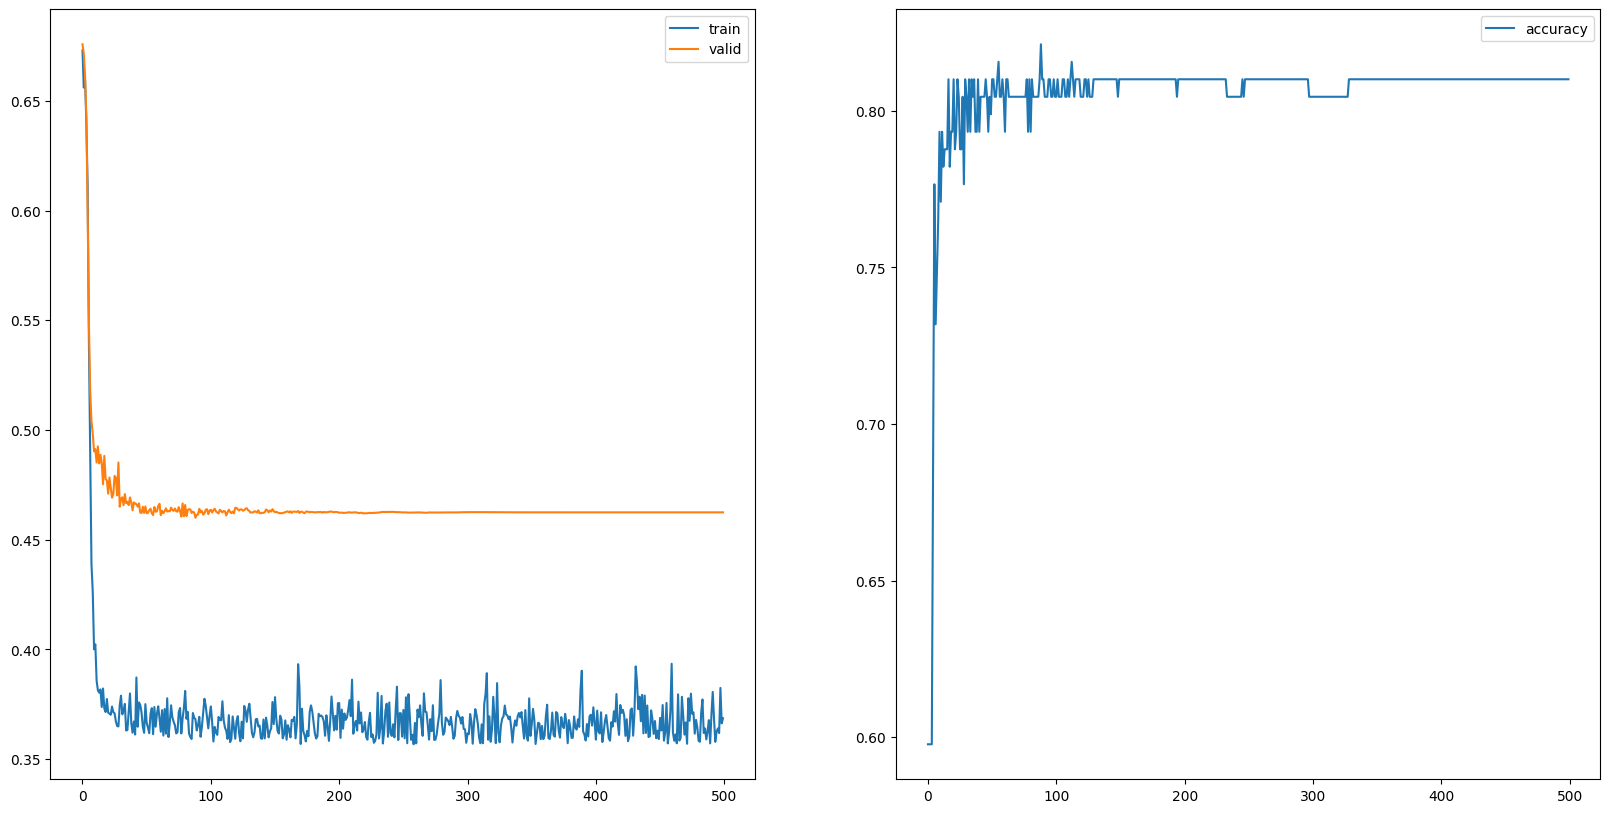

In [23]:
import matplotlib.pyplot as plt
f,a = plt.subplots(1,2,figsize = (20,10))
a[0].plot(decay_train_hist,label='train')
a[0].plot(decay_valid_hist,label='valid')
a[0].legend()
a[1].plot(decay_acc,label='accuracy')
a[1].legend()


In [ ]:
model.eval()
with torch.no_grad():
    pred = model(input)

torch.Size([418, 1])

<Axes: >

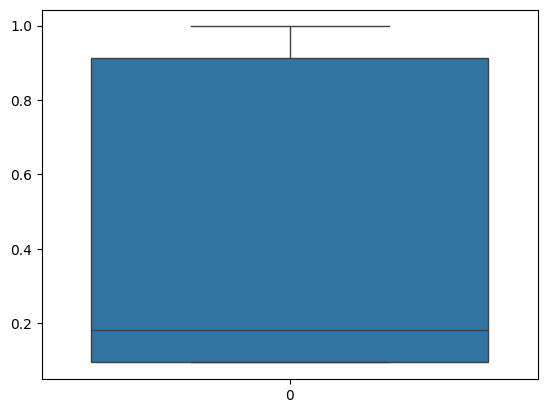

In [238]:
import seaborn as sns
sns.boxplot(data = pred)